> Simulation Study

# Import

데이터 함쳐놓기
```python
import pandas as pd

_a = pd.read_csv('./simulation_results/a.csv')
_b = pd.read_csv('./simulation_results/b.csv')
_c = pd.read_csv('./simulation_results/STGCN_ITSTGCN_random_epoch200.csv')

_df = pd.concat([_a,_b,_c],axis=0)

_df

_df.to_csv('./simulation_results/STGCN_ITSTGCN_random_epoch200_2.csv',index=False)
```

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fivenodes

**random**

- lags = 2
    - GNAR 문서에 나온 대로 AR(2) 모형

1. mrate = 0.8, filter = 12, epoch = 150
2. mrate = 0.3, filter = 8, epoch = 50

- interpolation = linear 또는 cubic, nearest 는 mse 너무 우리 방법에서 안 좋다.

**block**

## random

In [283]:
df1 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_random_epoch50.csv')
df2 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_random_epoch100.csv')
df3 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_random_epoch150.csv')
df4 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_random_epoch200.csv')

In [284]:
df_gnar = pd.read_csv('./simulation_results/fivenodes/fivenodes_GNAR_random.csv')

In [285]:
data = pd.concat([df1,df2,df3,df4,df_gnar],axis=0)

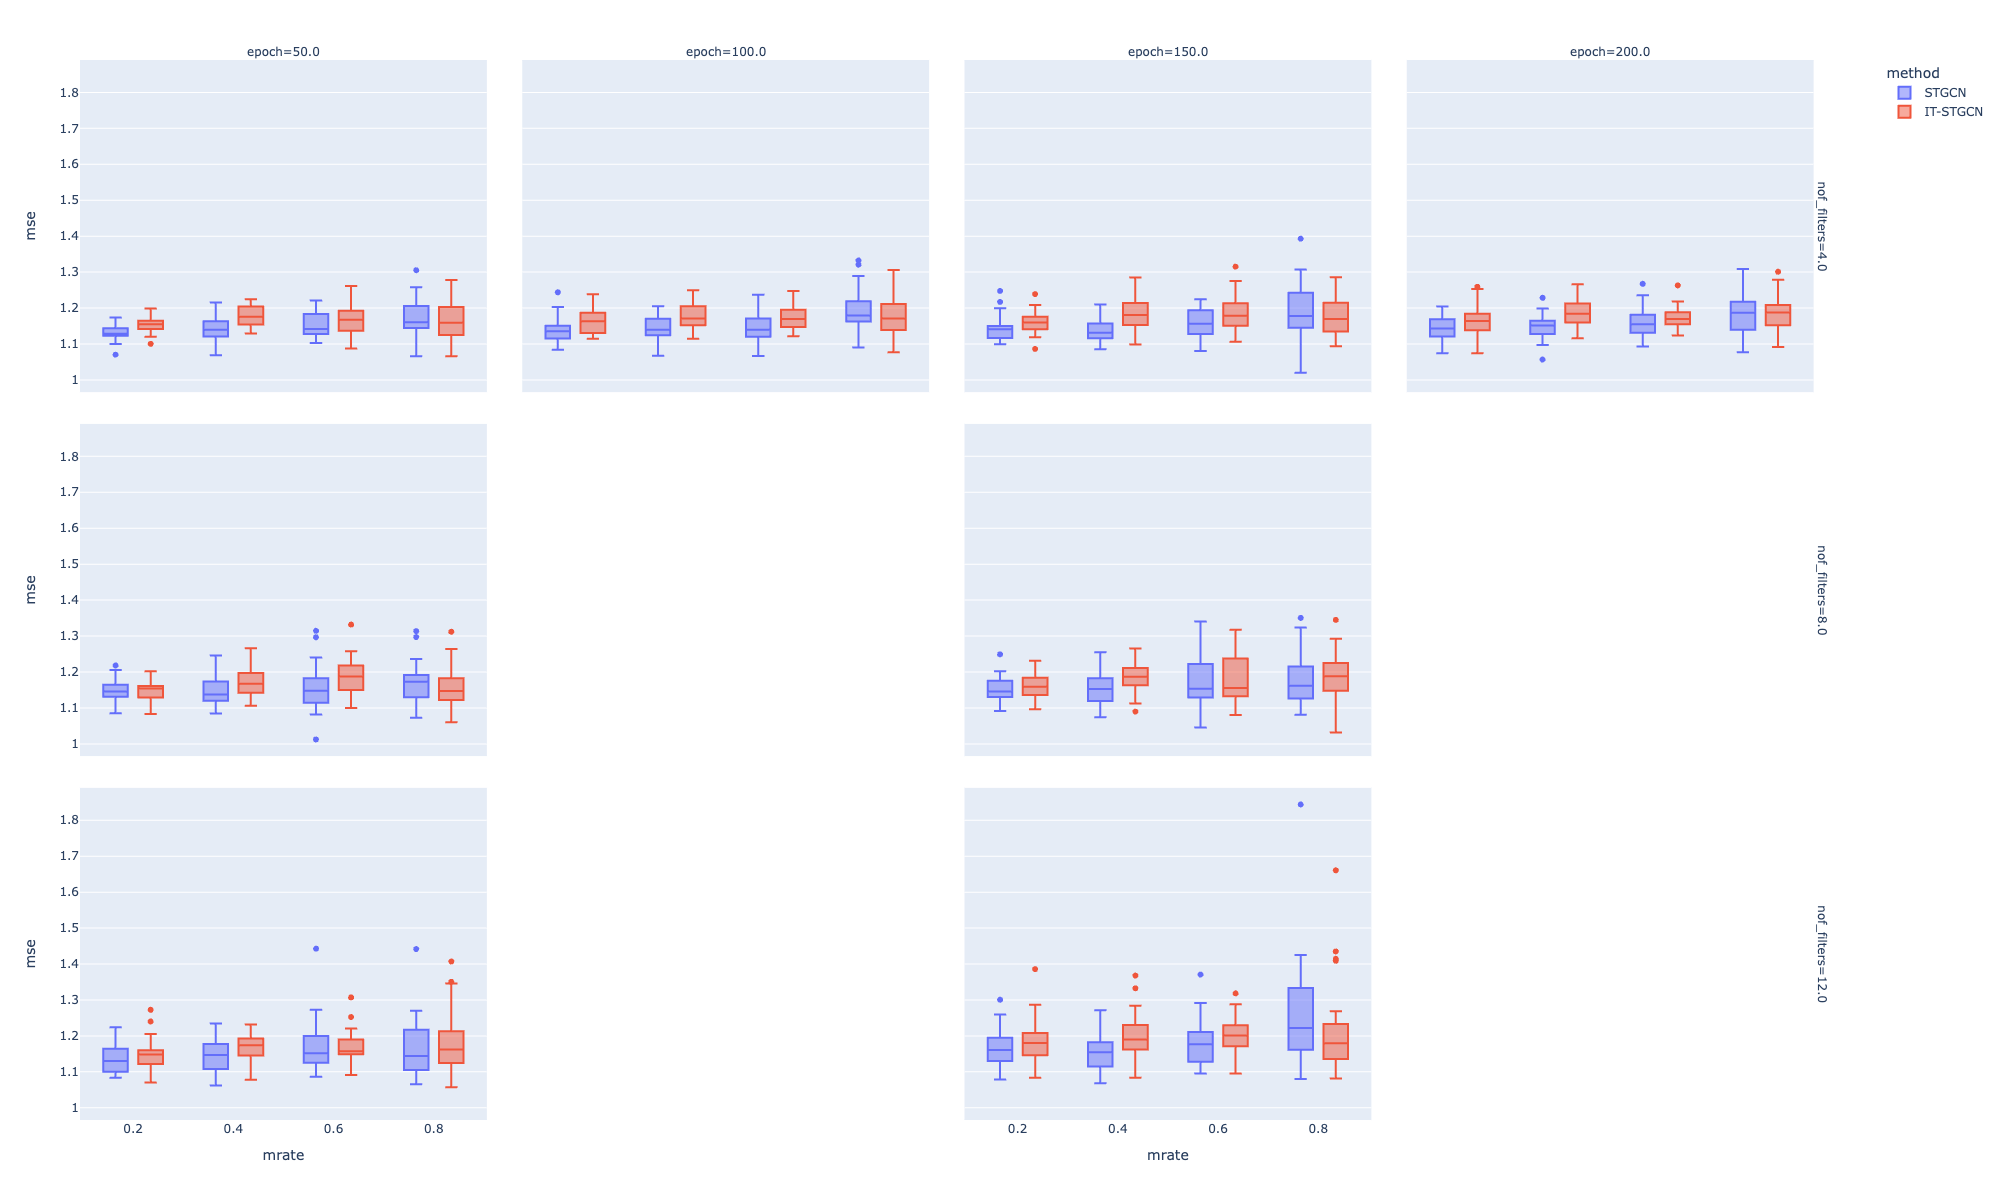

In [206]:
data.query("method!='GNAR' and inter_method=='linear' and lags==2").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='epoch',facet_row='nof_filters',height=1200)


#### 시뮬 예정(평균 시간, 평균mse)

0.7,0.75,0.8,0.85

12,16

150

In [242]:
# 1. mrate = 0.8, filter = 12, epoch = 150
data.query("mrate==0.8 and inter_method=='linear' and nof_filters==12 and epoch==150 and lags==2")['calculation_time'].mean(),data.query("mrate==0.8 and inter_method=='linear' and nof_filters==12 and epoch==150 and lags==2")['mse'].mean()

(109.59549897114435, 1.2304790377616883)

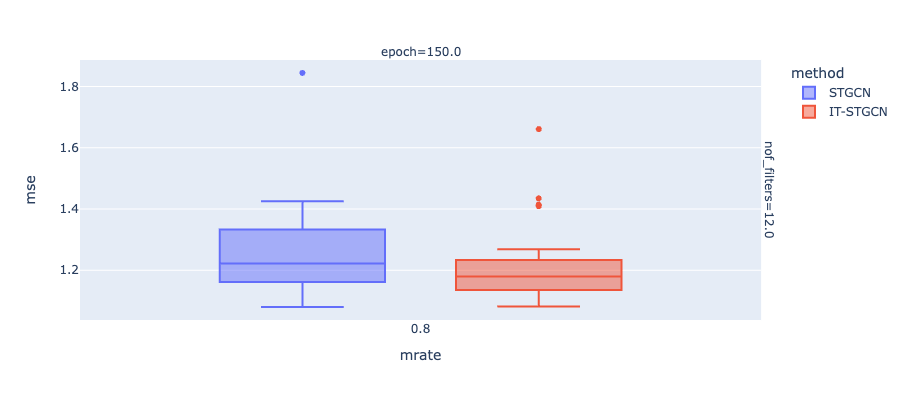

In [290]:
data.query("mrate==0.8 and inter_method=='linear' and nof_filters==12 and epoch==150 and lags==2").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='epoch',facet_row='nof_filters',height=400)

## block

In [292]:
df1 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node1_epoch50.csv')
df2 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node1_epoch100.csv')
df3 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node1_epoch150.csv')
df4 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node1_epoch200.csv')
df5 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node2_epoch50.csv')
df6 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node2_epoch100.csv')
df7 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node2_epoch150.csv')
df8 = pd.read_csv('./simulation_results/fivenodes/fivenodes_GNAR_block_node1.csv')
df9 = pd.read_csv('./simulation_results/fivenodes/fivenodes_GNAR_block_node2.csv')

In [293]:
df1['block']=1
df2['block']=1
df3['block']=1
df4['block']=1
df5['block']=2
df6['block']=2
df7['block']=2
df8['block']=1
df9['block']=2

In [294]:
data2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9],axis=0)

In [296]:
data2.query("method=='GNAR' and block == 1")['mse'].mean(),data2.query("method=='GNAR' and block == 2")['mse'].mean()

(1.455923080444336, 1.5004450678825378)

In [297]:
data2.query("method=='GNAR' and inter_method == 'linear'")['mse'].mean(),data2.query("method=='GNAR' and inter_method == 'nearest'")['mse'].mean() # 차이 없음

(1.4813642161233085, 1.4813642161233085)

In [298]:
data2.query("epoch==50")['calculation_time'].mean(),data2.query("epoch==50")['calculation_time'].max()

(39.11611335332747, 56.8712797164917)

In [299]:
data2.query("epoch==150")['calculation_time'].mean(),data2.query("epoch==150")['calculation_time'].max()

(102.26520284502594, 152.8869686126709)

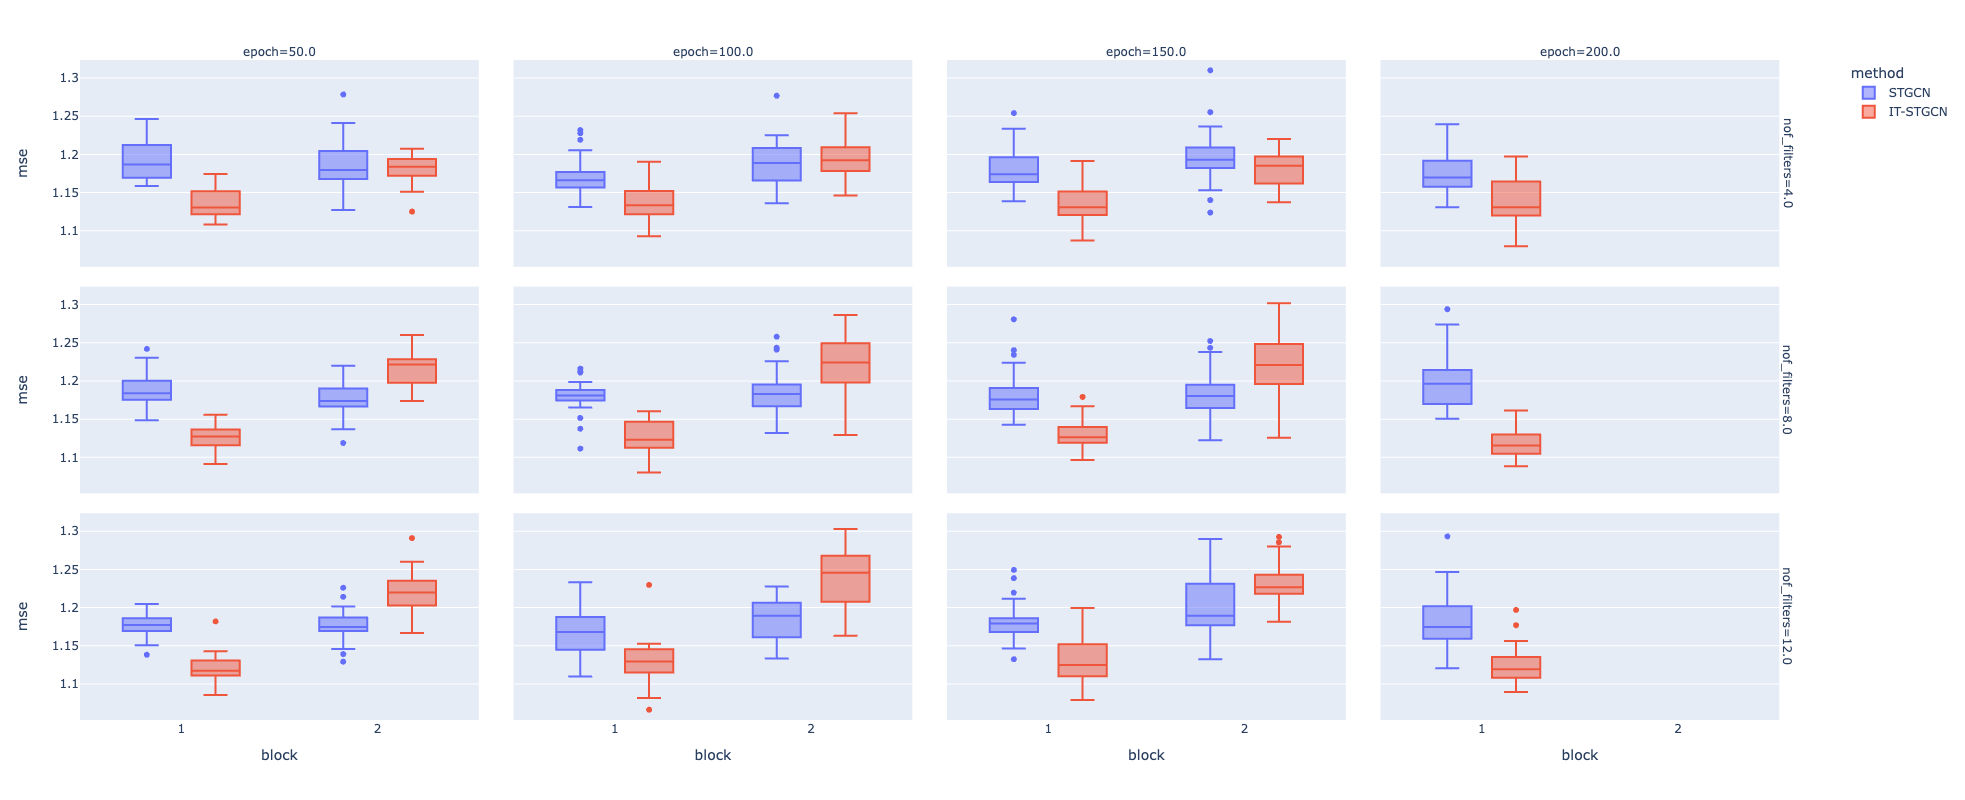

In [300]:
data2.query("method!='GNAR' and lags == 2 and inter_method=='nearest'").plot.box(backend='plotly',x='block',color='method',y='mse',facet_col='epoch',facet_row='nof_filters',height=800)


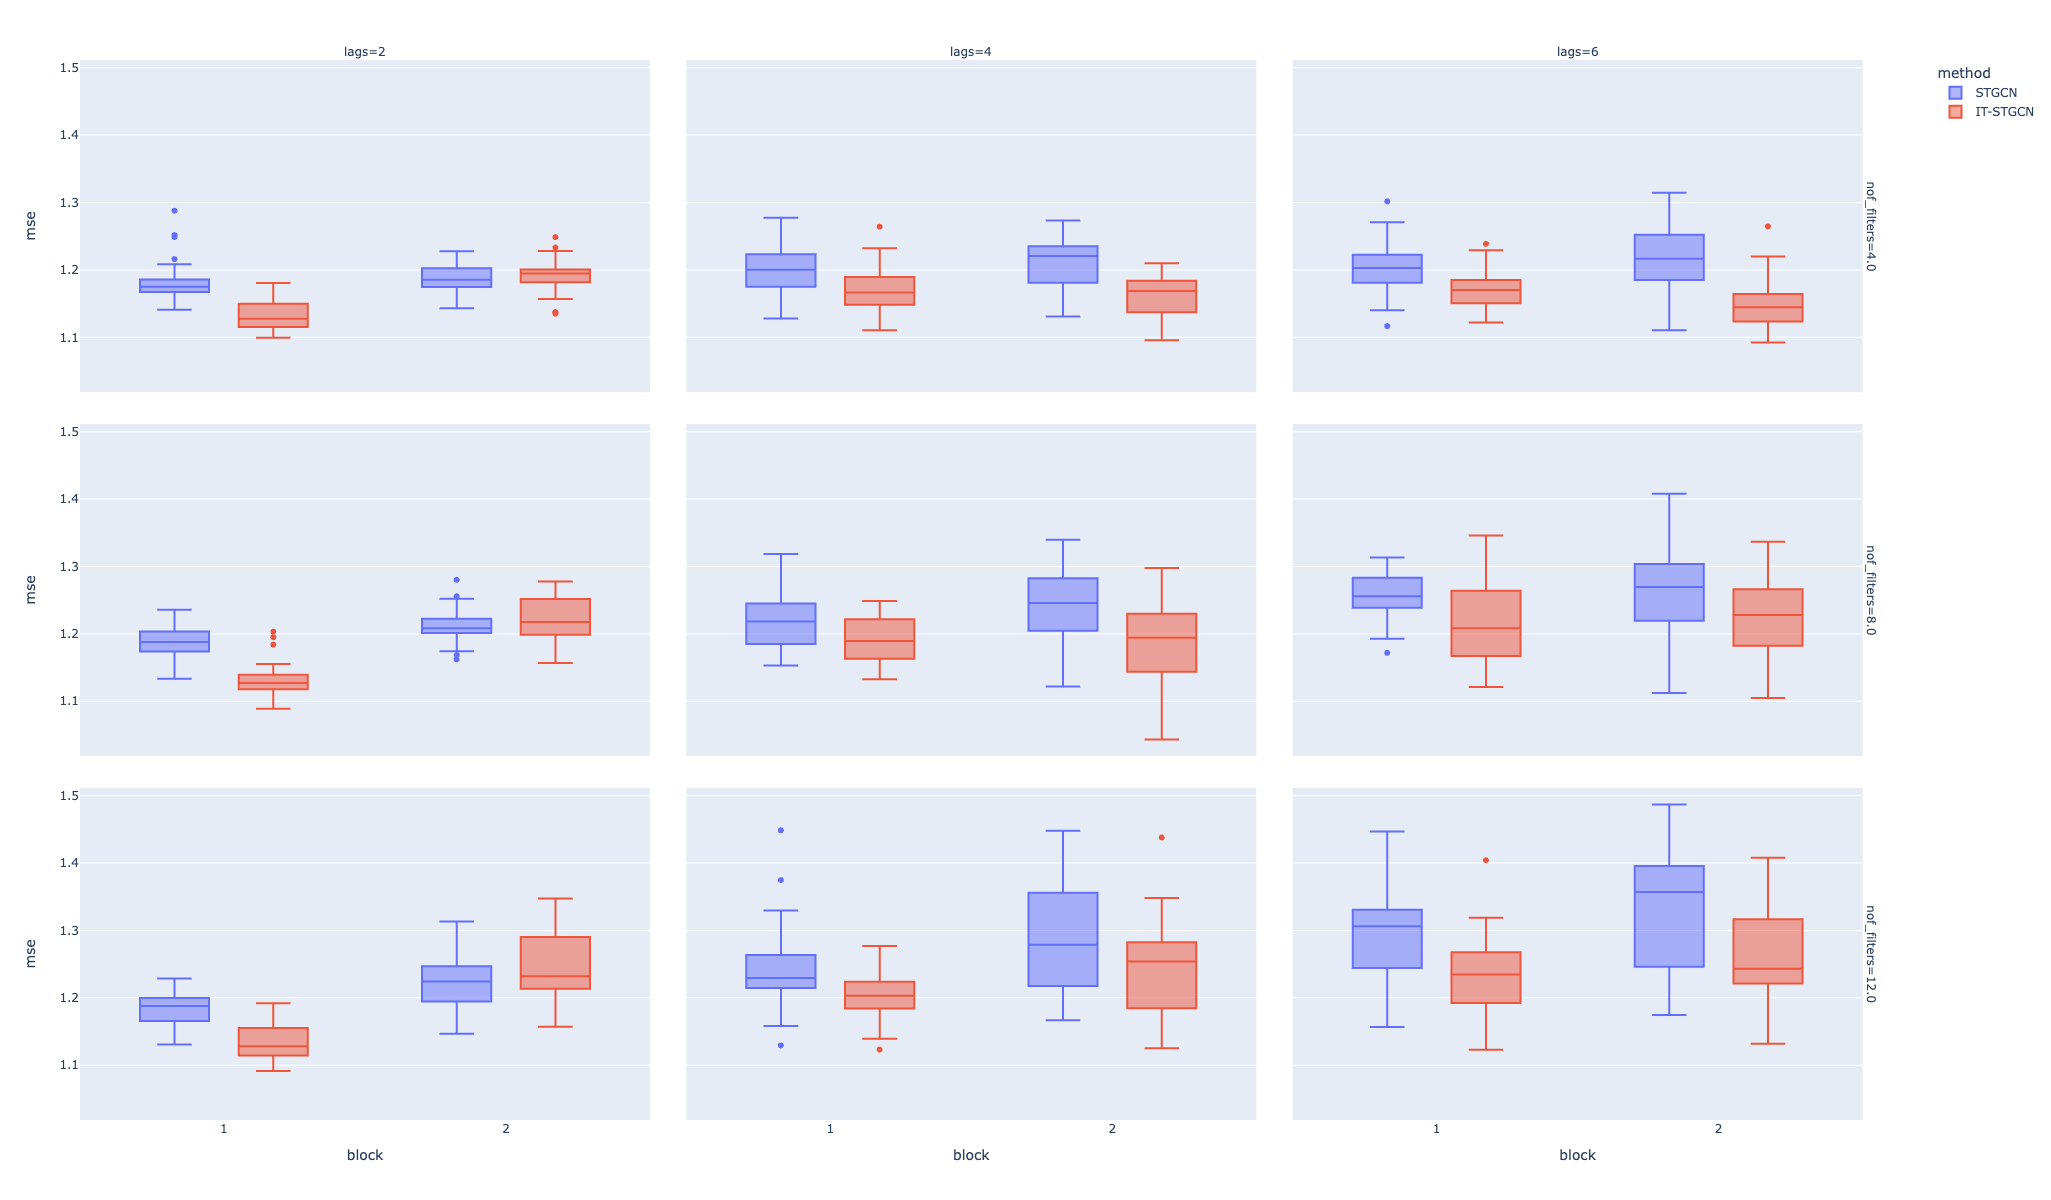

In [301]:
data2.query("inter_method=='linear' and epoch==150").plot.box(backend='plotly',x='block',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


#### 시뮬 예정(평균 시간, 평균mse)

block 1,2 위 세팅 그대로

랜덤ㅁ 말고 block만

In [306]:
# 1. block = 2 interpolation = linear, filter = 12, epoch = 150
data2.query("block==1 and inter_method=='linear' and nof_filters==12 and epoch==50 and lags==2")['calculation_time'].mean(),data2.query("block==2 and inter_method=='linear' and nof_filters==12 and epoch==50 and lags==2")['mse'].mean()

(40.18422634204229, 1.2096982955932618)

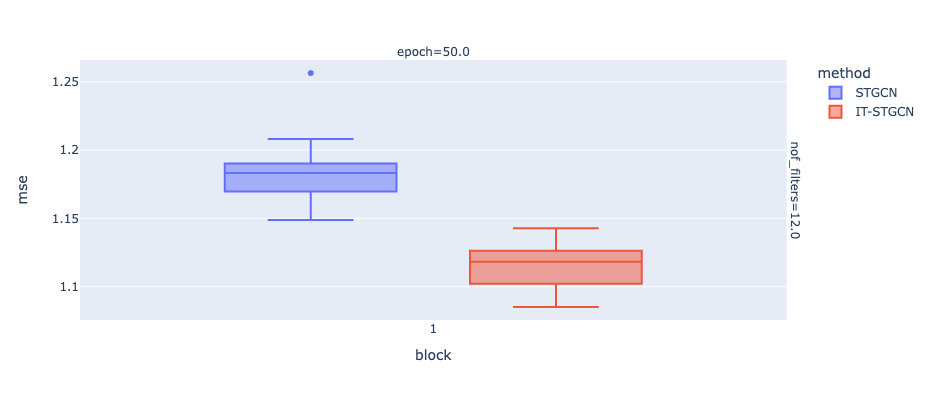

In [307]:
data2.query("block==1 and inter_method=='linear' and nof_filters==12 and epoch==50 and lags==2").plot.box(backend='plotly',x='block',color='method',y='mse',facet_col='epoch',facet_row='nof_filters',height=400)

# fivenodes simulation result

```python
mindex= [[],[],[],list(range(50,150)),[]] # block 1
mindex= [list(range(10,100)),[],list(range(50,80)),[],[]] # node 2 30% mmissing
```
block 조건

In [135]:
df1 = pd.read_csv('./simulation_results/2023-04-09_23-37-17.csv') # GNAR random
df2 = pd.read_csv('./simulation_results/2023-04-10_07-06-32.csv') # STGCN, ITSTGCN random 70%, 75%
df3 = pd.read_csv('./simulation_results/2023-04-10_14-54-51.csv') # STGCN, ITSTGCN random 80%, 85%
df4 = pd.read_csv('./simulation_results/2023-04-10_15-54-03.csv') # GNAR block 1
df5 = pd.read_csv('./simulation_results/2023-04-10_15-56-27.csv') # GNAR block 2
df6 = pd.read_csv('./simulation_results/2023-04-10_23-44-52.csv') # STGCN, ITSTGCN block 1
df7 = pd.read_csv('./simulation_results/2023-04-11_04-40-00.csv') # STGCN, ITSTGCN block 2
df8 = pd.read_csv('./simulation_results/2023-04-14_21-21-34.csv') # S/TGCN, ITSTGCN missing 0

In [136]:
data = pd.concat([df1,df2, df3, df4,df5,df6,df7,df8],axis=0);data

dataset    method  mrate mtype  lags  nof_filters inter_method  epoch  \
0    five_nodes      GNAR   0.70  rand     2          NaN       linear    NaN   
1    five_nodes      GNAR   0.75  rand     2          NaN       linear    NaN   
2    five_nodes      GNAR   0.80  rand     2          NaN       linear    NaN   
3    five_nodes      GNAR   0.85  rand     2          NaN       linear    NaN   
4    five_nodes      GNAR   0.70  rand     2          NaN       linear    NaN   
..          ...       ...    ...   ...   ...          ...          ...    ...   
235   fivenodes     STGCN   0.00   NaN     2         16.0          NaN  150.0   
236   fivenodes  IT-STGCN   0.00   NaN     2         12.0          NaN  150.0   
237   fivenodes  IT-STGCN   0.00   NaN     2         12.0          NaN  150.0   
238   fivenodes  IT-STGCN   0.00   NaN     2         16.0          NaN  150.0   
239   fivenodes  IT-STGCN   0.00   NaN     2         16.0          NaN  150.0   

          mse  calculation_time  
0    1.406830          0.022885  
1    1.406830          0.005927  
2    1.406830          0.005557  
3    1.406830          0.010217  
4    1.406830          0.006891  
..        ...               ...  
235  1.162979        117.819705  
236  1.156077        122.355274  
237  1.162236        122.169977  
238  1.145952        123.042743  
239  1.158429        124.601893  

[1212 rows x 10 columns]

In [137]:
data.to_csv('./simulation_results/Real_simulation/fivedones_Simulation.csv',index=False)

In [138]:
data = pd.read_csv('./simulation_results/Real_simulation/fivedones_Simulation.csv')

In [139]:
data.query("method=='GNAR' and mtype == 'rand'")['mse'].mean(),data.query("method=='GNAR' and mtype != 'rand'")['mse'].mean()

(1.4068299531936646, 1.4068299531936646)

In [140]:
data.query("method=='STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='STGCN' and mtype != 'rand'")['mse'].mean()

(1.256219128270944, 3.429857851266861)

In [141]:
data.query("method=='IT-STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='IT-STGCN' and mtype != 'rand'")['mse'].mean()

(1.223042539258798, 2.4890875375270842)

Baseline

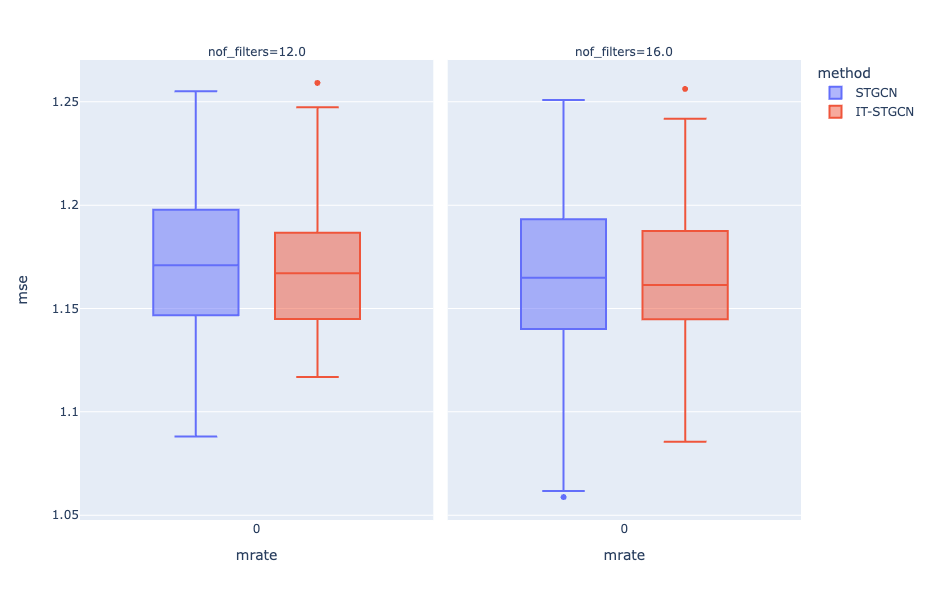

In [142]:
data.query("method!='GNAR' and mrate==0").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',height=600)


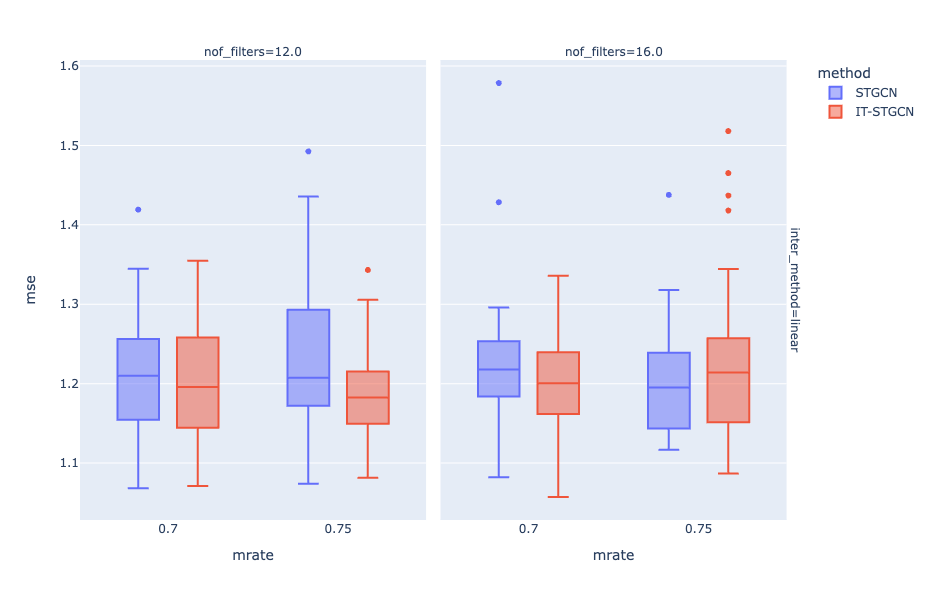

In [144]:
data.query("method!='GNAR' and mtype =='rand' and (mrate==0.7 or mrate==0.75)").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',facet_row='inter_method',height=600)


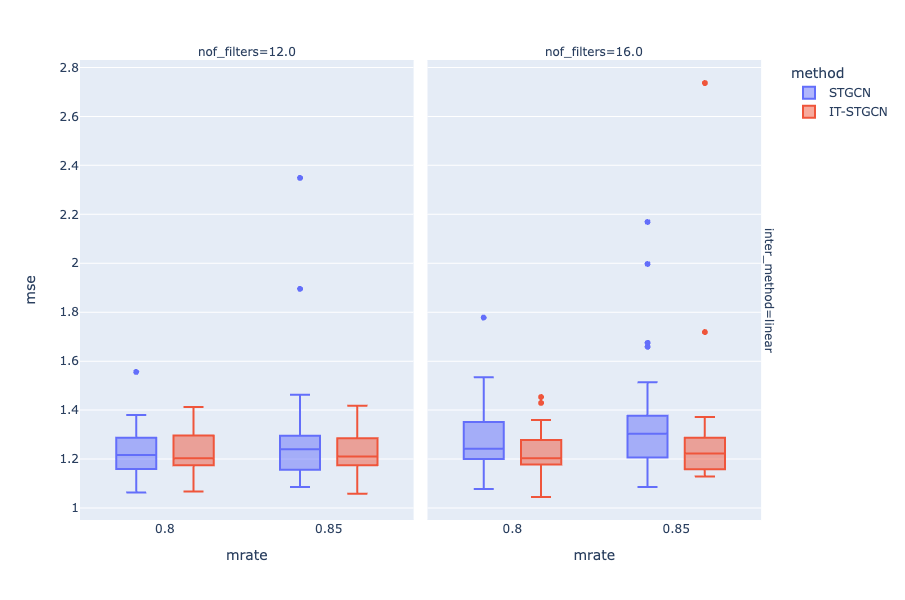

In [145]:
data.query("method!='GNAR' and mtype =='rand'  and (mrate==0.8 or mrate==0.85)").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',facet_row='inter_method',height=600)


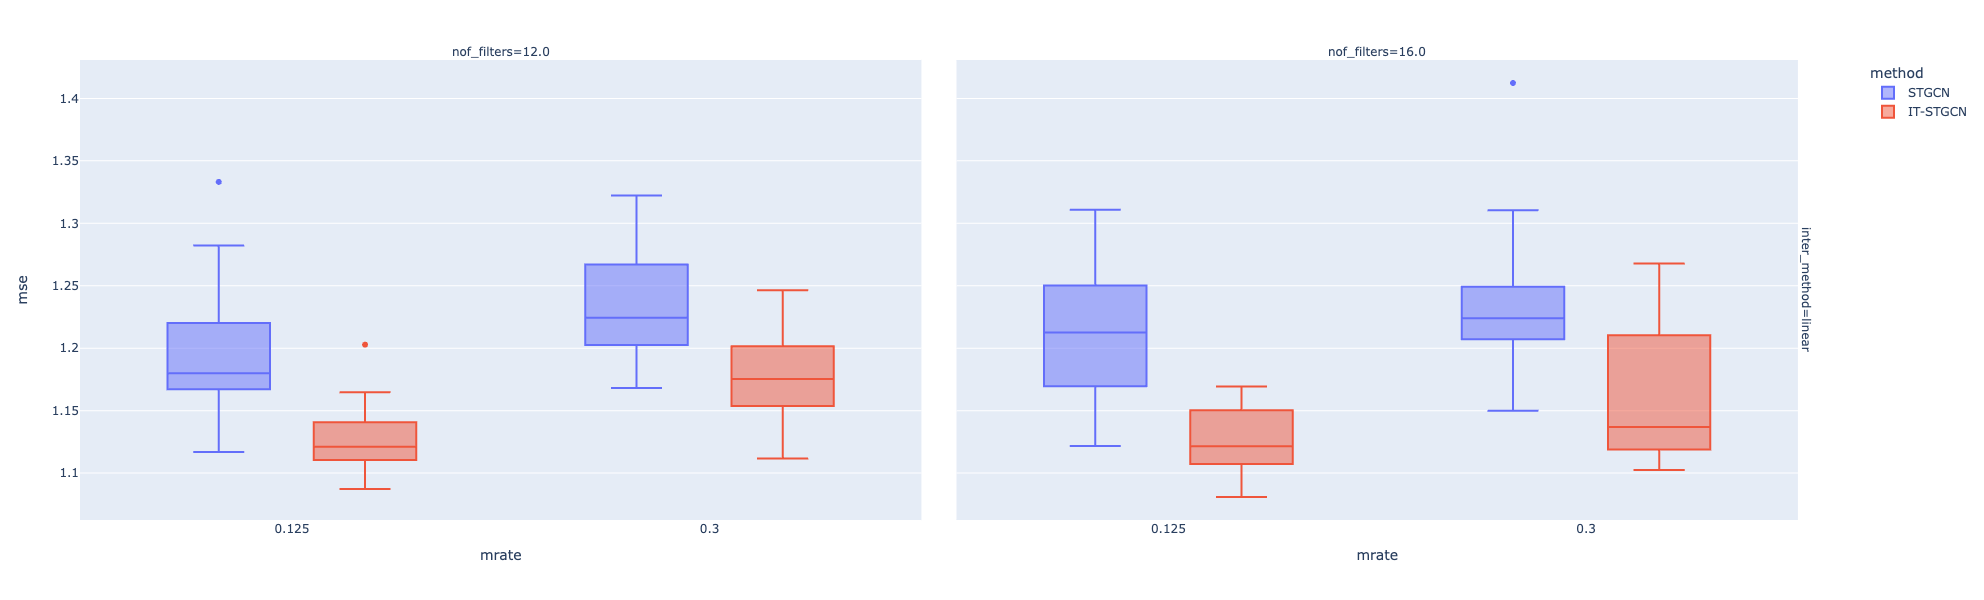

In [28]:
data.query("method!='GNAR' and mtype =='block' and inter_method=='linear' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',facet_row='inter_method',height=600)


# chickenpox

## random

- 공식 패키지: lags 4 지정
- mrate = 0.3 
    - 결측값 비율 크니까 오차 많이 커지는 경향 있어서
- nof_filters = 4
    - 차이 없어서
- lags = 4, 8
    - 클 수록 작아지는 경향 있어서
- GNAR보다 MSE는 낮음
- cal_time
    - mean = 10
    - max = 21
- block 은 임의로 한 노드만 해 본 결과임

In [6]:
data = pd.read_csv('./simulation_results/chickenpox_random.csv').sort_values(by='lags')

In [8]:
data.query("method!='GNAR'")['calculation_time'].mean(),data.query("method!='GNAR'")['calculation_time'].max(),data.query("method!='GNAR'")['calculation_time'].min()

(10.42619569649299, 21.886654376983643, 7.567165851593018)

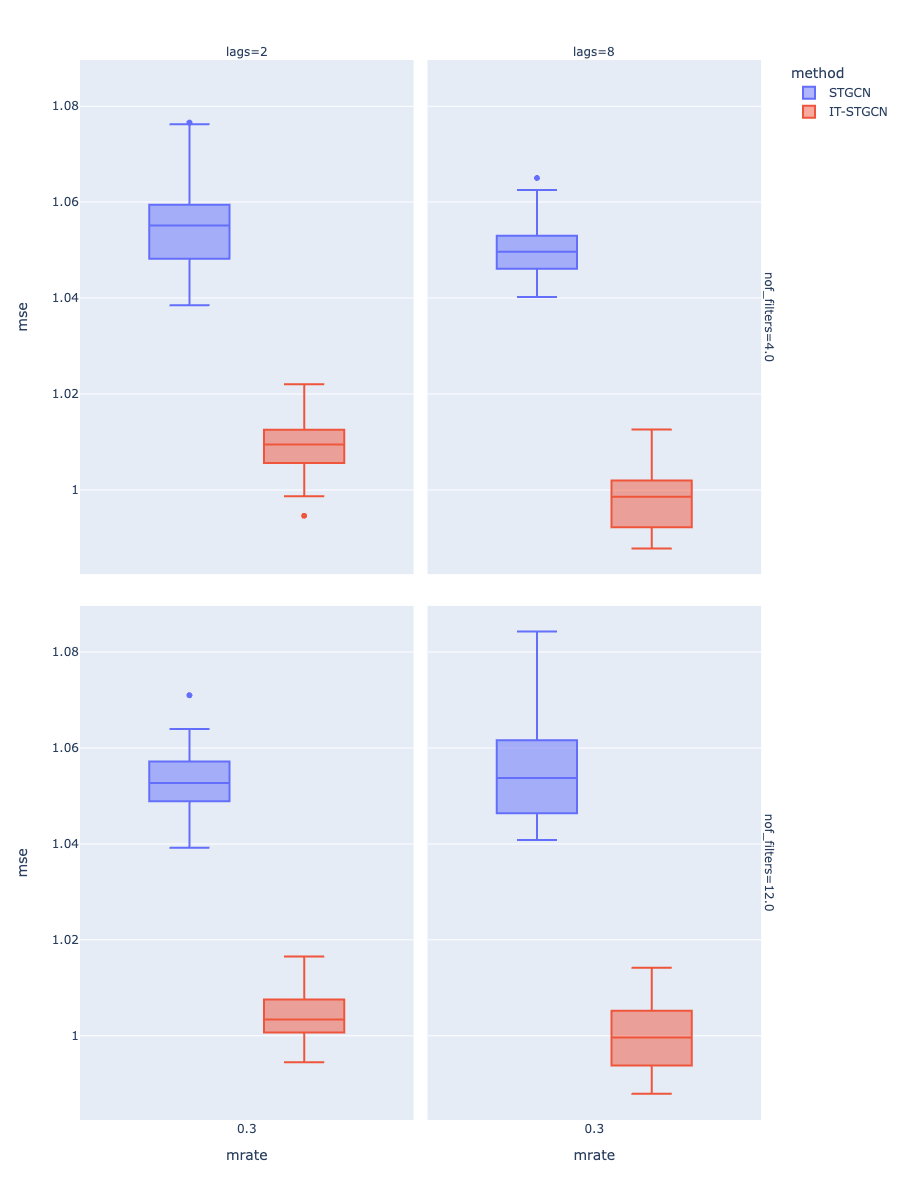

In [12]:
data.query("method!='GNAR' and inter_method=='cubic' and mrate==0.3").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


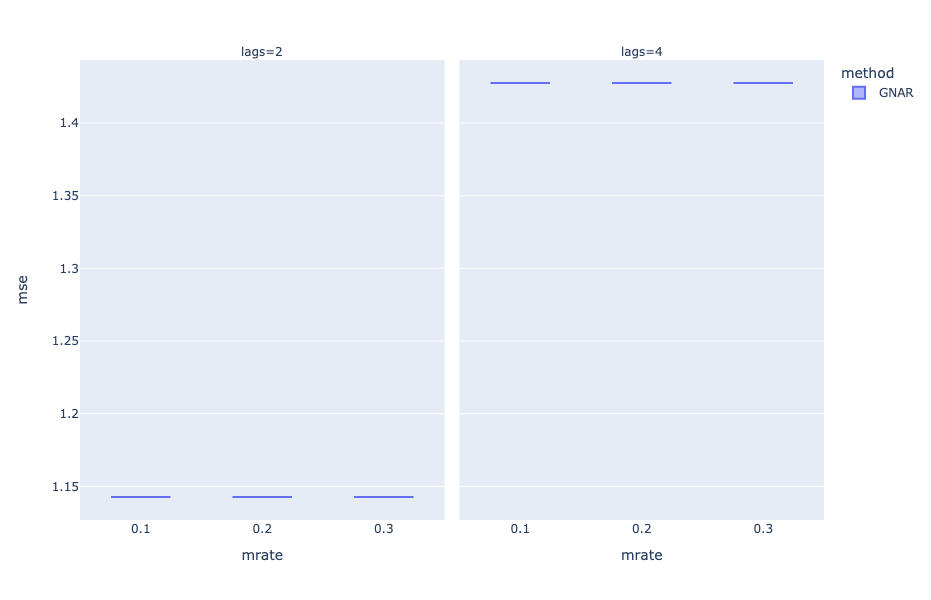

In [10]:
data.query("method=='GNAR' and inter_method=='linear'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',height=600)


#### 시뮬 예정(평균 시간, 평균mse)

epoch = 50

mrate = 0.3~0.5

filter 32 공식예제로 가기 하고 샆으면 3개 정도 추가로

In [469]:
# 1. mrate = 0.3, filter = 4, epoch = 50, lags = 4
data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==4 and lags==2")['calculation_time'].mean(),data.query("method != 'GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==4 and lags==2")['mse'].mean()

(10.115000387032827, 1.0320488701264063)

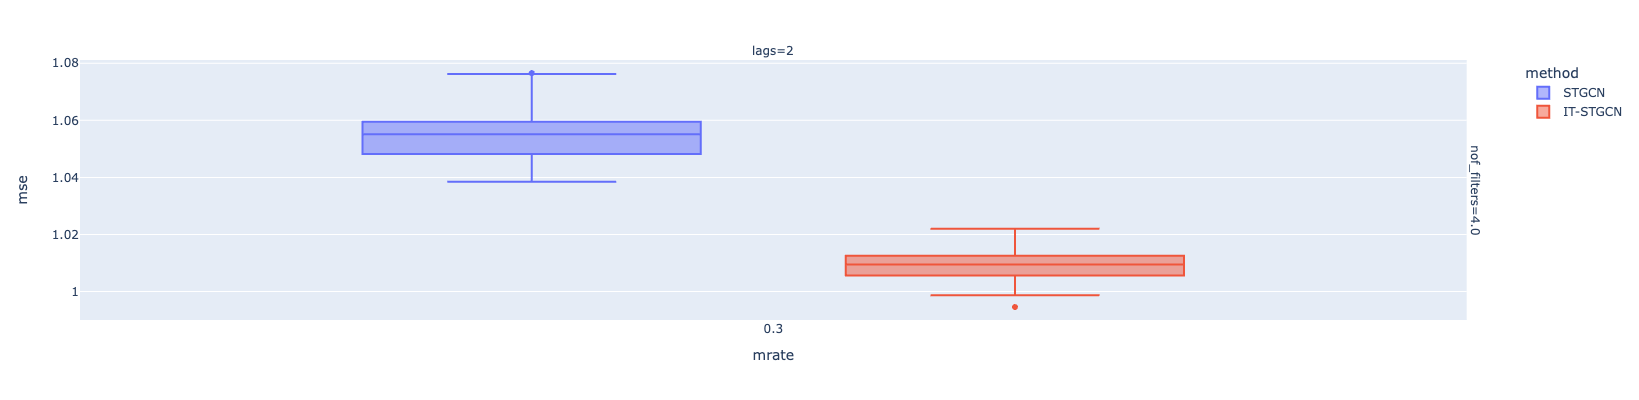

In [470]:
data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==4 and lags==2").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=400)


## block

In [15]:
data = pd.read_csv('./simulation_results/chickenpox_block.csv')

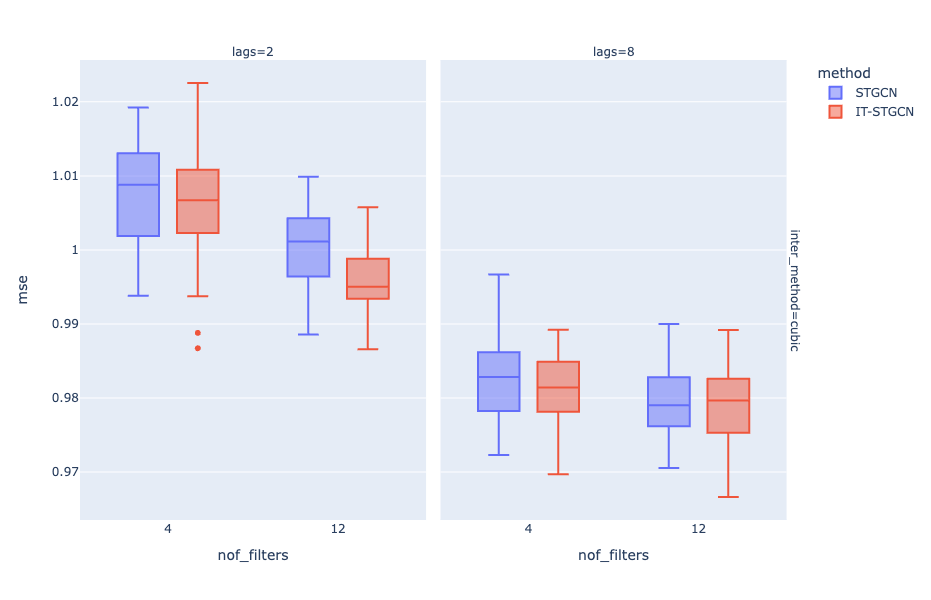

In [21]:
data.query("method != 'GNAR' and lags!=4 and lags!=6 and inter_method !='linear'").plot.box(backend='plotly',x='nof_filters',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=600)


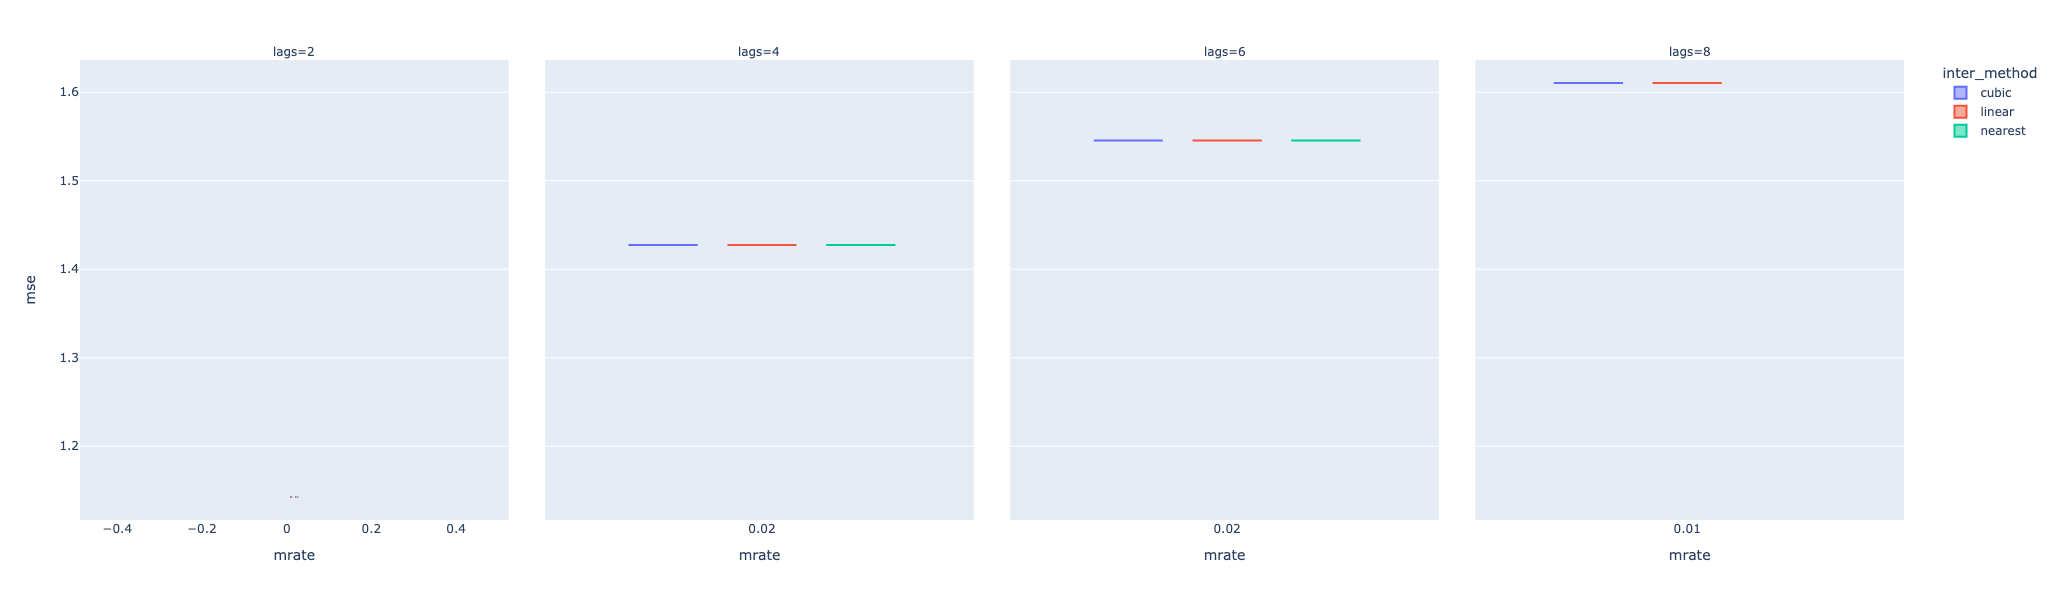

In [473]:
data.query("method=='GNAR'").plot.box(backend='plotly',x='mrate',color='inter_method',y='mse',facet_col='lags',height=600)


#### 시뮬 예정(평균 시간, 평균mse)

block, rand 다

공식예제 수 따라

epoch 50

나중에 시간 남으면 100

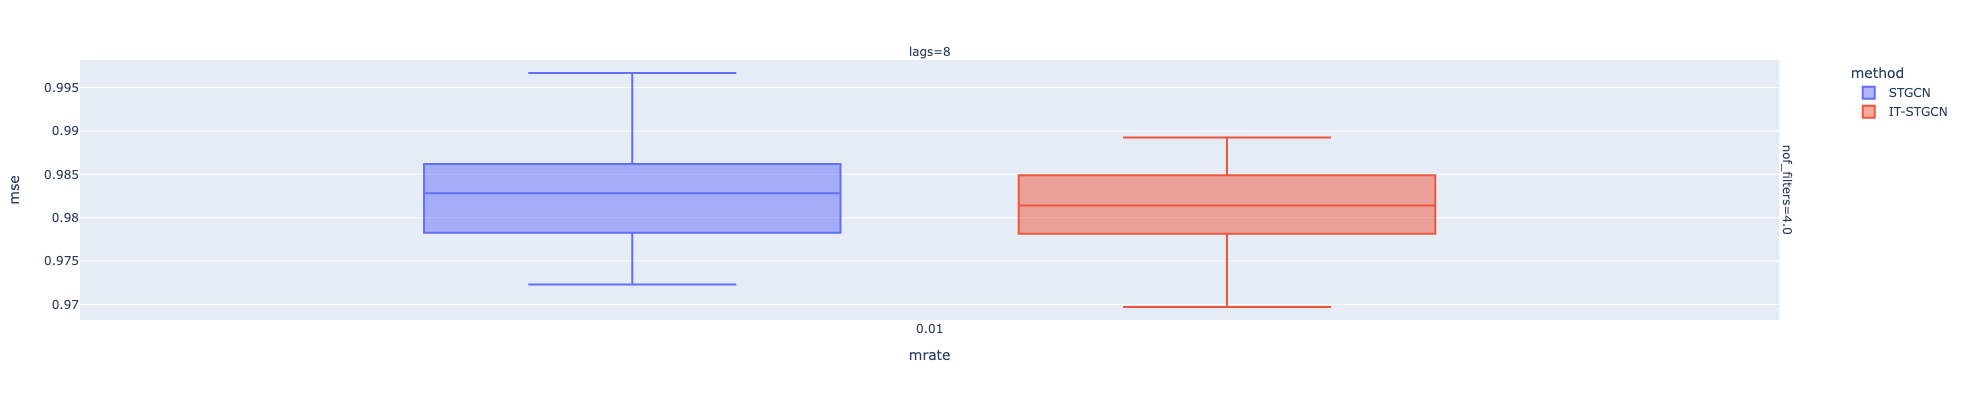

In [486]:
data.query("inter_method=='cubic' and nof_filters==4 and lags==8").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=400)


# chickenpox simulation result

```python
my_list = [[] for _ in range(20)] #chickenpox
another_list = list(range(100,400))
my_list[1] = another_list
my_list[3] = another_list
my_list[5] = another_list
my_list[7] = another_list
my_list[9] = another_list
my_list[11] = another_list
my_list[13] = another_list
my_list[15] = another_list
mindex = my_list
```
block 30% missing을 위한 조건

```python
my_list = [[] for _ in range(20)] #chickenpox
another_list = list(range(100,400))
my_list[2] = another_list
my_list[4] = another_list
my_list[6] = another_list
my_list[8] = another_list
my_list[10] = another_list
my_list[12] = another_list
my_list[14] = another_list
my_list[16] = another_list
mindex = my_list
```
2번째 (예정) block 30% missing을 위한 조건
짝수번째가 더 블락하는게 mse작을 것 같아 보임

In [358]:
df1 = pd.read_csv('./simulation_results/2023-04-11_06-56-35.csv') # GNAR random
df2 = pd.read_csv('./simulation_results/2023-04-11_07-01-42.csv') # GNAR block
df3 = pd.read_csv('./simulation_results/2023-04-11_18-20-22.csv') # STGCN, ITSTGCN random 30%
df4 = pd.read_csv('./simulation_results/2023-04-12_05-44-19.csv') # STGCN, ITSTGCN random 40%
df5 = pd.read_csv('./simulation_results/2023-04-12_17-03-28.csv') # STGCN, ITSTGCN random 50%
df6 = pd.read_csv('./simulation_results/2023-04-13_18-59-17.csv') # STGCN, ITSTGCN block cubic
df7 = pd.read_csv('./simulation_results/2023-04-14_00-57-11.csv') # STGCN, ITSTGCN block linear
df8 = pd.read_csv('./simulation_results/2023-04-14_12-55-58.csv') # STGCN, ITSTGCN 0% missing

In [359]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=0);data

dataset    method  mrate mtype  lags  nof_filters inter_method  epoch  \
0    chickenpox      GNAR    0.3  rand     4          NaN       linear    NaN   
1    chickenpox      GNAR    0.3  rand     4          NaN        cubic    NaN   
2    chickenpox      GNAR    0.4  rand     4          NaN       linear    NaN   
3    chickenpox      GNAR    0.4  rand     4          NaN        cubic    NaN   
4    chickenpox      GNAR    0.5  rand     4          NaN       linear    NaN   
..          ...       ...    ...   ...   ...          ...          ...    ...   
355  chickenpox  IT-STGCN    0.0   NaN     4         16.0          NaN   50.0   
356  chickenpox  IT-STGCN    0.0   NaN     4         24.0          NaN   50.0   
357  chickenpox  IT-STGCN    0.0   NaN     4         24.0          NaN   50.0   
358  chickenpox  IT-STGCN    0.0   NaN     4         32.0          NaN   50.0   
359  chickenpox  IT-STGCN    0.0   NaN     4         32.0          NaN   50.0   

          mse  calculation_time  
0    1.427494          0.070639  
1    1.427494          0.072070  
2    1.427494          0.087900  
3    1.427494          0.094206  
4    1.427494          0.096730  
..        ...               ...  
355  1.014494        116.511157  
356  1.001220        117.726670  
357  1.002661        117.931265  
358  1.017814        123.757436  
359  1.014889        124.369595  

[1986 rows x 10 columns]

In [148]:
data.to_csv('./simulation_results/Real_simulation/chikenpox_Simulation.csv',index=False)

In [149]:
data = pd.read_csv('./simulation_results/Real_simulation/chikenpox_Simulation.csv')

In [360]:
data.query("method=='GNAR' and mtype == 'rand'")['mse'].mean(),data.query("method=='GNAR' and mtype != 'rand'")['mse'].mean()

(1.4274942874908447, 1.4274942874908447)

In [361]:
data.query("method=='STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='STGCN' and mtype != 'rand'")['mse'].mean()

(1.0746942153683414, 1.0201175289021598)

In [362]:
data.query("method=='IT-STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='IT-STGCN' and mtype != 'rand'")['mse'].mean()

(1.0245469553603066, 1.0210112863116794)

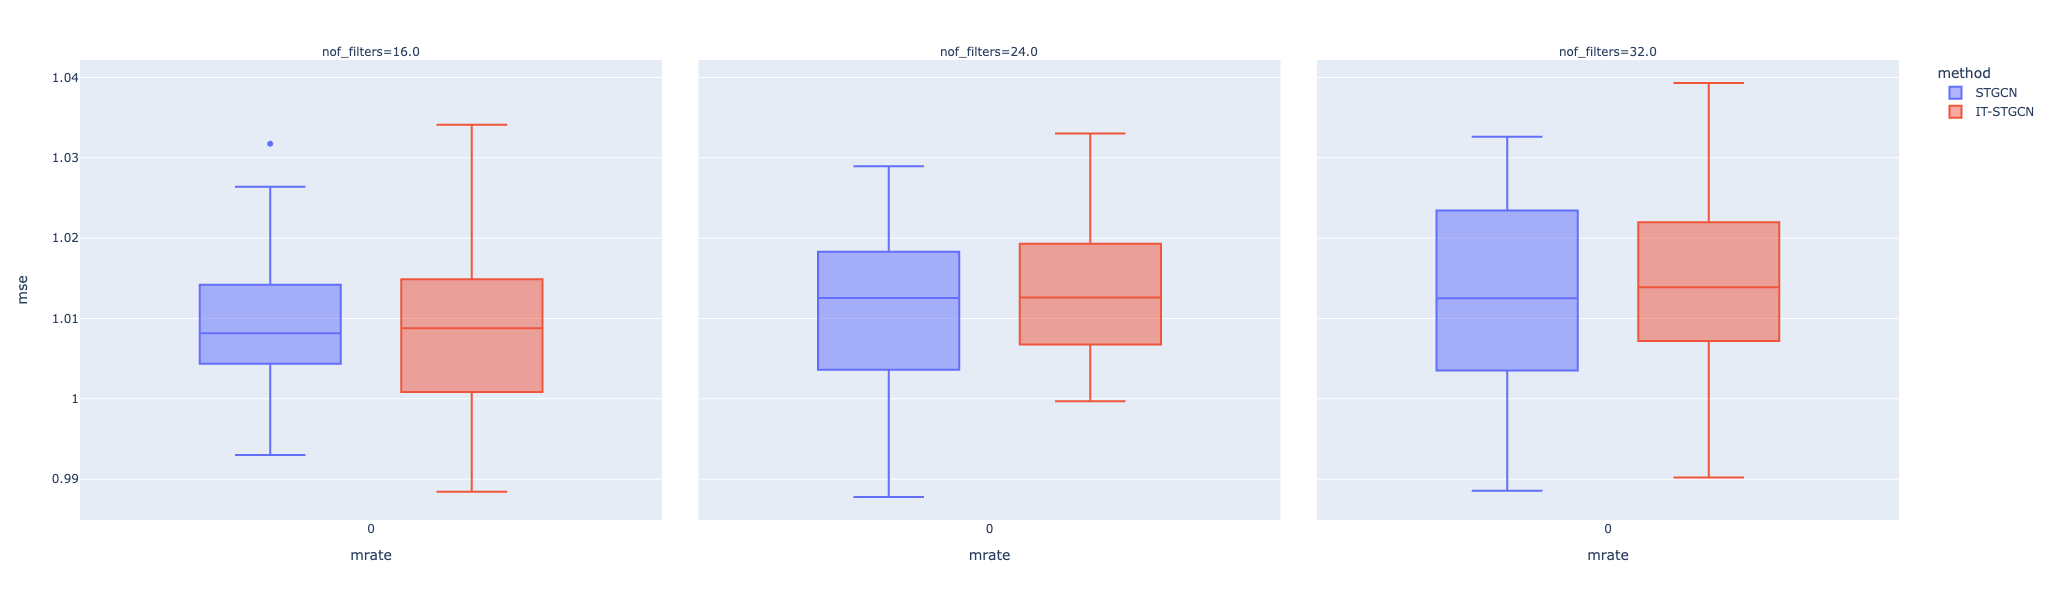

In [363]:
data.query("method!='GNAR' and mrate ==0 ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',height=600)


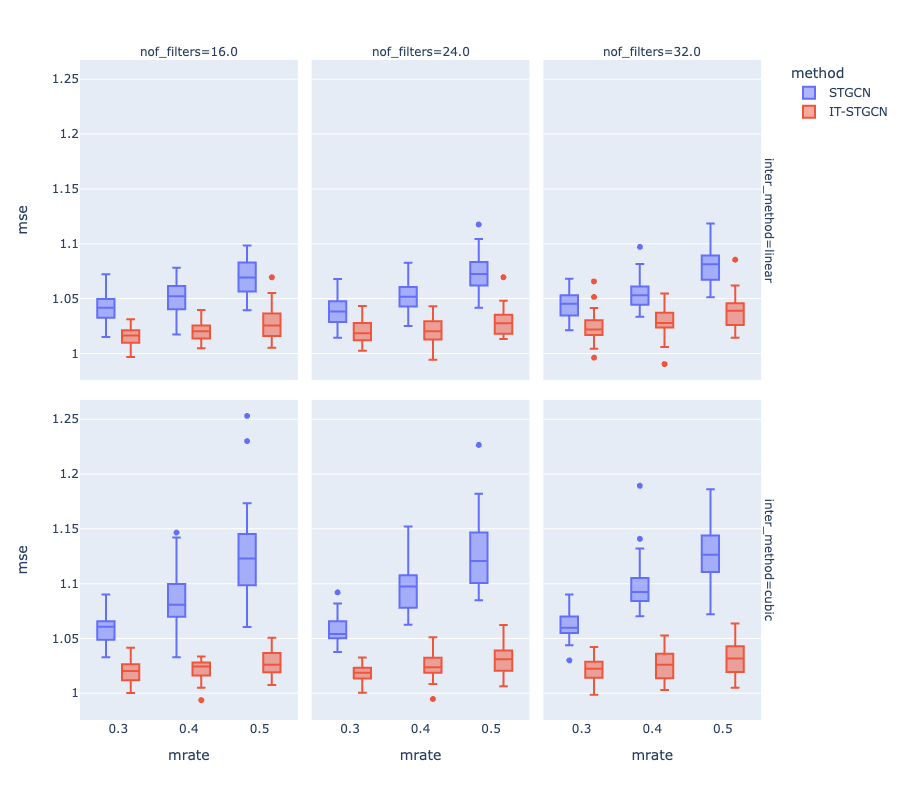

In [364]:
data.query("method!='GNAR' and mtype =='rand' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',facet_row='inter_method',height=800)


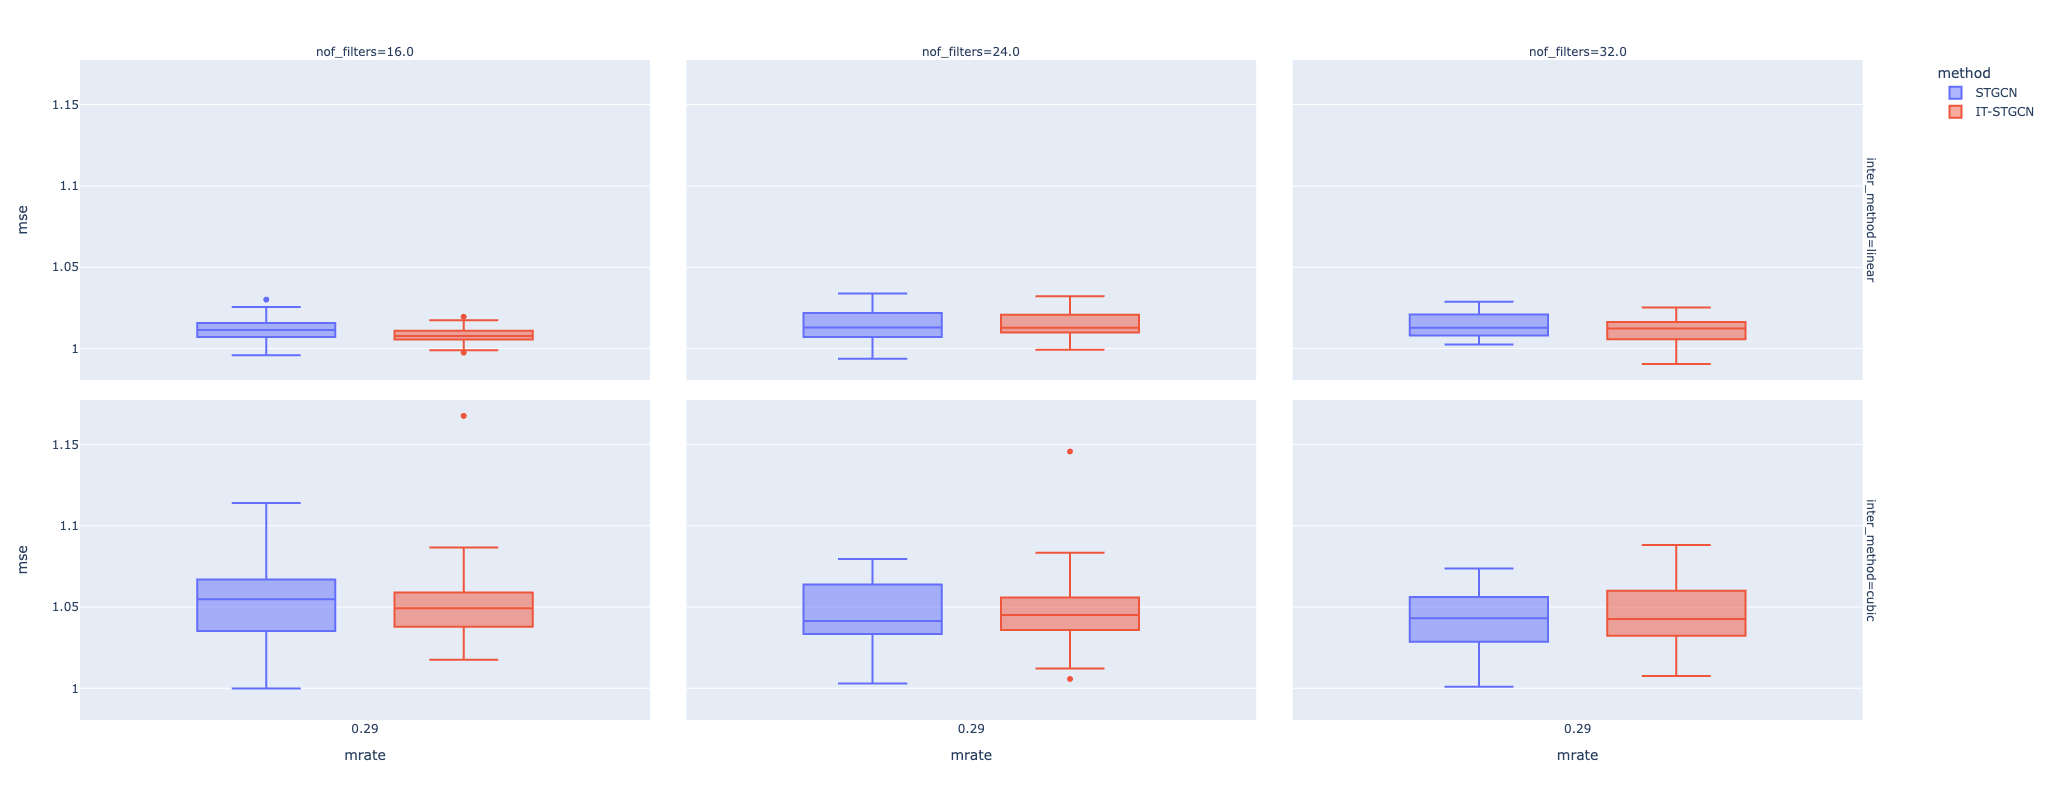

In [366]:
data.query("method!='GNAR' and mtype =='block' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',facet_row='inter_method',height=800)


Second block

In [25]:
df1 = pd.read_csv('./simulation_results/2023-04-18_23-35-38.csv')
df2 = pd.read_csv('./simulation_results/2023-04-26_17-50-42.csv') # GNAR

In [26]:
data = pd.concat([df1,df2],axis=0);data

dataset method    mrate  mtype  lags  nof_filters inter_method  epoch  \
0   chickenpox  STGCN  0.28777  block     4         16.0        cubic   50.0   
1   chickenpox  STGCN  0.28777  block     4         16.0       linear   50.0   
2   chickenpox  STGCN  0.28777  block     4         24.0        cubic   50.0   
3   chickenpox  STGCN  0.28777  block     4         24.0       linear   50.0   
4   chickenpox  STGCN  0.28777  block     4         32.0        cubic   50.0   
..         ...    ...      ...    ...   ...          ...          ...    ...   
1   chickenpox   GNAR  0.28777  block     4          NaN       linear    NaN   
2   chickenpox   GNAR  0.28777  block     4          NaN        cubic    NaN   
3   chickenpox   GNAR  0.28777  block     4          NaN       linear    NaN   
4   chickenpox   GNAR  0.28777  block     4          NaN        cubic    NaN   
5   chickenpox   GNAR  0.28777  block     4          NaN       linear    NaN   

          mse  calculation_time  
0   12.375004        107.741962  
1    1.020565        108.526033  
2    2.078218        110.682682  
3    1.022567        110.615688  
4    1.577551        114.242427  
..        ...               ...  
1    1.427494          0.074570  
2    1.427494          0.074754  
3    1.427494          0.074766  
4    1.427494          0.073392  
5    1.427494          0.073209  

[366 rows x 10 columns]

In [27]:
data.to_csv('./simulation_results/Real_simulation/chikenpox_Simulation_sndblock.csv',index=False)

In [28]:
data = pd.read_csv('./simulation_results/Real_simulation/chikenpox_Simulation_sndblock.csv')

In [33]:
data.query("method=='GNAR'")['mse'].unique()

array([1.42749429])

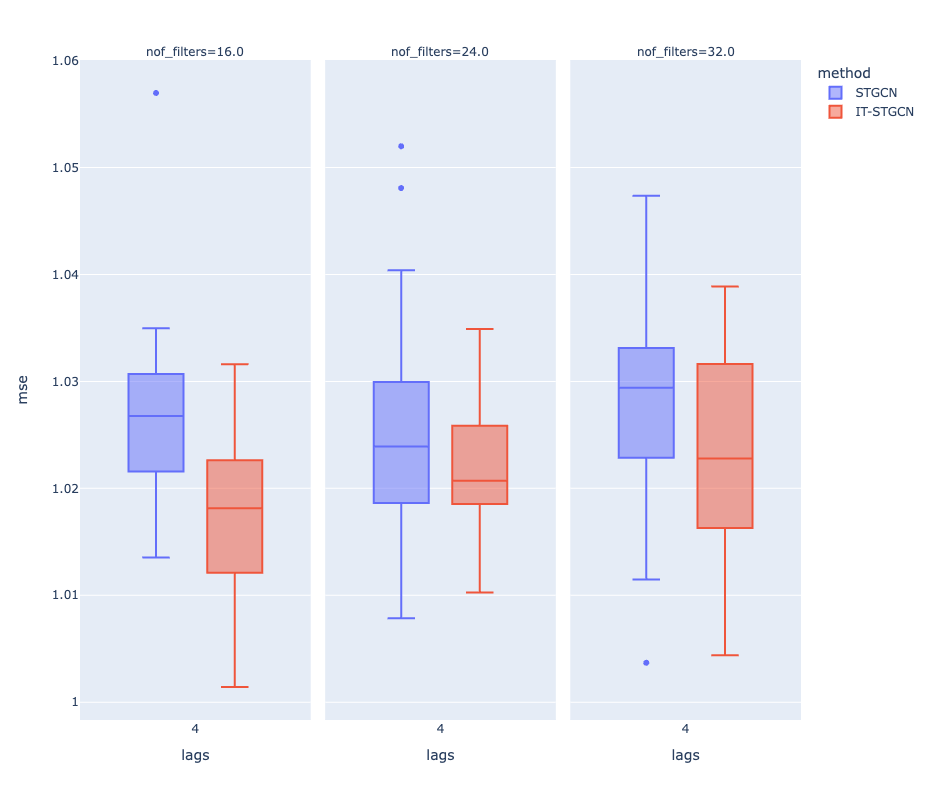

In [29]:
data.query("method!='GNAR' and inter_method!='cubic' ").plot.box(backend='plotly',x='lags',color='method',y='mse',facet_col='nof_filters',height=800)


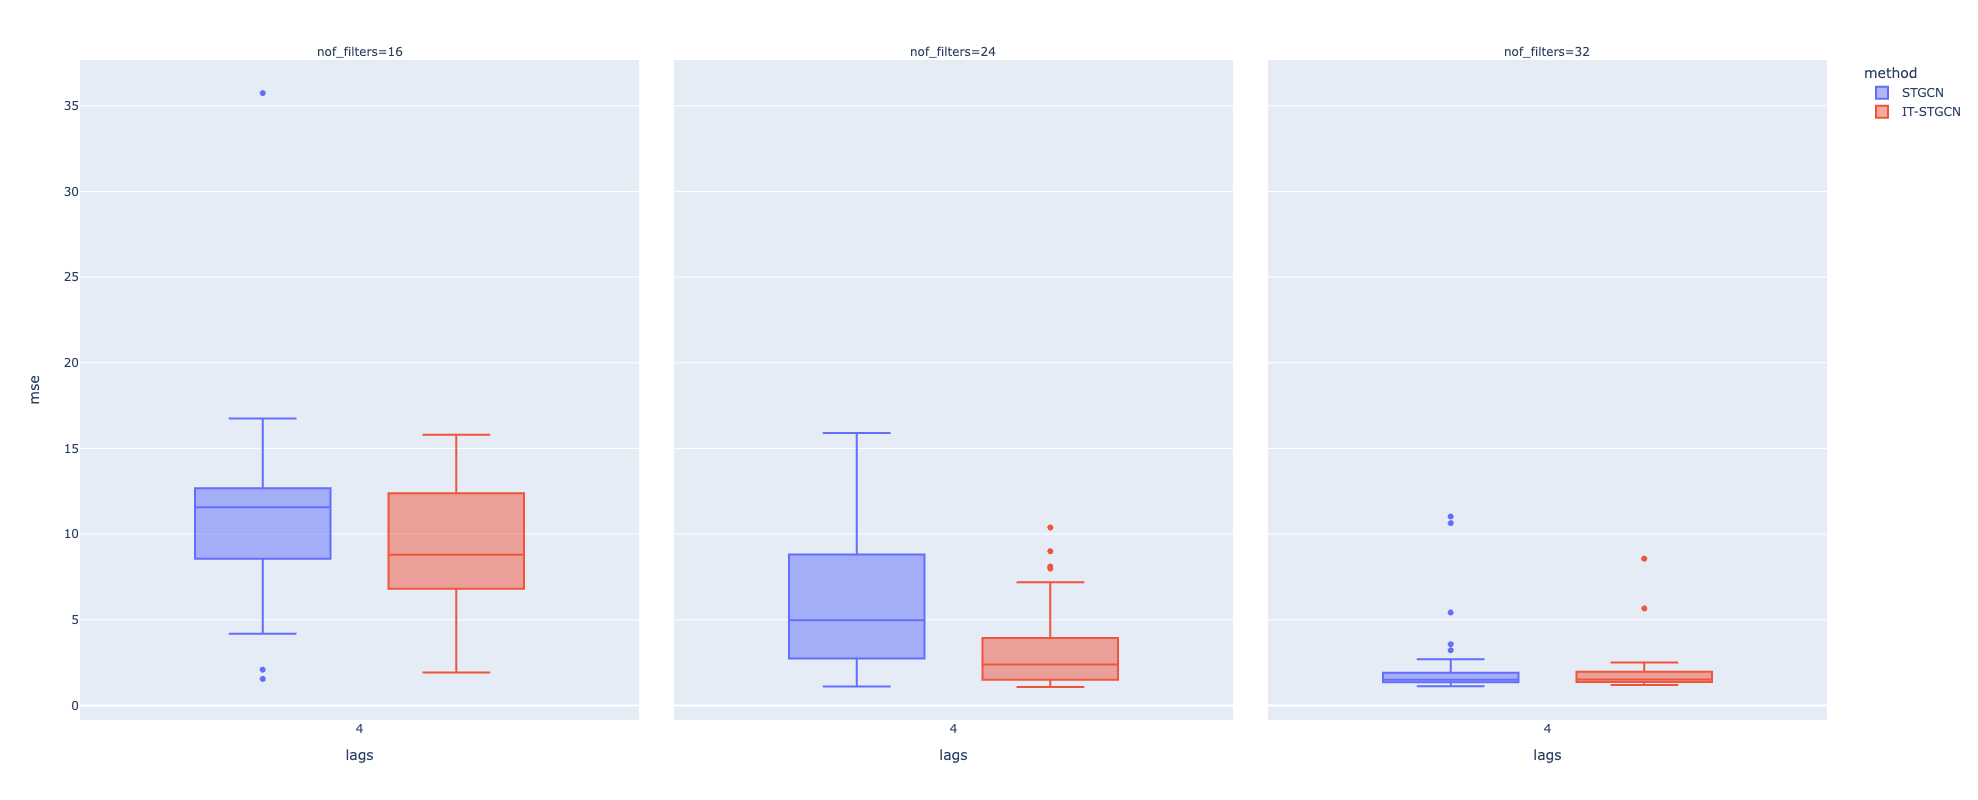

In [445]:
data.query("method!='GNAR' and inter_method=='cubic' ").plot.box(backend='plotly',x='lags',color='method',y='mse',facet_col='nof_filters',height=800)


# Pedalme

데이터셋 미싱이 0.8일때

`The number of derivatives at boundaries does not match: expected 1, got 0+0`

해당 오류, 즉 미분되지 않는 오류가 생긴다.

- 공식 패키지: lags 4 지정
- mrate = 0.3
- nof_filters = 12
    - 필터 클수록 mse 안정적으로 보임!
- lags = 4, 8
    - lags 클 수록 커지는 경향이 있지만,
    - lags 크니까 GNAR보다 mse 평균적으로 낮게 보인다.
- GNAR보다 MSE는 낮음
- cal_time
    - mean = 1초도 안 된다!
    - max = 6초!

# random

In [22]:
data = pd.read_csv('./simulation_results/pedalme_random.csv');data

dataset    method  mrate mtype  lags  nof_filters inter_method  epoch  \
0     pedalme      GNAR    0.0   NaN     2          NaN          NaN    NaN   
1     pedalme  IT-STGCN    0.0   NaN     2          4.0          NaN    5.0   
2     pedalme  IT-STGCN    0.0   NaN     2          4.0          NaN    5.0   
3     pedalme  IT-STGCN    0.0   NaN     2         12.0          NaN    5.0   
4     pedalme  IT-STGCN    0.0   NaN     2         12.0          NaN    5.0   
...       ...       ...    ...   ...   ...          ...          ...    ...   
2527  pedalme     STGCN    0.3  rand     8          4.0       linear    5.0   
2528  pedalme     STGCN    0.3  rand     8          4.0        cubic    5.0   
2529  pedalme  IT-STGCN    0.7  rand     8         12.0       linear    5.0   
2530  pedalme  IT-STGCN    0.3  rand     8          4.0        cubic    5.0   
2531  pedalme      GNAR    0.7  rand     8          NaN       linear    NaN   

           mse  calculation_time  
0     1.151634          0.009696  
1     1.255845          1.595633  
2     1.216815          1.721916  
3     1.249243          1.420279  
4     1.237032          0.910204  
...        ...               ...  
2527  1.429247          0.560238  
2528  1.431005          0.564748  
2529  1.489404          0.543194  
2530  1.372652          0.628229  
2531  1.382030          0.020379  

[2532 rows x 10 columns]

In [23]:
data.query("method!='GNAR'")['calculation_time'].mean(),data.query("method!='GNAR'")['calculation_time'].max(),data.query("method!='GNAR'")['calculation_time'].min()

(0.9260026927347537, 6.205296277999878, 0.4241352081298828)

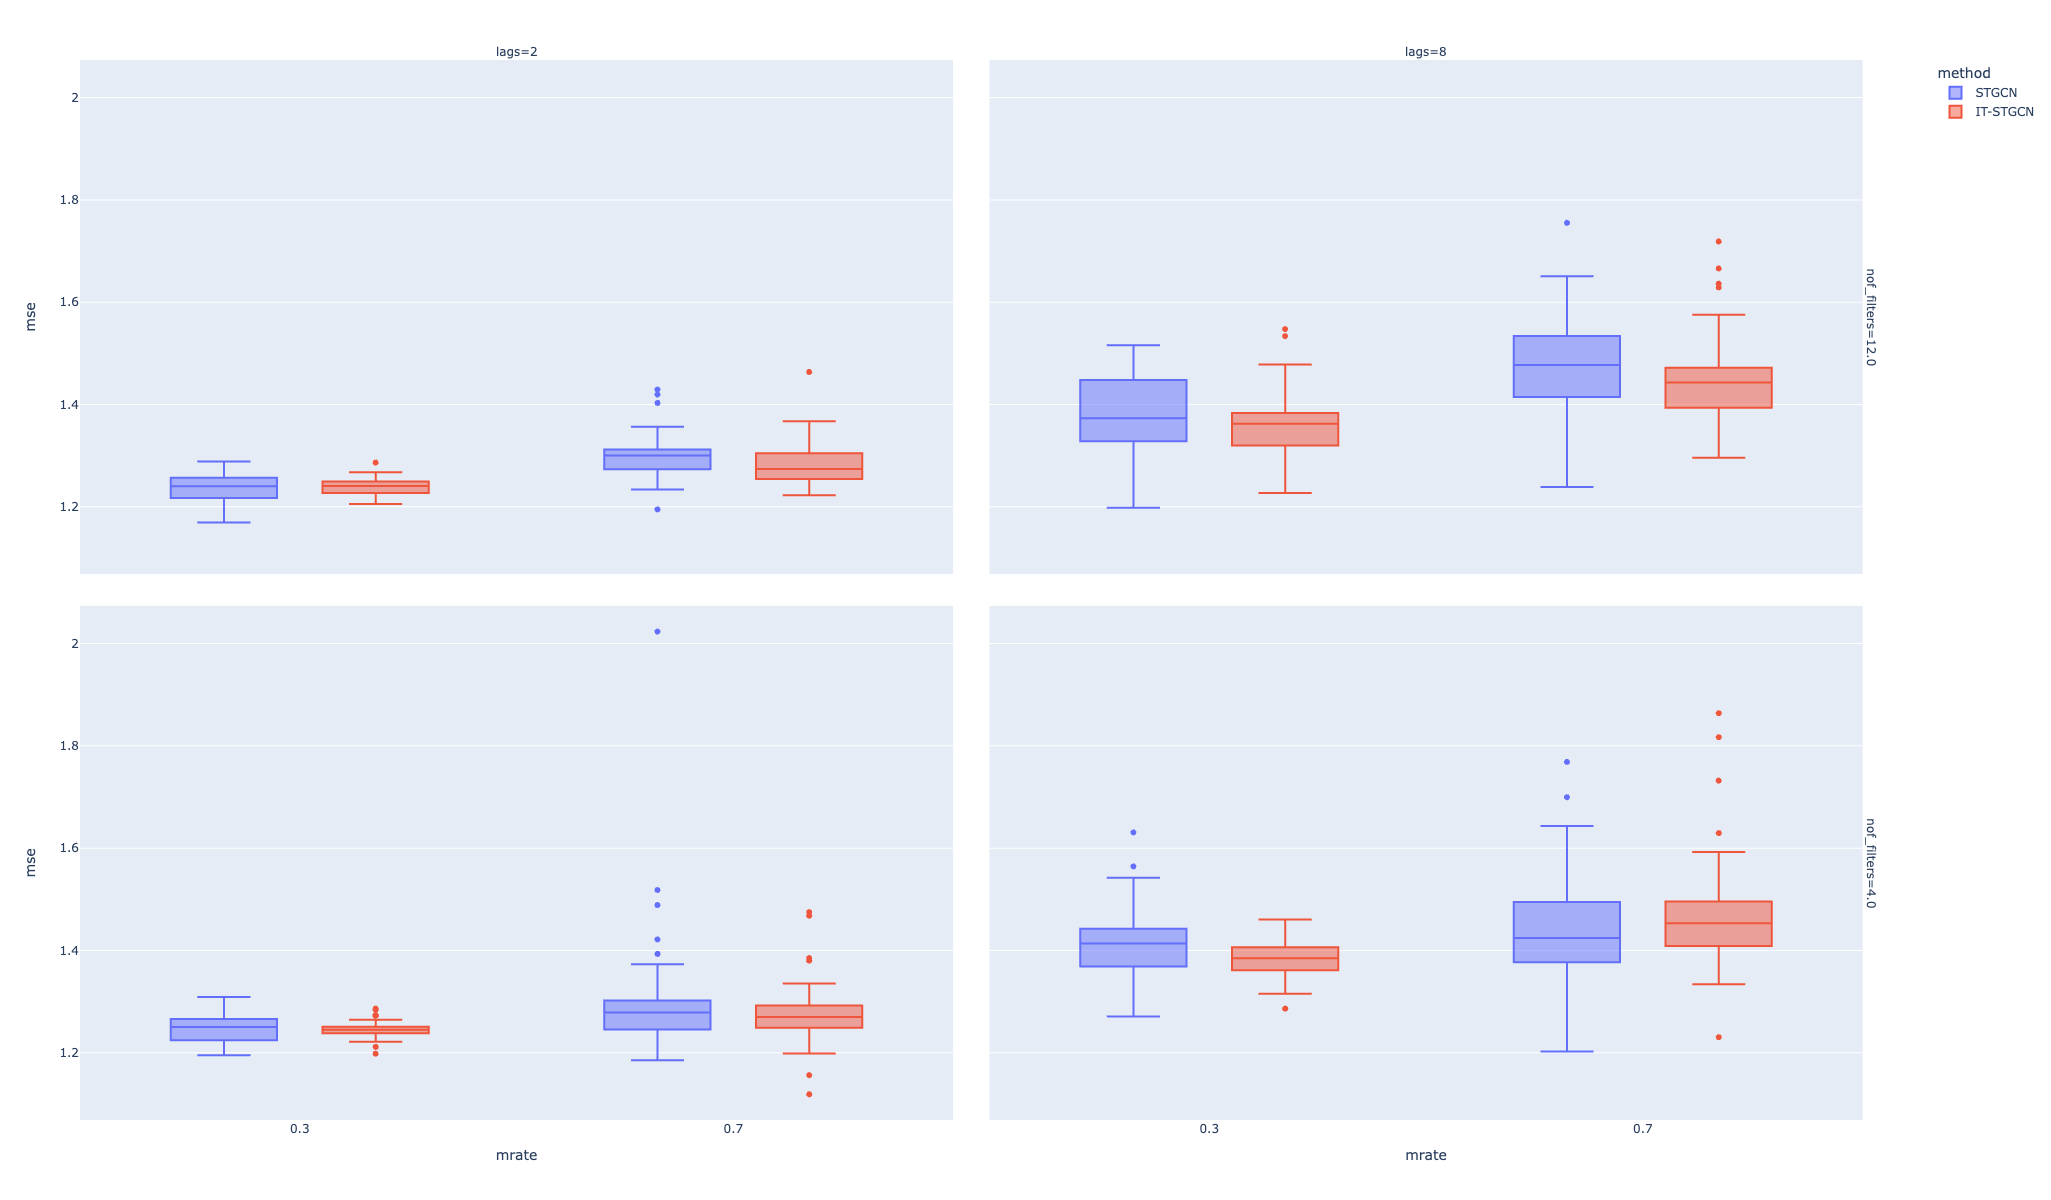

In [30]:
data.query("mtype=='rand' and method!='GNAR' and lags!=4").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


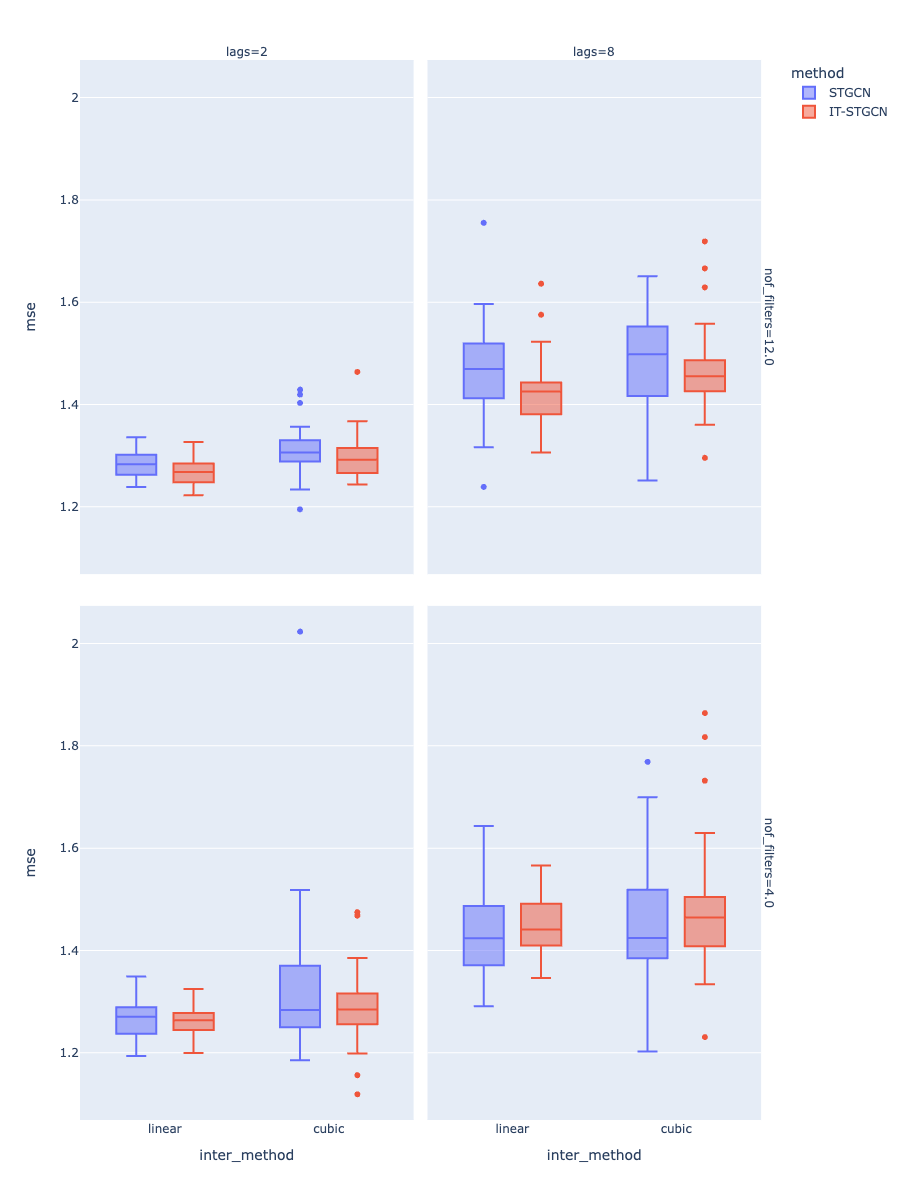

In [26]:
data.query("mtype=='rand' and method!='GNAR' and mrate==0.7").plot.box(backend='plotly',x='inter_method',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


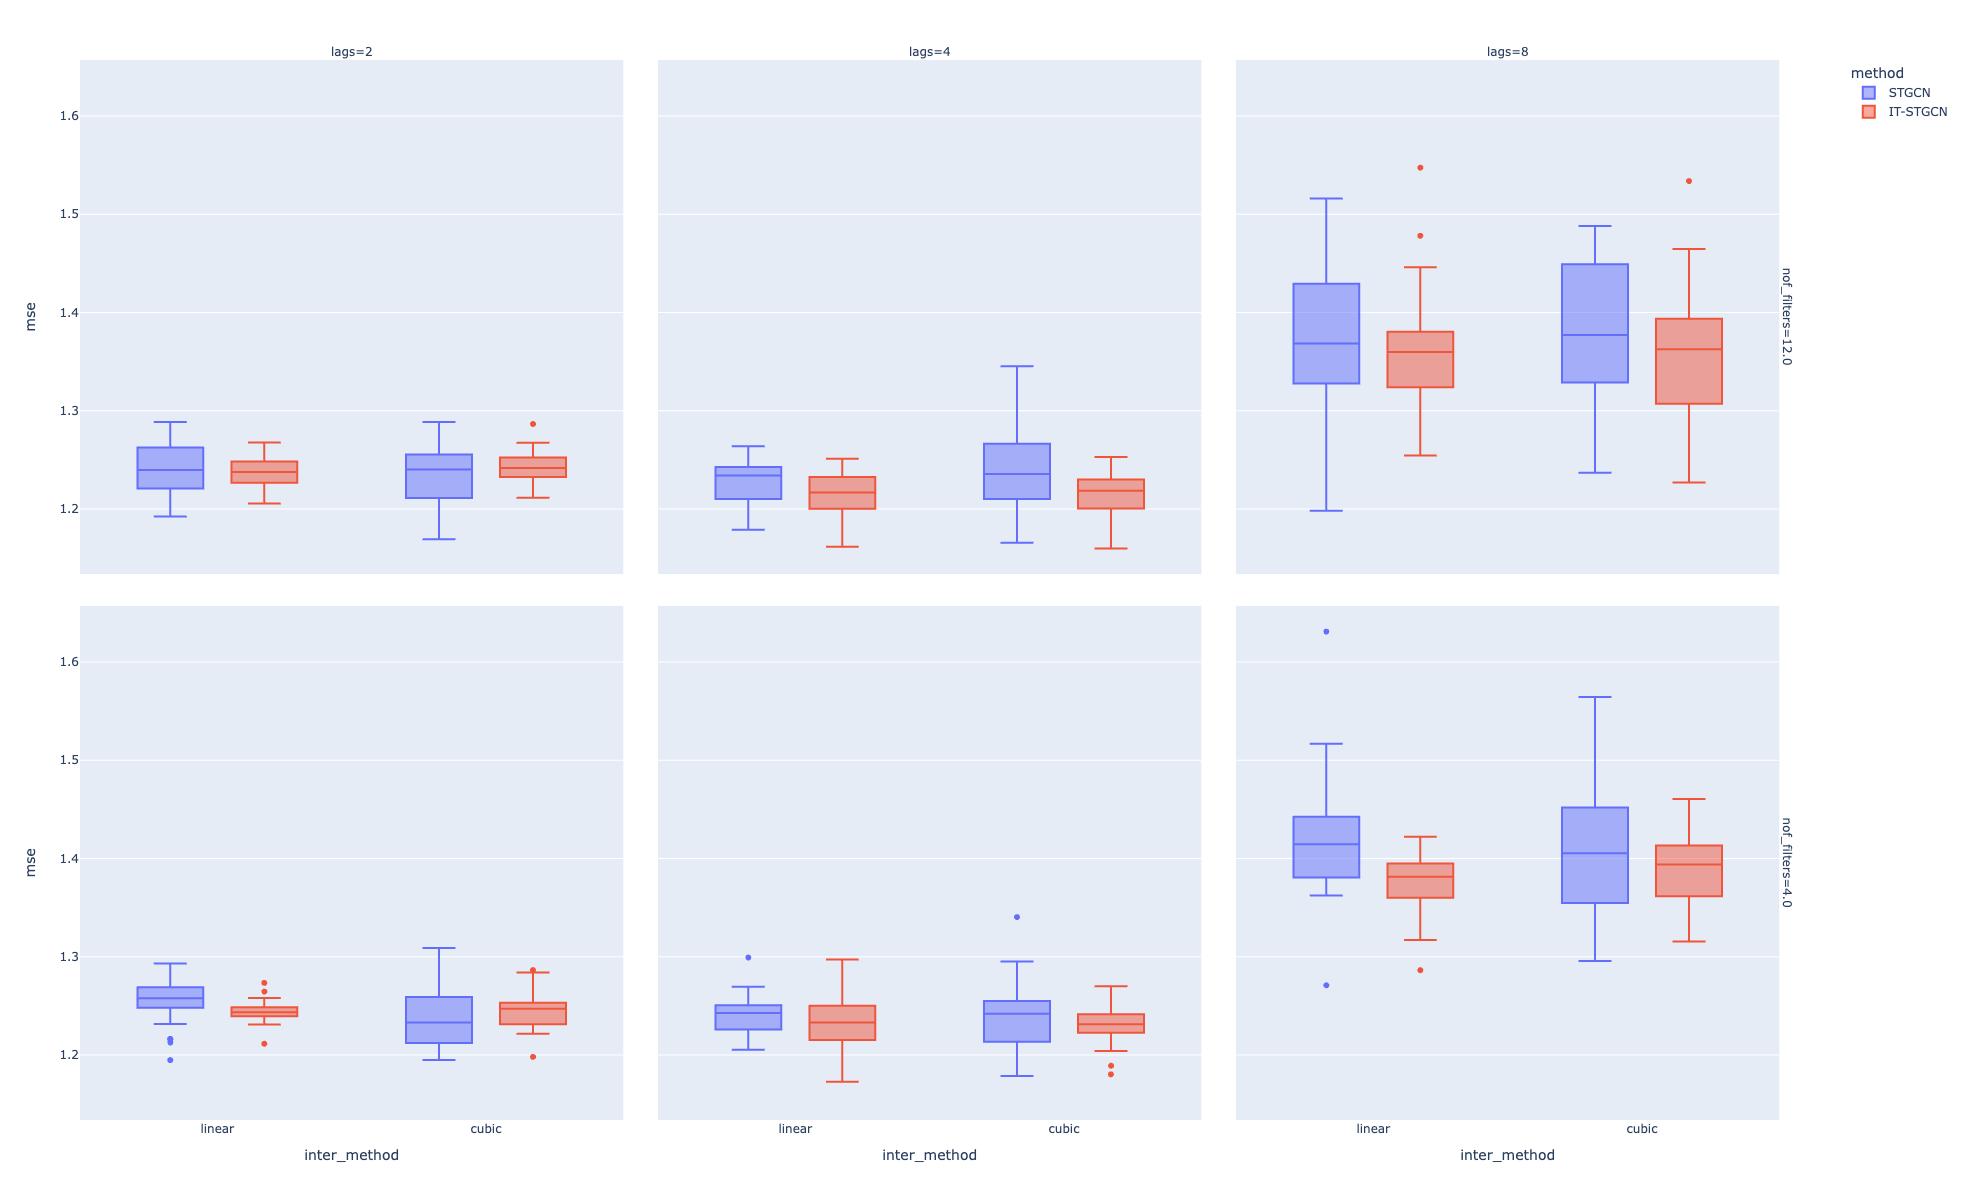

In [413]:
data.query("mtype=='rand' and method!='GNAR' and mrate==0.3").plot.box(backend='plotly',x='inter_method',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


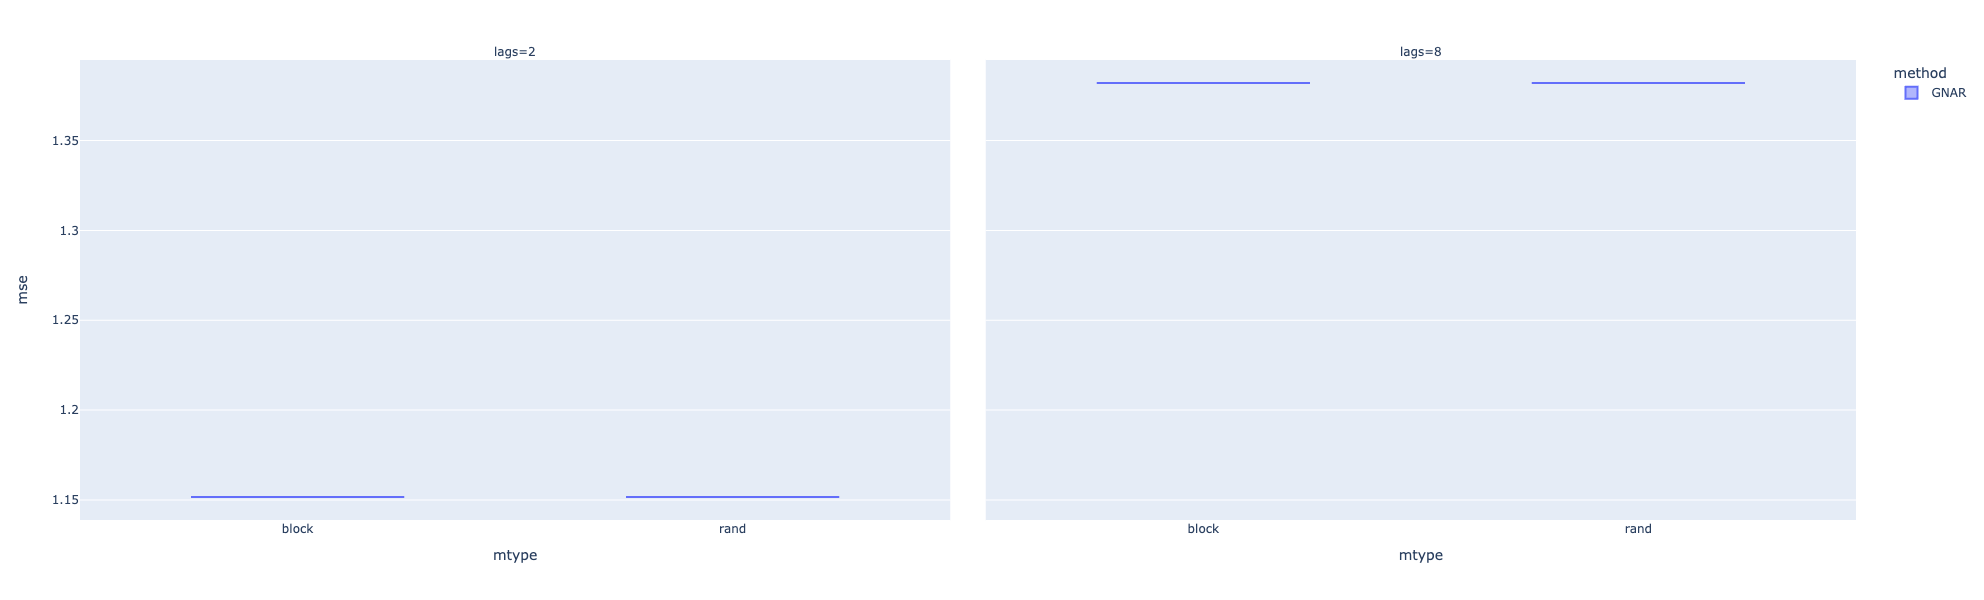

In [165]:
data.query("method=='GNAR'").plot.box(backend='plotly',x='mtype',color='method',y='mse',facet_col='lags',height=600)


#### 시뮬 예정(평균 시간, 평균mse)

lags 4,8

mrate 0.3~0.6



In [323]:
# 1. mrate = 0.3, filter = 4, epoch = 50, lags = 4
data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==12 and lags==8")['calculation_time'].mean(),data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==12 and lags==8")['mse'].mean()

(0.8366350531578064, 1.3687758445739746)

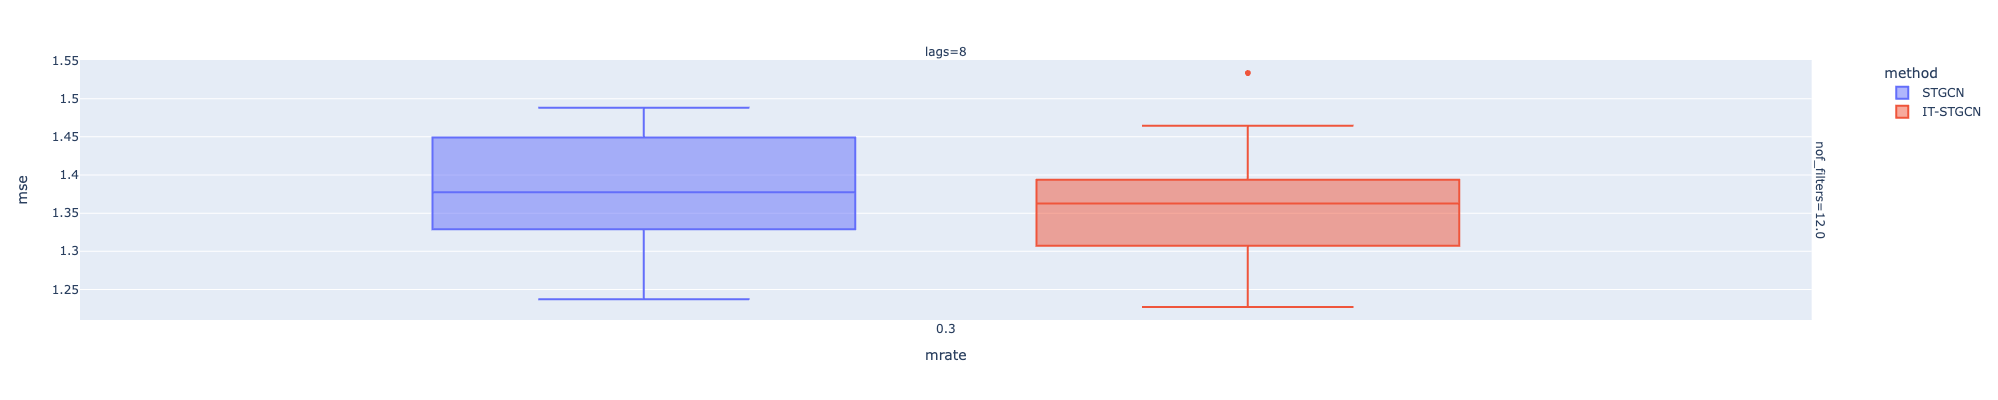

In [324]:
data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==12 and lags==8").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=400)

## block

In [487]:
data = pd.read_csv('./simulation_results/pedalme_block.csv');data

dataset    method     mrate  mtype  lags  nof_filters inter_method  \
0    pedalme  IT-STGCN  0.047619  block     2          4.0        cubic   
1    pedalme     STGCN  0.047619  block     2         12.0       linear   
2    pedalme     STGCN  0.047619  block     2         12.0        cubic   
3    pedalme     STGCN  0.047619  block     2          4.0       linear   
4    pedalme     STGCN  0.047619  block     2          4.0        cubic   
..       ...       ...       ...    ...   ...          ...          ...   
715  pedalme  IT-STGCN  0.045977  block     8          4.0        cubic   
716  pedalme     STGCN  0.045977  block     8         12.0        cubic   
717  pedalme     STGCN  0.045977  block     8         12.0       linear   
718  pedalme  IT-STGCN  0.045977  block     8         12.0       linear   
719  pedalme  IT-STGCN  0.045977  block     8         12.0        cubic   

     epoch       mse  calculation_time  
0      5.0  1.229210          0.758090  
1      5.0  1.223644          0.681700  
2      5.0  1.237086          0.684113  
3      5.0  1.225114          0.659210  
4      5.0  1.216191          0.664208  
..     ...       ...               ...  
715    5.0  1.425474          0.640063  
716    5.0  1.302402          0.718187  
717    5.0  1.336038          0.719500  
718    5.0  1.311962          0.831888  
719    5.0  1.315647          0.667004  

[720 rows x 10 columns]

missing rate 조정하기 30~50% 여러개 block 해서 

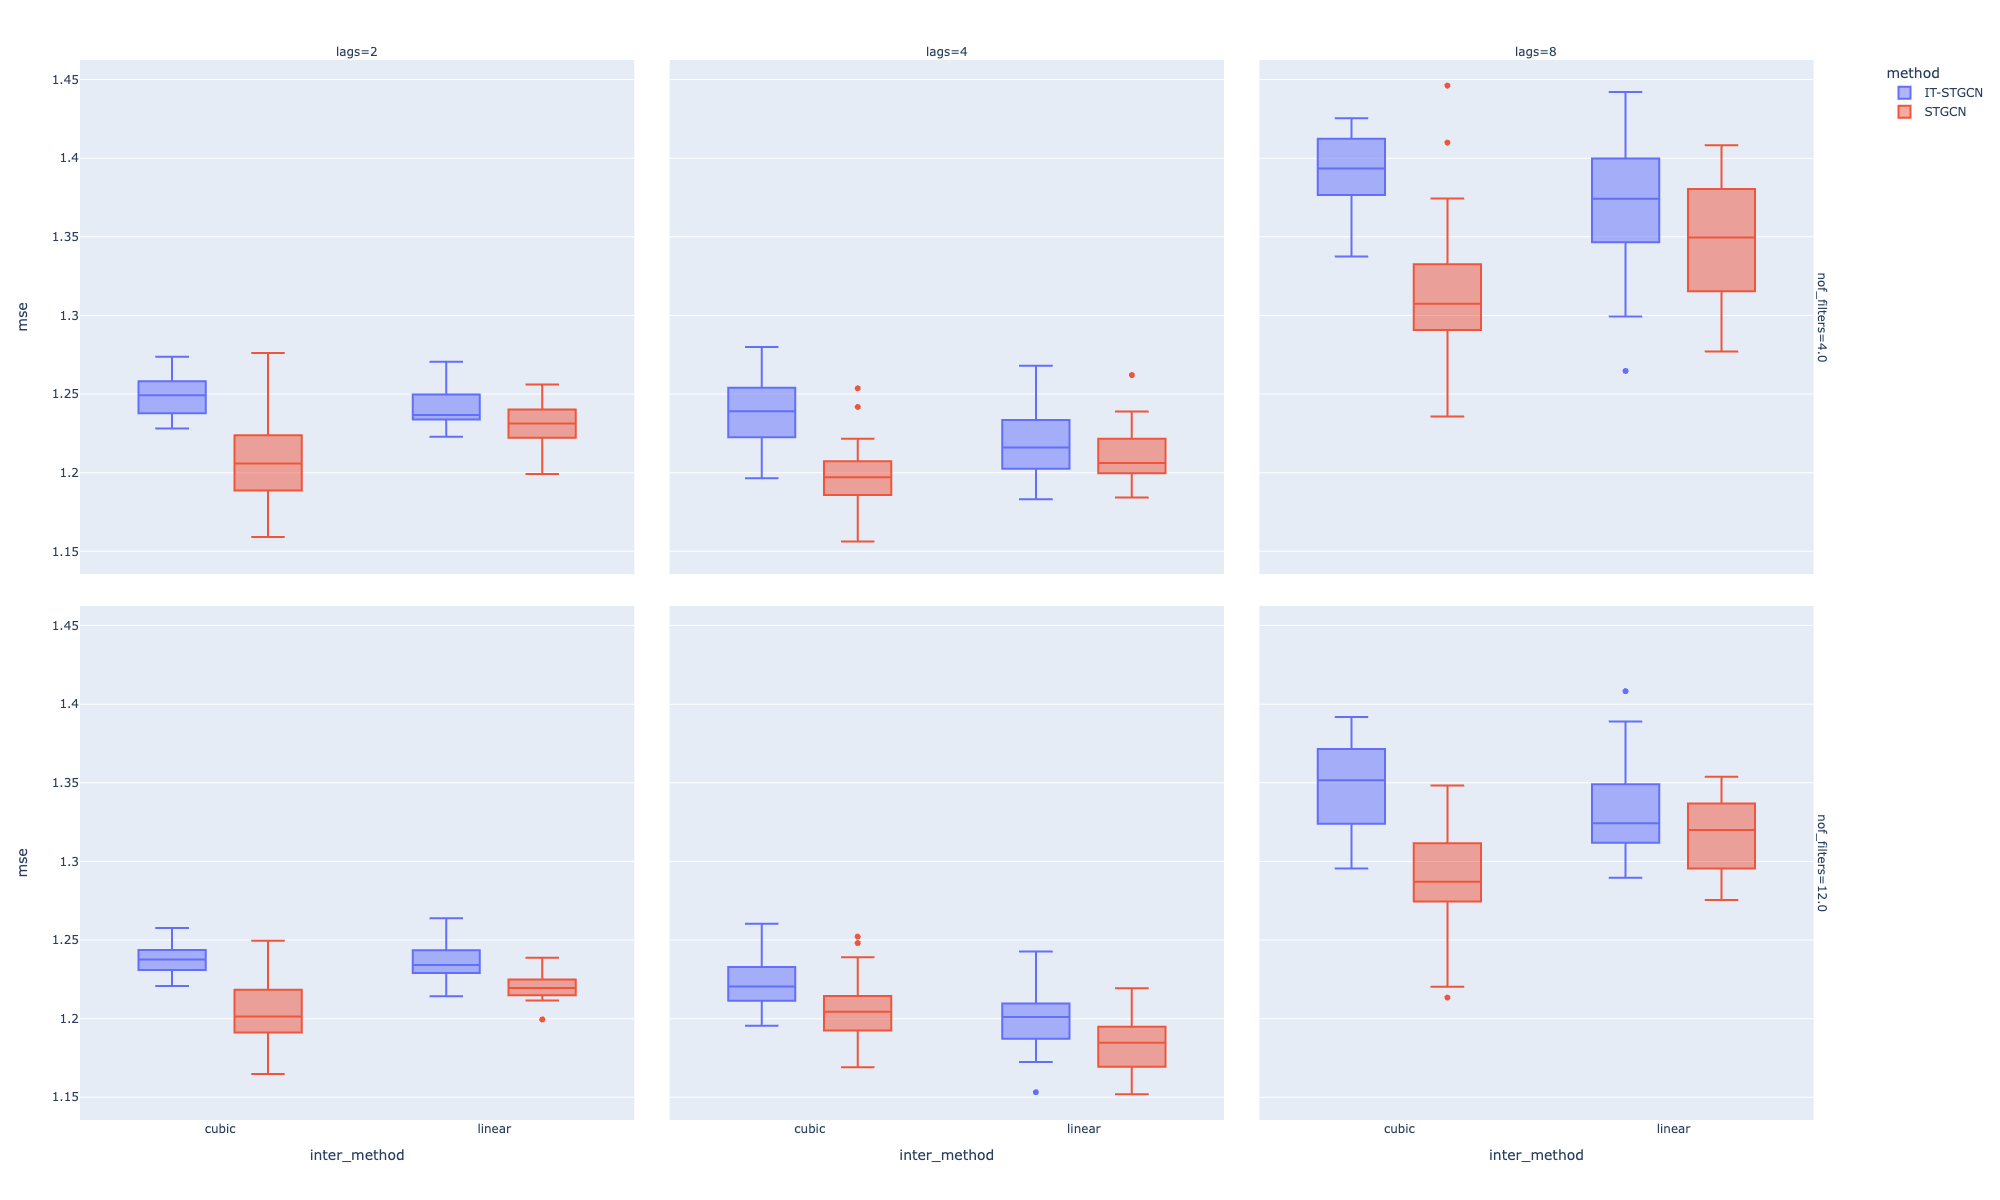

In [491]:
data.query("method!='GNAR'").plot.box(backend='plotly',x='inter_method',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


#### 시뮬 예정(평균 시간, 평균mse)

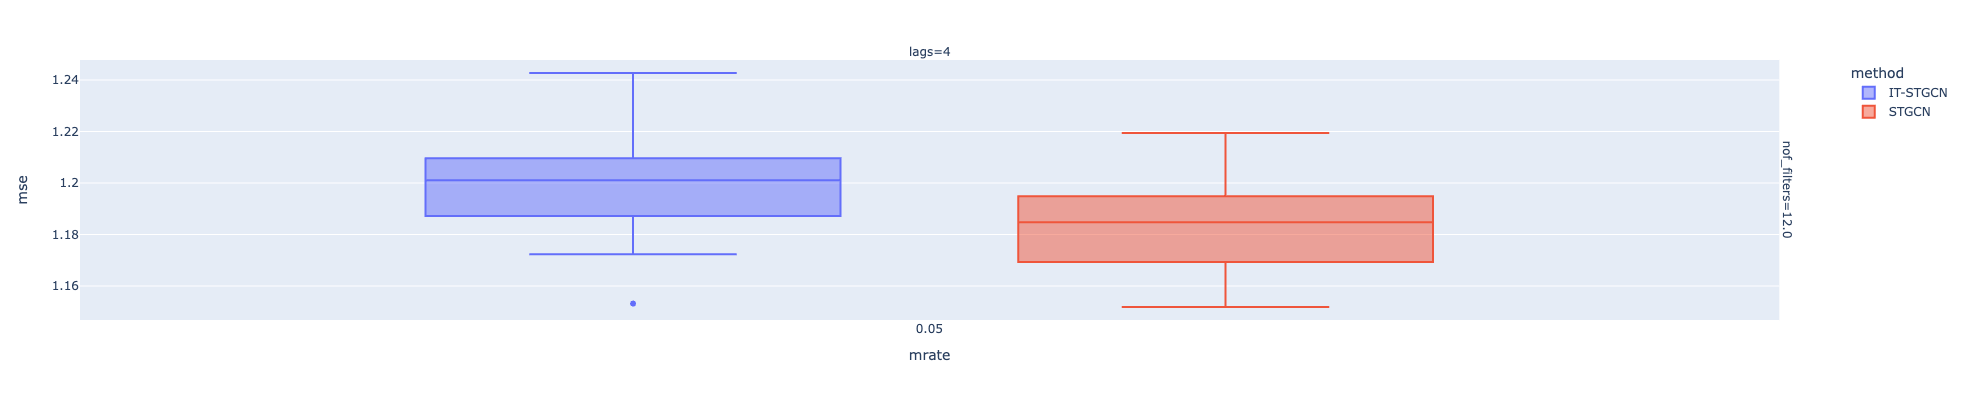

In [495]:
data.query("inter_method=='linear' and nof_filters==12 and lags==4").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=400)

# pedalme simulation result

block1
```python
my_list = [[] for _ in range(15)] #pedalme
another_list = list(range(5,25))
my_list[1] = another_list
my_list[3] = another_list
my_list[5] = another_list
my_list[7] = another_list
my_list[9] = another_list
my_list[11] = another_list
mindex = my_list
```
block 30% missing을 위한 조건

block2
```python
my_list = [[] for _ in range(15)] #pedalme
another_list = list(range(10,25))
my_list[2] = another_list
my_list[4] = another_list
my_list[5] = another_list
my_list[11] = another_list
mindex = my_list
```
block 30% missing을 위한 조건

In [302]:
df1 = pd.read_csv('./simulation_results/2023-04-13_20-37-59.csv') # STGCN, ITSTGCN random 0%,30%, 40%
df2 = pd.read_csv('./simulation_results/2023-04-13_21-29-38.csv') # STGCN, ITSTGCN random 50%, 60%
df3 = pd.read_csv('./simulation_results/2023-04-15_01-08-16.csv') # GNAR random 30%, 40%, 50%, 60%
df4 = pd.read_csv('./simulation_results/2023-04-13_21-56-36.csv') # GNAR block 30%
df5 = pd.read_csv('./simulation_results/2023-04-15_01-08-16.csv') # GNAR random 30%, 40%, 50%
df6 = pd.read_csv('./simulation_results/2023-04-15_01-38-46.csv') # STGCN, ITSTGCN block 2
df7 = pd.read_csv('./simulation_results/2023-04-23_15-17-33.csv') # GNAR 60%
df8 = pd.read_csv('./simulation_results/2023-04-23_15-25-09.csv') # GNAR block 1
df9 = pd.read_csv('./simulation_results/2023-04-23_15-41-20.csv') # GNAR block 2
df10 = pd.read_csv('./simulation_results/2023-04-23_16-25-28.csv') # STGCN,IT-STGCN block 2

In [303]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],axis=0)

In [304]:
data.to_csv('./simulation_results/Real_simulation/pedalme_Simulation.csv',index=False)

In [305]:
data = pd.read_csv('./simulation_results/Real_simulation/pedalme_Simulation.csv')

In [306]:
data.query("method=='GNAR' and mtype == 'rand'")['mse'].mean(),data.query("method=='GNAR' and mtype != 'rand'")['mse'].mean()

(1.3125976622104645, 1.34235417842865)

In [307]:
data.query("method=='STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='STGCN' and mtype != 'rand'")['mse'].mean()

(1.415487505743901, 1.3726410814126333)

In [308]:
data.query("method=='IT-STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='IT-STGCN' and mtype != 'rand'")['mse'].mean()

(1.4283250387758017, 1.378968669573466)

## Baseline

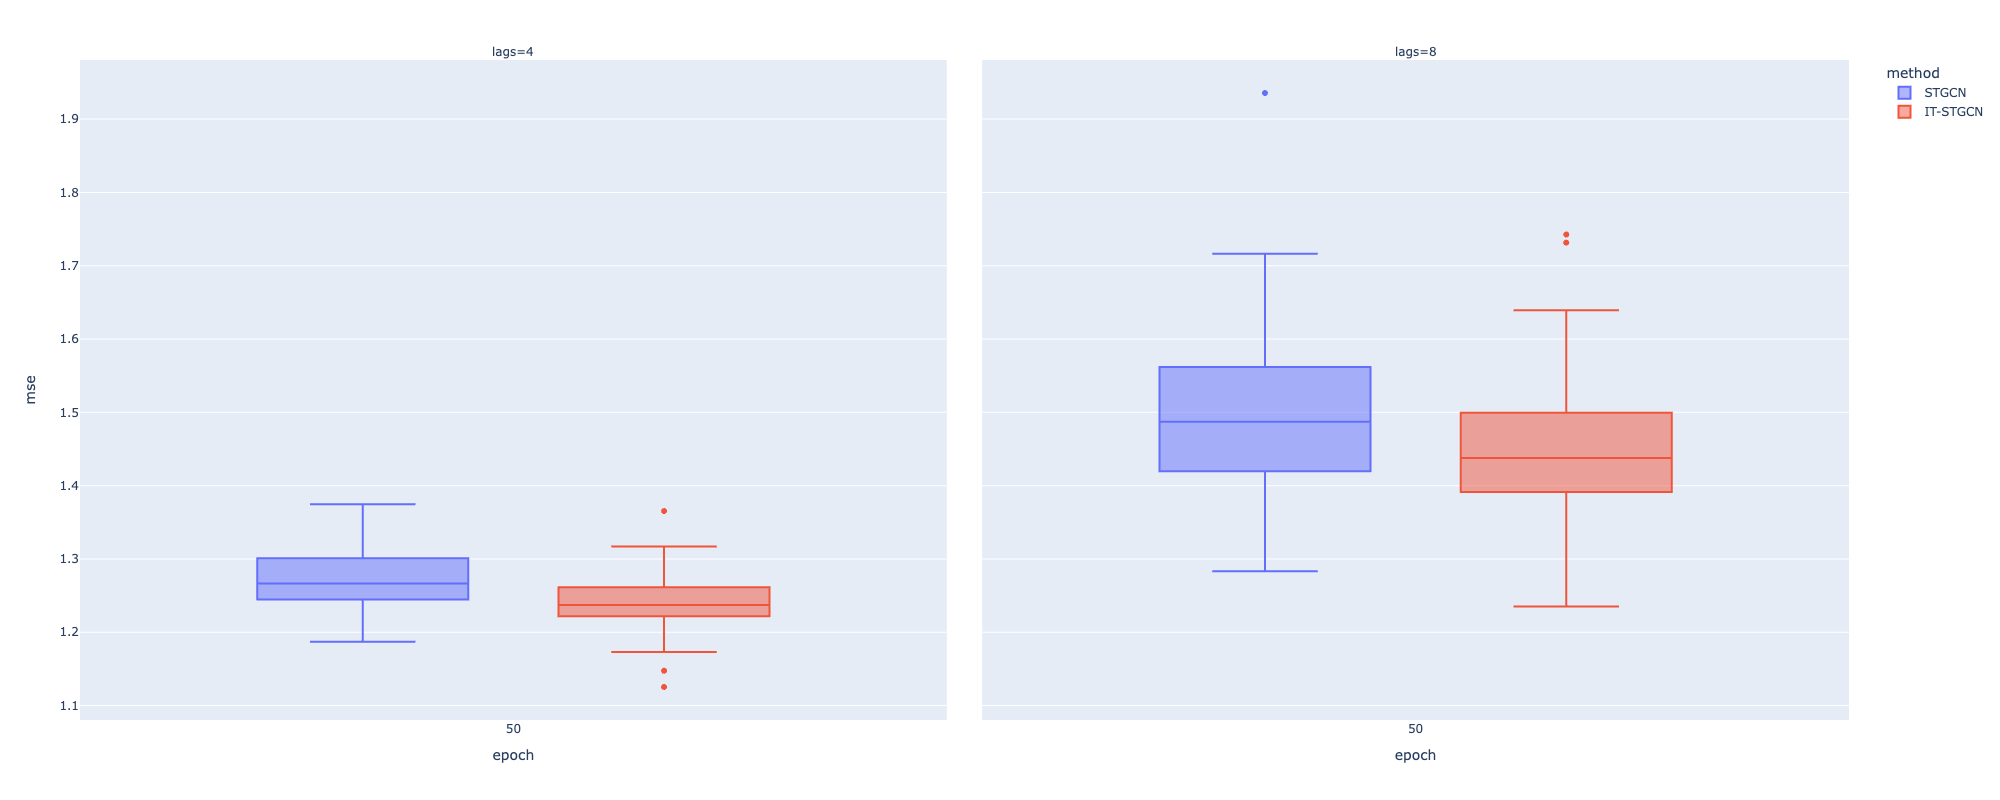

In [309]:
data.query("method!='GNAR' and mrate ==0 ").plot.box(backend='plotly',x='epoch',color='method',y='mse',facet_col='lags',height=800)


---

2nd baseline

In [310]:
df1_snd = pd.read_csv('./simulation_results/2023-04-19_00-13-29.csv')

In [311]:
df1_snd.to_csv('./simulation_results/Real_simulation/pedalme_Simulation_sndbaseline.csv',index=False)

In [312]:
df1_snd = pd.read_csv('./simulation_results/Real_simulation/pedalme_Simulation_sndbaseline.csv')

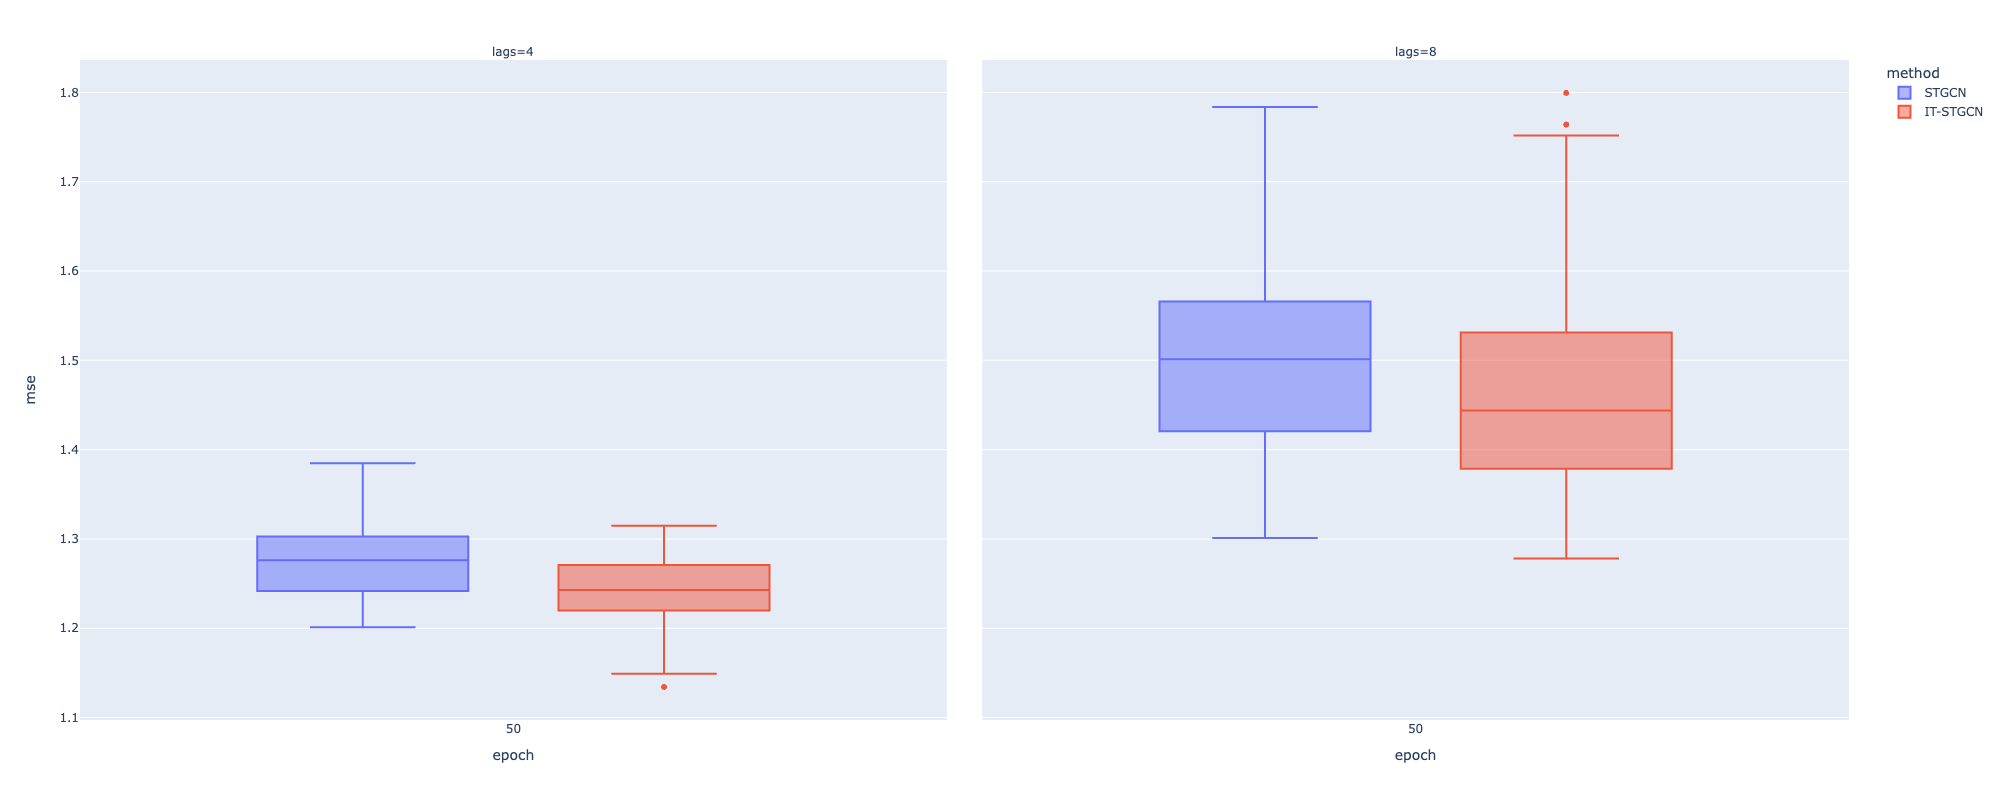

In [313]:
df1_snd.query("method!='GNAR' and mrate ==0 ").plot.box(backend='plotly',x='epoch',color='method',y='mse',facet_col='lags',height=800)


---

## random

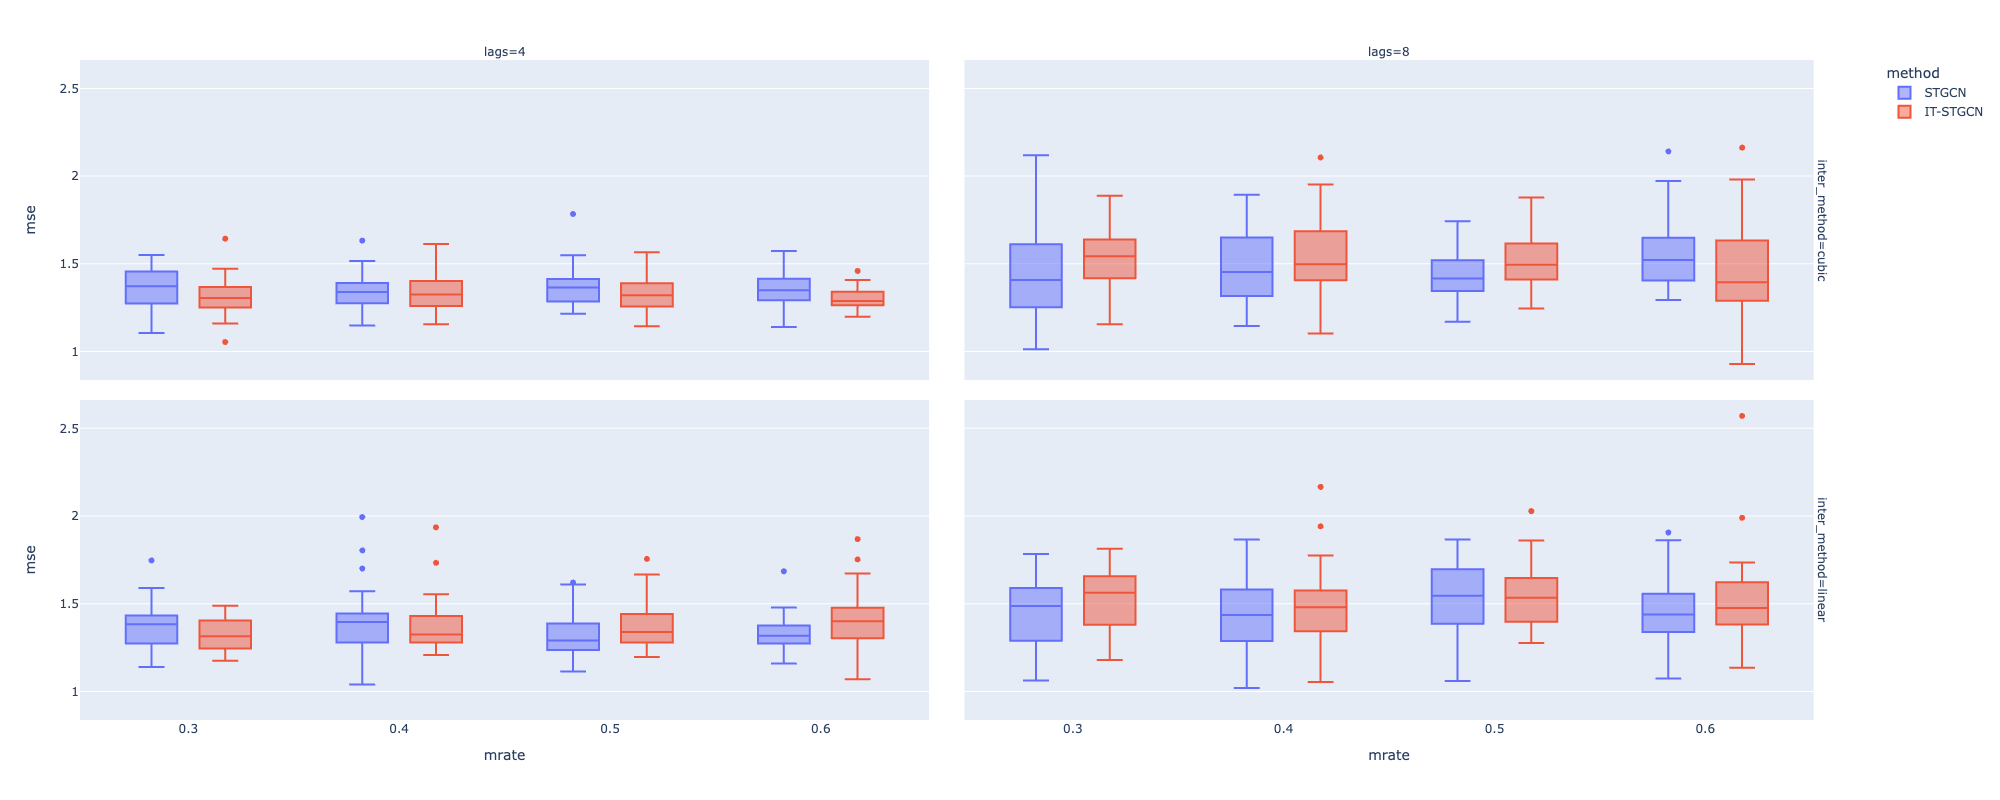

In [314]:
data.query("method!='GNAR' and mtype =='rand' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=800)


## block

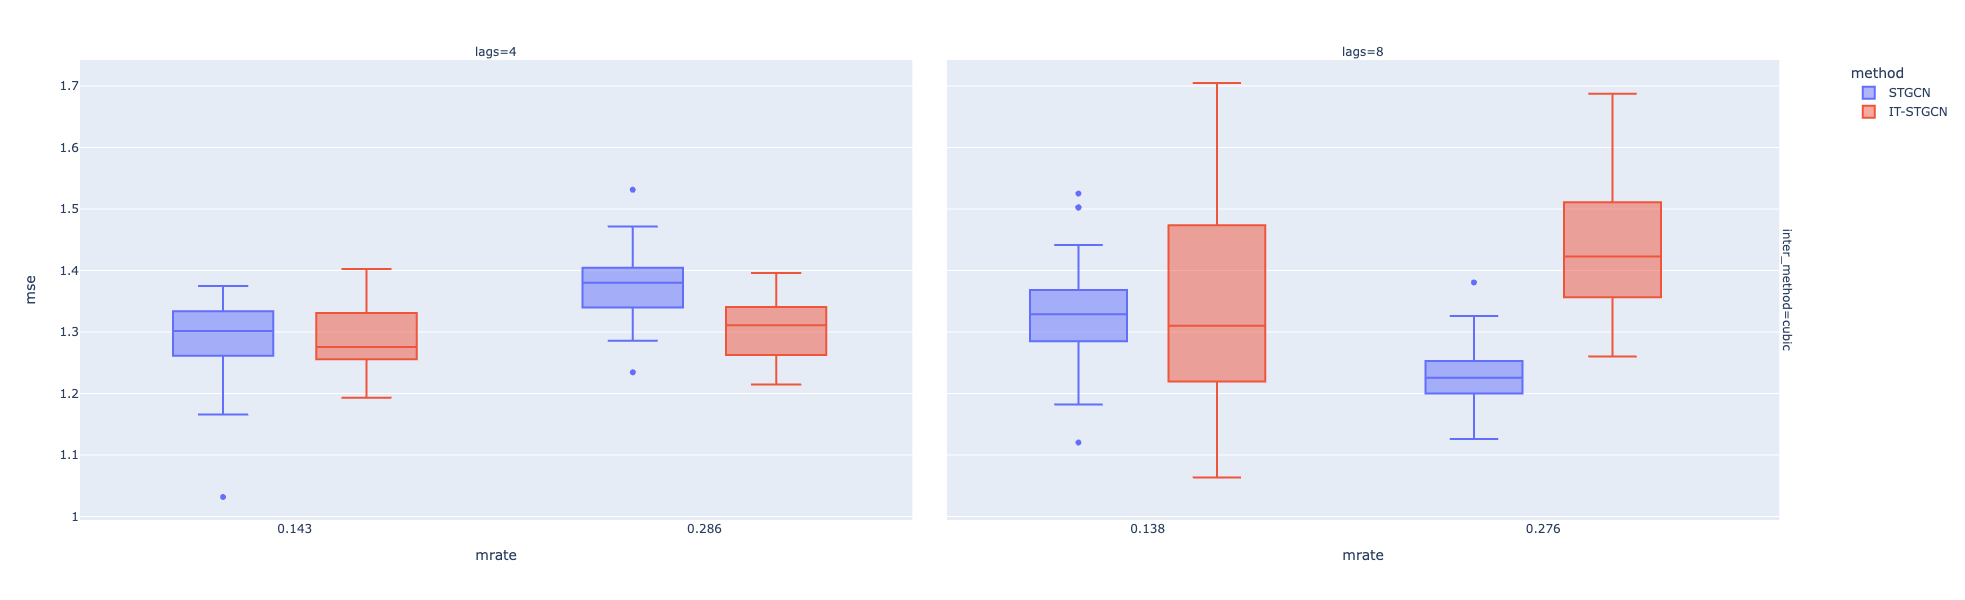

In [315]:
data.query("method!='GNAR' and mtype =='block' and inter_method=='cubic' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=600)


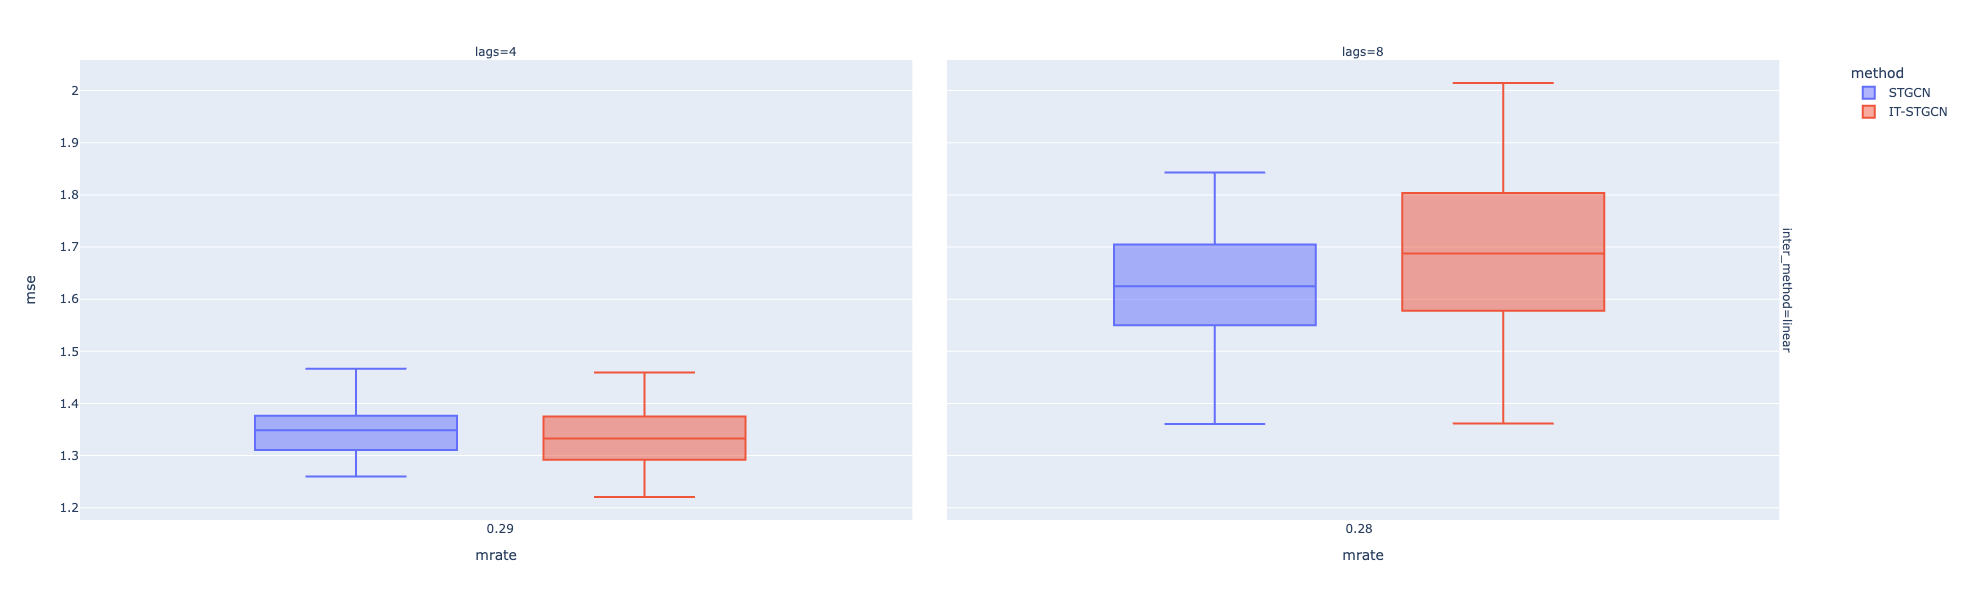

In [316]:
data.query("method!='GNAR' and mtype =='block' and inter_method!='cubic' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=600)


## weight matrix time, node 고려한 결과

In [797]:
df1 = pd.read_csv('./simulation_results/2023-04-30_13-00-12.csv')
df2 = pd.read_csv('./simulation_results/2023-04-30_13-31-32.csv')
df3 = pd.read_csv('./simulation_results/2023-04-30_14-01-49.csv')
df4 = pd.read_csv('./simulation_results/2023-04-30_14-31-56.csv')
df5 = pd.read_csv('./simulation_results/2023-04-30_15-02-23.csv')
df6 = pd.read_csv('./simulation_results/2023-04-30_15-33-03.csv')
df7 = pd.read_csv('./simulation_results/2023-04-30_16-07-43.csv')
df8 = pd.read_csv('./simulation_results/2023-04-30_16-41-35.csv')
df9 = pd.read_csv('./simulation_results/2023-04-30_17-14-51.csv')
df10 = pd.read_csv('./simulation_results/2023-04-30_17-49-34.csv')
df11 = pd.read_csv('./simulation_results/2023-04-30_18-21-29.csv')
df12 = pd.read_csv('./simulation_results/2023-04-30_18-50-24.csv')
df13 = pd.read_csv('./simulation_results/2023-04-30_20-33-28.csv')
df14 = pd.read_csv('./simulation_results/2023-05-04_16-40-05.csv')
df15 = pd.read_csv('./simulation_results/2023-05-04_17-34-00.csv')

In [798]:
data2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15],axis=0)

In [799]:
data2.to_csv('./simulation_results/Real_simulation/pedalme_Simulation_itstgcnsnd.csv',index=False)

In [800]:
data2 = pd.read_csv('./simulation_results/Real_simulation/pedalme_Simulation_itstgcnsnd.csv')

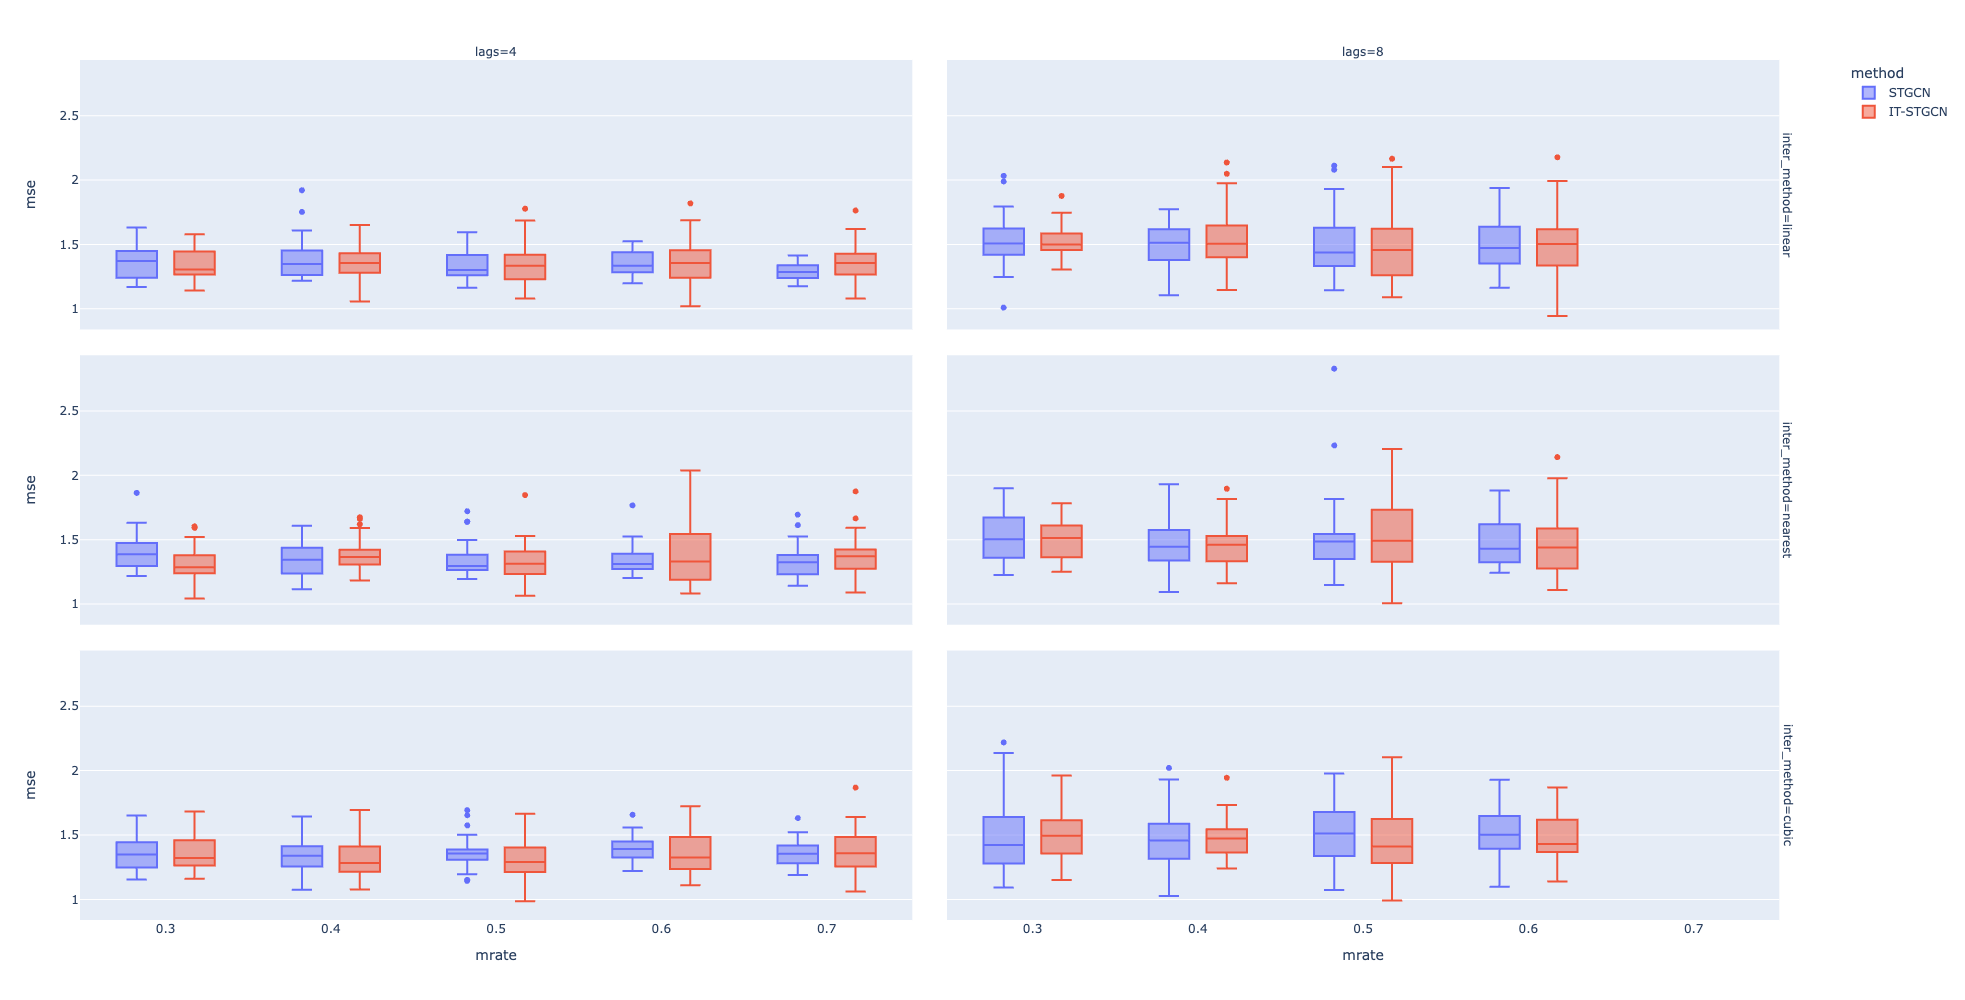

In [801]:
data2.query("mtype!='block'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=1000)

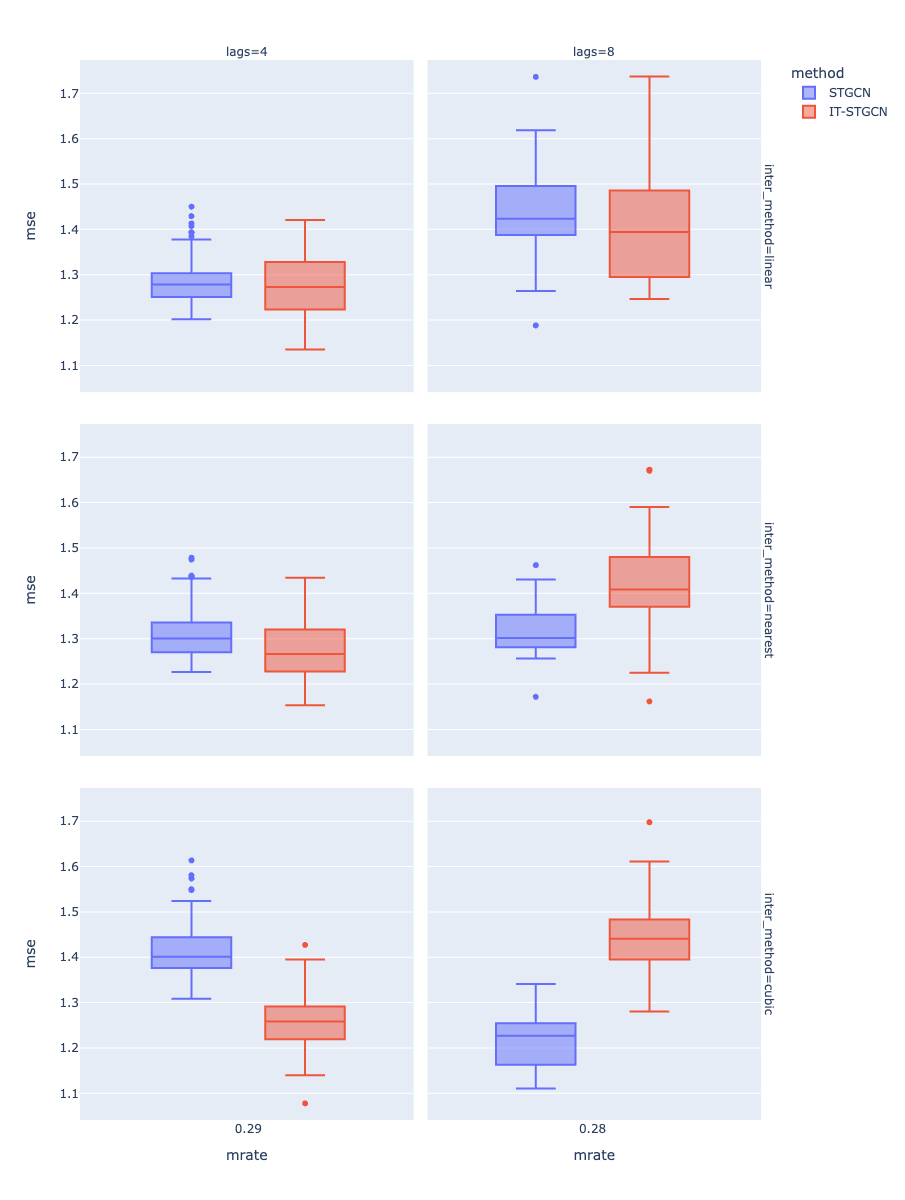

In [802]:
data2.query("mtype=='block'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=1200)

# Wikimath

- 공식 패키지: lags 8 지정
- 오히려 cuboic 보다 linear가 더 잘 맞추는 경향
- mrate = 0.3
    - 크면 이상치 심하게 나와서 작게 잡기
- nof_filters = 12, 16
    - 필터 크니까 mse 내려감
- lags = 2,
- cal_time
    - mean = 71s
    - max = 212s

## baseline

random epoch 1번

In [148]:
df1 = pd.read_csv('./simulation_results/2023-04-15_16-58-03.csv')
df2 = pd.read_csv('./simulation_results/2023-04-15_17-01-39.csv')
df3 = pd.read_csv('./simulation_results/2023-04-15_17-07-23.csv')
df4 = pd.read_csv('./simulation_results/2023-04-15_17-13-13.csv')
df5 = pd.read_csv('./simulation_results/2023-04-15_17-29-49.csv')

In [149]:
data = pd.concat([df1,df2,df3,df4,df5],axis=0)

In [ ]:
data.query("method=='STGCN'").sort_values(['mrate','lags','nof_filters'])

In [ ]:
data.query("method!='STGCN'").sort_values(['mrate','lags','nof_filters'])

# Wikimath simulation result

In [262]:
df1 = pd.read_csv('./simulation_results/2023-04-21_14-32-44.csv')
df2 = pd.read_csv('./simulation_results/2023-04-22_05-38-23.csv')
df3 = pd.read_csv('./simulation_results/2023-04-22_20-41-26.csv')
df4 = pd.read_csv('./simulation_results/2023-04-23_13-13-49.csv')
df5 = pd.read_csv('./simulation_results/2023-04-23_18-03-50.csv')
df6 = pd.read_csv('./simulation_results/2023-04-24_18-25-09.csv')
df7 = pd.read_csv('./simulation_results/2023-04-24_03-33-57.csv')
df8 = pd.read_csv('./simulation_results/2023-04-25_11-18-21.csv')
df9 = pd.read_csv('./simulation_results/2023-04-25_22-51-21.csv')
df10 = pd.read_csv('./simulation_results/2023-04-26_07-35-21.csv')
df11 = pd.read_csv('./simulation_results/2023-04-28_18-07-23.csv')
df12 = pd.read_csv('./simulation_results/2023-04-30_04-35-07.csv')

In [263]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12],axis=0)

In [265]:
data.to_csv('./simulation_results/Real_simulation/wikimath.csv',index=False)

In [266]:
data = pd.read_csv('./simulation_results/Real_simulation/wikimath.csv')

## Baseline

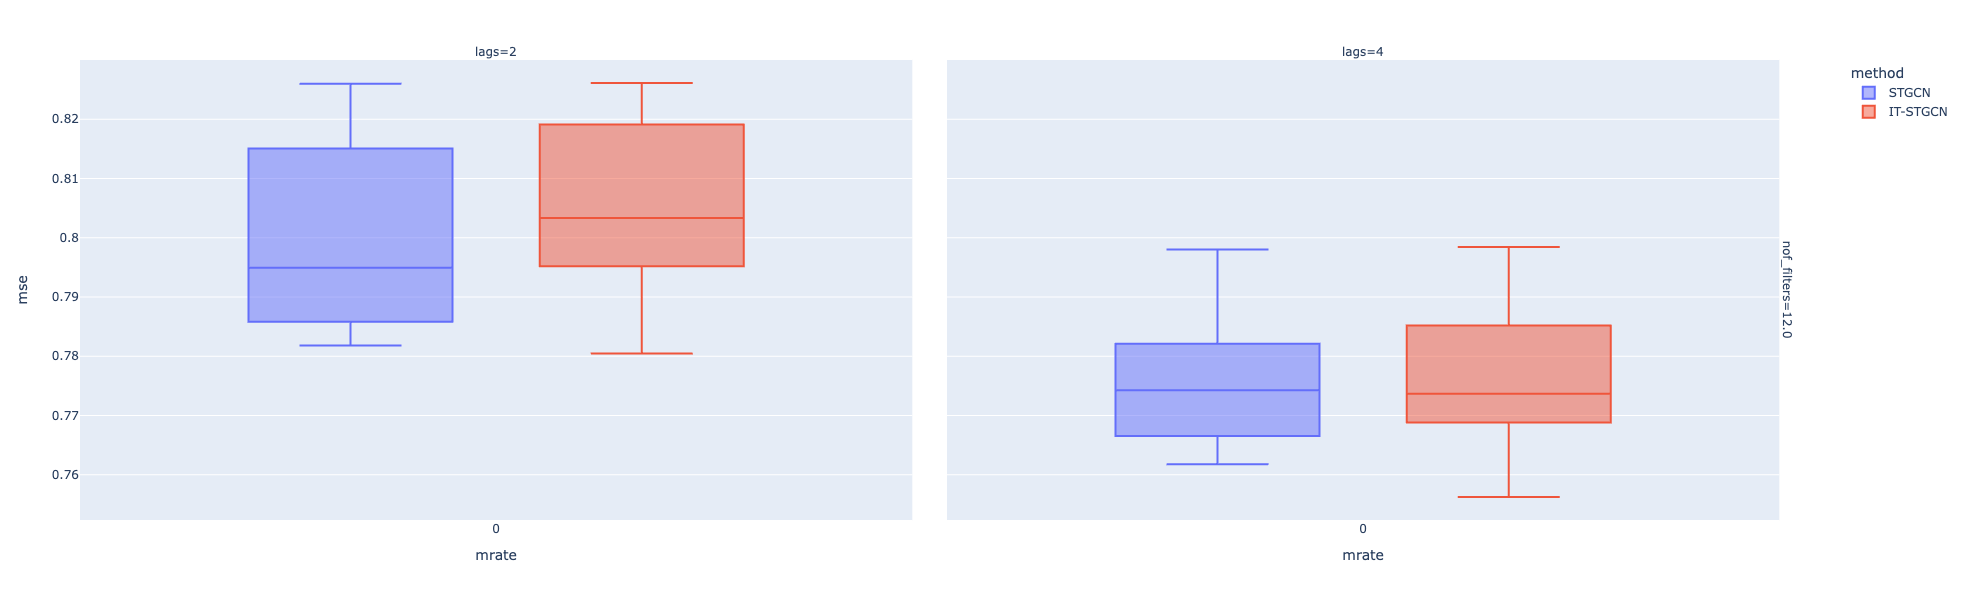

In [267]:
data.query("mrate==0 and method!='GNAR'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=600)

## random

In [268]:
data.query("method=='GNAR'").groupby('mrate')['mse'].unique()

mrate
0.0    [1.2959295511245728, 1.2547194957733154]
0.3    [1.2959295511245728, 1.2547194957733154]
0.5    [1.2959295511245728, 1.2547194957733154]
Name: mse, dtype: object

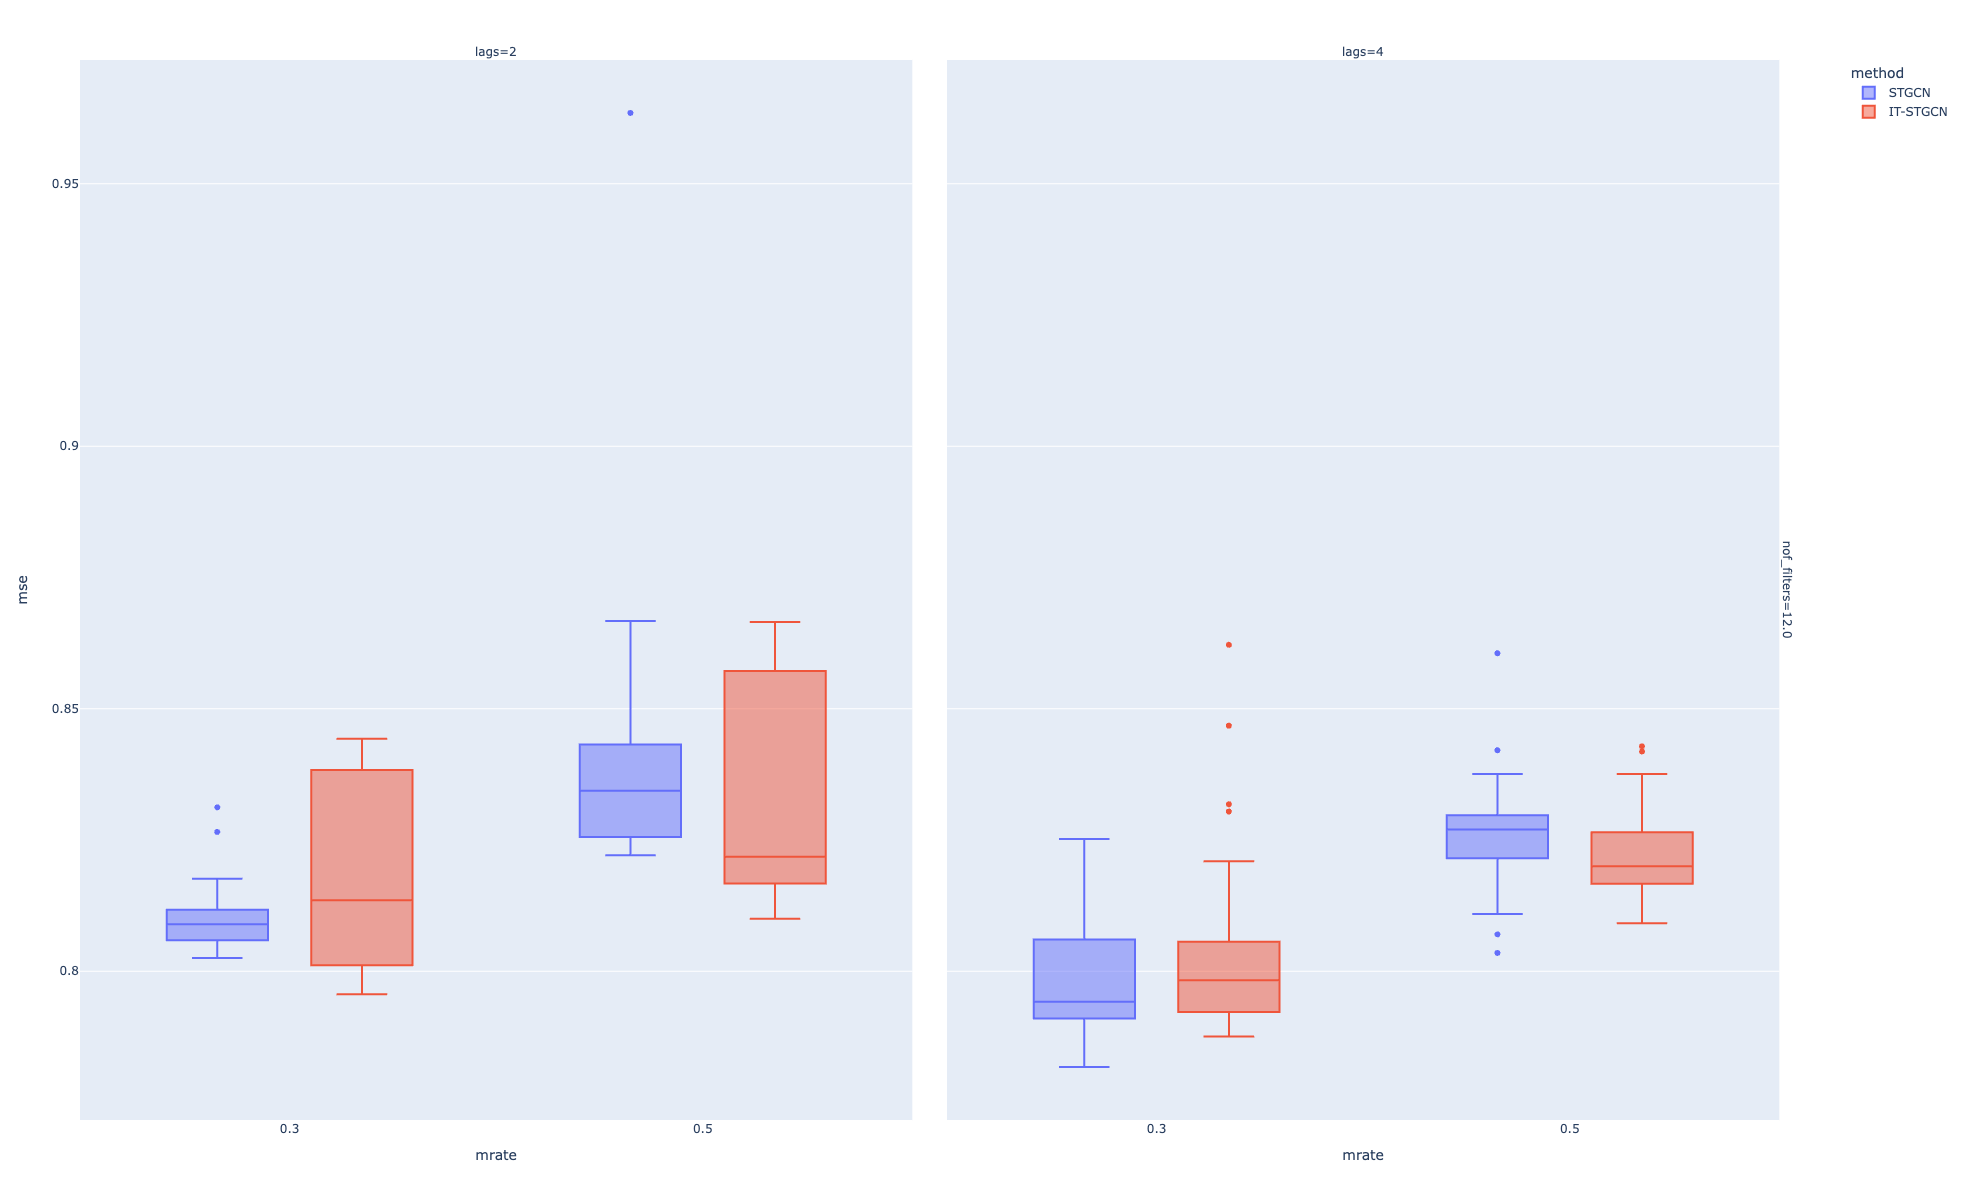

In [269]:
data.query("mtype=='rand' and mrate !=0 and method!='GNAR'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


## block

In [171]:
df1 = pd.read_csv('./simulation_results/2023-04-27_07-50-11.csv')
df2 = pd.read_csv('./simulation_results/2023-04-27_22-09-07.csv')
df3 = pd.read_csv('./simulation_results/2023-04-28_14-40-59.csv')

In [172]:
data = pd.concat([df1,df2,df3],axis=0)

In [174]:
data.to_csv('./simulation_results/Real_simulation/wikimath_block.csv',index=False)

In [175]:
data = pd.read_csv('./simulation_results/Real_simulation/wikimath_block.csv')

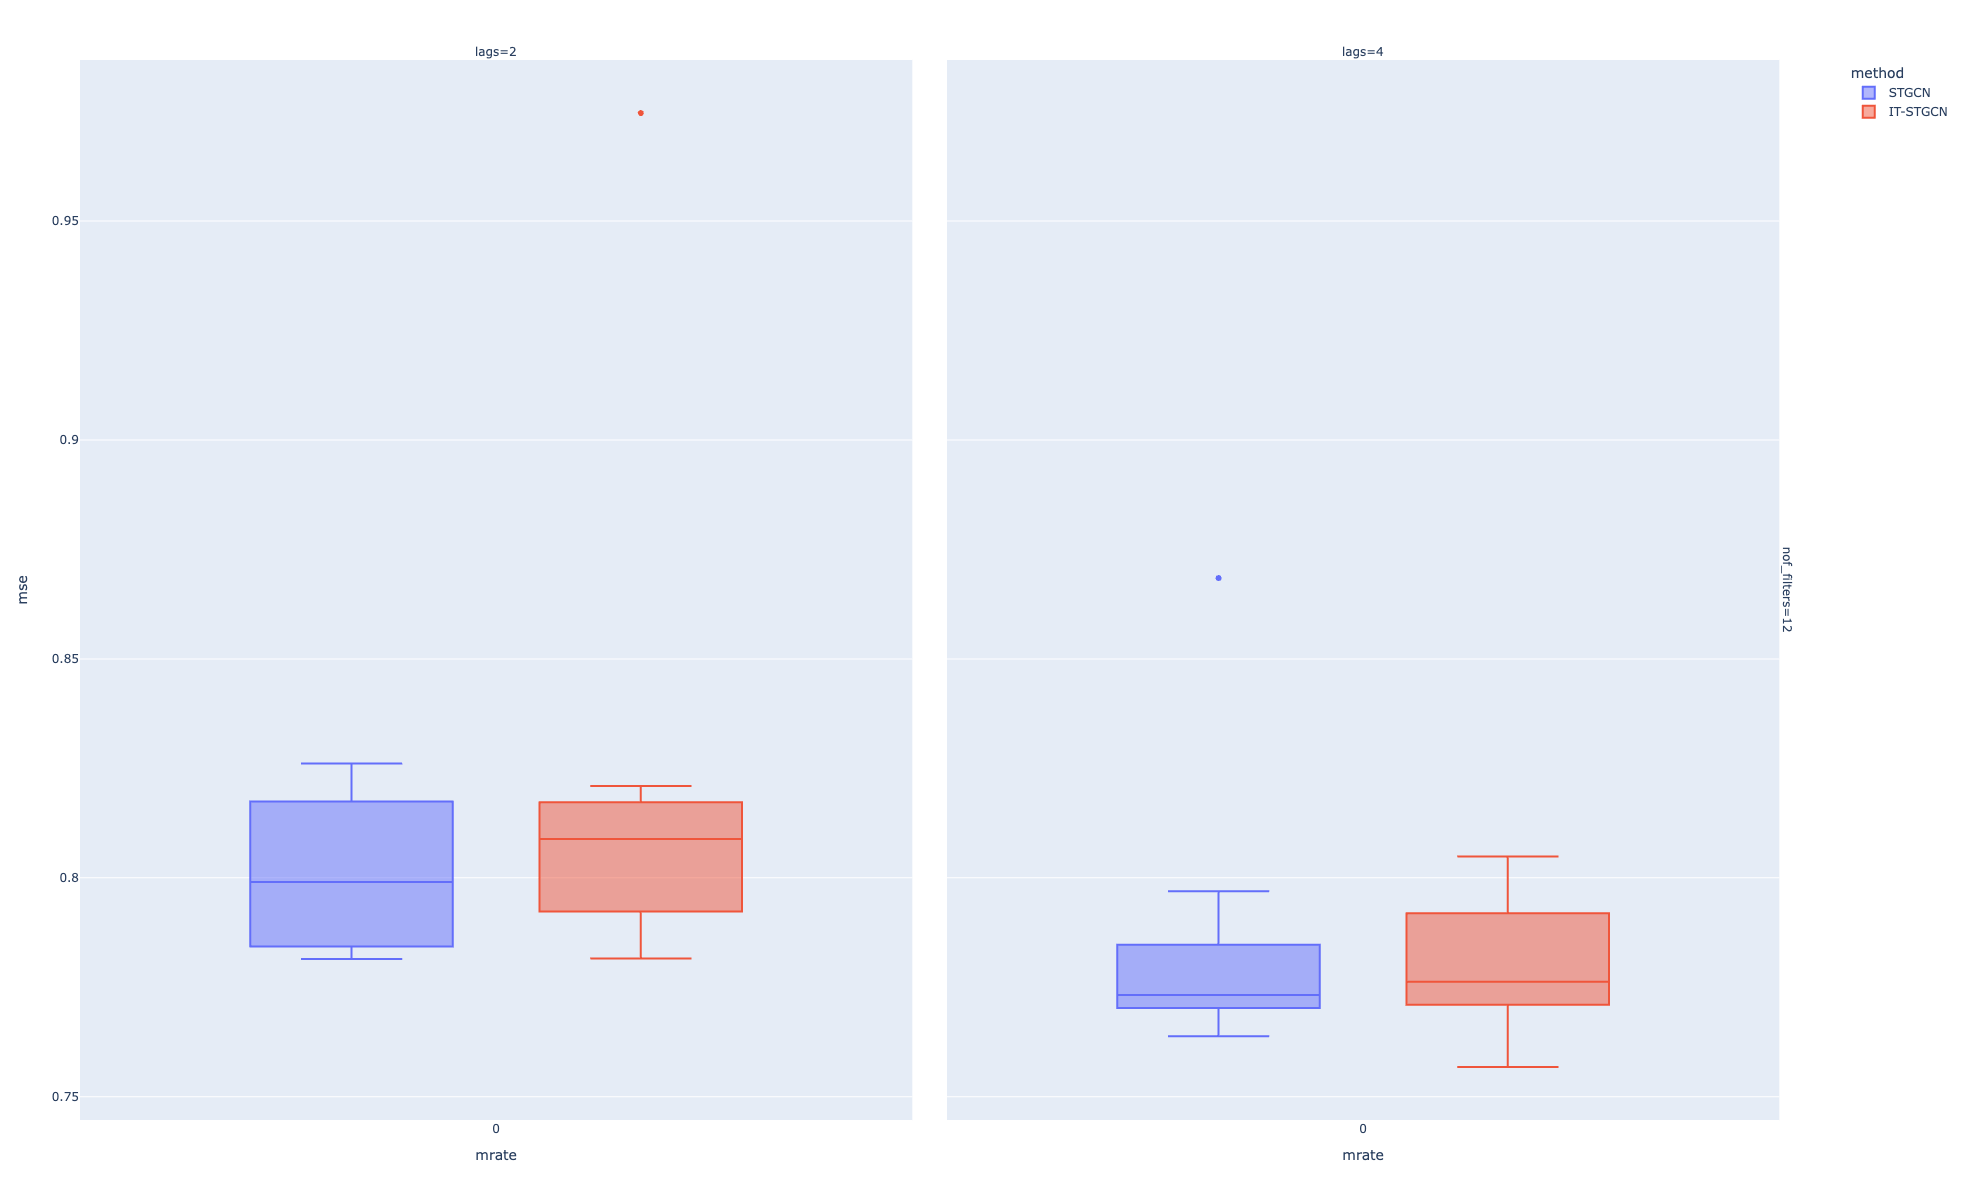

In [176]:
data.query("mtype=='block' and method!='GNAR'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


## missing values on the same nodes

In [814]:
# 10%
df1 = pd.read_csv('./simulation_results/2023-04-29_03-57-07.csv') # STGCN IT-STGCN block
df2 = pd.read_csv('./simulation_results/2023-04-29_20-15-46.csv') # STGCN IT-STGCN
df3 = pd.read_csv('./simulation_results/2023-04-30_16-19-58.csv') # STGCN IT-STGCN
# 60% 확인하고 다시 돌리기
df4 = pd.read_csv('./simulation_results/2023-05-05_04-21-57.csv') # STGCN IT-STGCN 60%
# df5 = pd.read_csv('./simulation_results/2023-04-24_18-53-34.csv') # STGCN IT-STGCN
# df6 = pd.read_csv('./simulation_results/2023-04-24_18-53-34.csv') # STGCN IT-STGCN

In [815]:
data = pd.concat([df1,df2,df3,df4],axis=0)

In [816]:
data.to_csv('./simulation_results/Real_simulation/wikimath_GSO_st.csv',index=False)

In [817]:
data = pd.read_csv('./simulation_results/Real_simulation/wikimath_GSO_st.csv')

In [818]:
data.query("method=='GNAR'")['mse'].unique()

array([], dtype=float64)

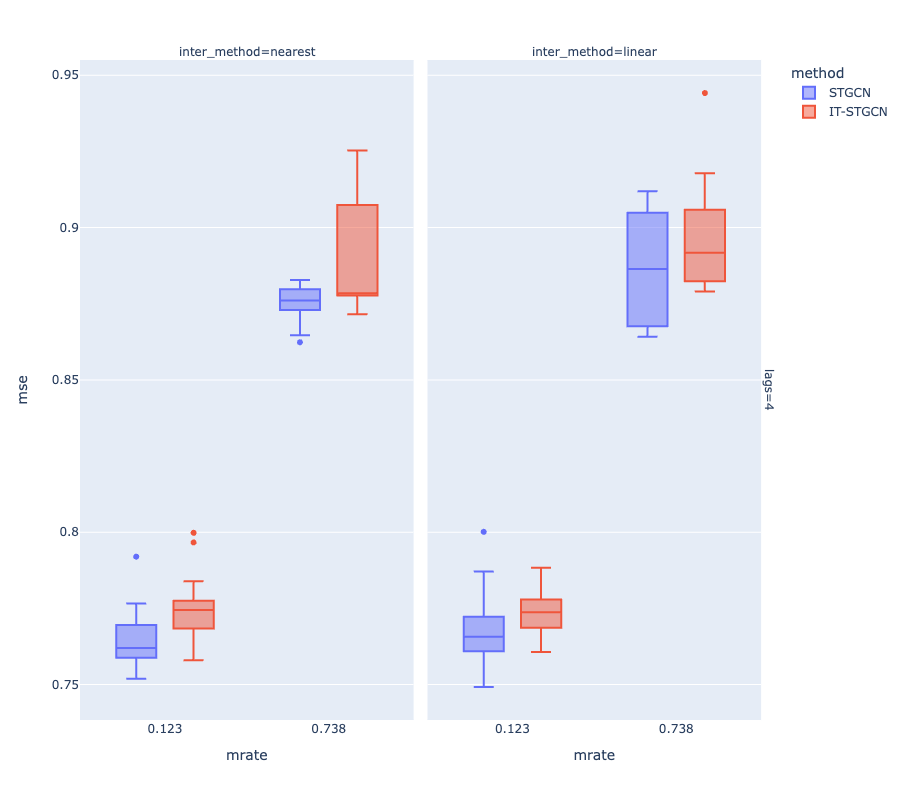

In [819]:
data.query("method!='GNAR' and mtype =='block' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='inter_method',facet_row='lags',height=800)


# Windmilmedium

In [229]:
df1 = pd.read_csv('./simulation_results/2023-04-15_09-06-12.csv') # GNAR
df2 = pd.read_csv('./simulation_results/2023-04-15_09-19-44.csv') # STGCN IT-STGCN
df3 = pd.read_csv('./simulation_results/2023-04-15_09-28-32.csv') # STGCN IT-STGCN
df4 = pd.read_csv('./simulation_results/2023-04-15_09-36-55.csv') # STGCN IT-STGCN
df5 = pd.read_csv('./simulation_results/2023-04-15_09-54-30.csv') # STGCN IT-STGCN
df6 = pd.read_csv('./simulation_results/2023-04-15_10-03-08.csv') # STGCN IT-STGCN
df7 = pd.read_csv('./simulation_results/2023-04-15_10-15-48.csv') # STGCN IT-STGCN
df8 = pd.read_csv('./simulation_results/2023-04-15_10-25-19.csv') # STGCN IT-STGCN
df9 = pd.read_csv('./simulation_results/2023-04-15_10-34-48.csv') # STGCN IT-STGCN
df10 = pd.read_csv('./simulation_results/2023-04-15_10-43-02.csv') # STGCN IT-STGCN

In [230]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],axis=0)

In [231]:
data.query("method=='GNAR'")

dataset method  mrate mtype  lags  nof_filters inter_method  epoch  \
0  windmilmedium   GNAR    0.1  rand     4          NaN        cubic    NaN   
1  windmilmedium   GNAR    0.1  rand     4          NaN        cubic    NaN   
2  windmilmedium   GNAR    0.1  rand     4          NaN        cubic    NaN   

        mse  calculation_time  
0  1.410524          3.150951  
1  1.410524          2.926645  
2  1.410524          2.406094

In [232]:
data.query("method!='GNAR' and method=='STGCN'").sort_values(['mrate','nof_filters'])

dataset method  mrate mtype  lags  nof_filters inter_method  epoch  \
0  windmilmedium  STGCN    0.1  rand     2         12.0        cubic    1.0   
0  windmilmedium  STGCN    0.4  rand     2         12.0        cubic    1.0   
0  windmilmedium  STGCN    0.5  rand     4         12.0        cubic    1.0   
0  windmilmedium  STGCN    0.8  rand     2          4.0       linear    1.0   
0  windmilmedium  STGCN    0.8  rand     2          8.0       linear    1.0   
0  windmilmedium  STGCN    0.8  rand     2         12.0        cubic    1.0   
0  windmilmedium  STGCN    0.8  rand     2         12.0       linear    1.0   
0  windmilmedium  STGCN    0.8  rand     2         16.0       linear    1.0   
0  windmilmedium  STGCN    0.8  rand     2         32.0       linear    1.0   

        mse  calculation_time  
0  1.038629         85.205226  
0  1.325845         85.721810  
0  1.568322         87.435629  
0  1.256851         79.950040  
0  1.259840         83.667886  
0  1.874045         85.171979  
0  1.427910         84.167046  
0  1.449077         93.408642  
0  1.339085         88.795324

In [233]:
data.query("method!='GNAR' and method!='STGCN'").sort_values(['mrate','nof_filters'])

dataset    method  mrate mtype  lags  nof_filters inter_method  \
1  windmilmedium  IT-STGCN    0.1  rand     2         12.0        cubic   
1  windmilmedium  IT-STGCN    0.4  rand     2         12.0        cubic   
1  windmilmedium  IT-STGCN    0.5  rand     4         12.0        cubic   
1  windmilmedium  IT-STGCN    0.8  rand     2          4.0       linear   
1  windmilmedium  IT-STGCN    0.8  rand     2          8.0       linear   
1  windmilmedium  IT-STGCN    0.8  rand     2         12.0        cubic   
1  windmilmedium  IT-STGCN    0.8  rand     2         12.0       linear   
1  windmilmedium  IT-STGCN    0.8  rand     2         16.0       linear   
1  windmilmedium  IT-STGCN    0.8  rand     2         32.0       linear   

   epoch       mse  calculation_time  
1    1.0  0.991687        282.159899  
1    1.0  1.150386        282.688800  
1    1.0  1.232030        273.543777  
1    1.0  1.217331        295.937213  
1    1.0  1.162310        259.498000  
1    1.0  1.772746        262.409024  
1    1.0  1.182181        287.886245  
1    1.0  1.430025        306.211073  
1    1.0  1.203084        309.623751

linear, 0.7~0.9, 4,8, 

In [ ]:
data.to_csv('./simulation_results/Real_simulation/windmilmedium_Simulation.csv',index=False)

In [ ]:
data.query("method!='GNAR'")['calculation_time'].mean(),data.query("method!='GNAR'")['calculation_time'].max(),data.query("method!='GNAR'")['calculation_time'].min()

## random

## block

# Windmilsmall

In [418]:
df1 = pd.read_csv('./simulation_results/2023-04-15_10-59-28.csv') # GNAR
df2 = pd.read_csv('./simulation_results/2023-04-15_11-15-05.csv') # STGCN IT-STGCN
df3 = pd.read_csv('./simulation_results/2023-04-15_11-30-48.csv') # STGCN IT-STGCN
df4 = pd.read_csv('./simulation_results/2023-04-15_11-46-45.csv') # STGCN IT-STGCN
df5 = pd.read_csv('./simulation_results/2023-04-15_12-02-19.csv') # STGCN IT-STGCN
df6 = pd.read_csv('./simulation_results/2023-04-15_15-00-32.csv') # STGCN IT-STGCN
# df7 = pd.read_csv('./simulation_results/2023-04-15_10-15-48.csv') # STGCN IT-STGCN
# df8 = pd.read_csv('./simulation_results/2023-04-15_10-25-19.csv') # STGCN IT-STGCN
# df9 = pd.read_csv('./simulation_results/2023-04-15_10-34-48.csv') # STGCN IT-STGCN
# df10 = pd.read_csv('./simulation_results/2023-04-15_10-43-02.csv') # STGCN IT-STGCN

In [419]:
data = pd.concat([df1,df2,df3,df4,df5,df6],axis=0)

In [ ]:
data.query("method=='GNAR'").sort_values(['mrate','nof_filters'])

In [ ]:
data.query("method!='GNAR' and method=='STGCN'").sort_values(['mrate','nof_filters'])

In [ ]:
data.query("method!='GNAR' and method!='STGCN'").sort_values(['mrate','nof_filters'])

linear, lags 4,8.  filter 8,12

# Windmillsmall simulation result

## Baseline

In [833]:
df1 = pd.read_csv('./simulation_results/2023-04-17_06-05-37.csv') # STGCN IT-STGCN 70%
df2 = pd.read_csv('./simulation_results/2023-04-17_08-05-26.csv') # STGCN IT-STGCN
df3 = pd.read_csv('./simulation_results/2023-04-17_13-41-19.csv') # STGCN IT-STGCN
df4 = pd.read_csv('./simulation_results/2023-04-17_15-44-21.csv') # STGCN IT-STGCN
df5 = pd.read_csv('./simulation_results/2023-04-17_21-27-38.csv') # STGCN IT-STGCN
# df6 = pd.read_csv('./simulation_results/2023-04-15_15-00-32.csv') # GNAR 30%, 50%, 70% # 뭔가 일단 필요없어서 데이터셋에서 뺌
df7 = pd.read_csv('./simulation_results/2023-04-18_05-01-55.csv') # STGCN IT-STGCN
df8 = pd.read_csv('./simulation_results/2023-04-18_06-14-06.csv') # STGCN IT-STGCN
df9 = pd.read_csv('./simulation_results/2023-04-18_17-32-30.csv') # STGCN IT-STGCN
df10 = pd.read_csv('./simulation_results/2023-04-19_01-52-24.csv') # STGCN IT-STGCN
df11 = pd.read_csv('./simulation_results/2023-04-19_07-50-52.csv') # STGCN IT-STGCN
df12 = pd.read_csv('./simulation_results/2023-04-19_09-30-25.csv') # STGCN IT-STGCN
df13 = pd.read_csv('./simulation_results/2023-04-19_15-32-55.csv') # STGCN IT-STGCN
df14 = pd.read_csv('./simulation_results/2023-04-19_17-12-06.csv') # STGCN IT-STGCN
df15 = pd.read_csv('./simulation_results/2023-04-19_23-07-36.csv') # STGCN IT-STGCN
df16 = pd.read_csv('./simulation_results/2023-04-20_00-46-43.csv') # STGCN IT-STGCN
df17 = pd.read_csv('./simulation_results/2023-04-20_06-51-34.csv') # STGCN IT-STGCN
df18 = pd.read_csv('./simulation_results/2023-04-20_08-30-27.csv') # STGCN IT-STGCN
df19 = pd.read_csv('./simulation_results/2023-04-20_14-28-35.csv') # STGCN IT-STGCN
df20 = pd.read_csv('./simulation_results/2023-04-20_16-08-39.csv') # STGCN IT-STGCN
df21 = pd.read_csv('./simulation_results/2023-04-20_22-09-37.csv') # STGCN IT-STGCN
df22 = pd.read_csv('./simulation_results/2023-04-20_23-48-26.csv') # STGCN IT-STGCN
df23 = pd.read_csv('./simulation_results/2023-04-21_05-36-47.csv') # STGCN IT-STGCN
df24 = pd.read_csv('./simulation_results/2023-04-21_15-26-00.csv') # STGCN IT-STGCN
df25 = pd.read_csv('./simulation_results/2023-04-21_23-27-11.csv') # STGCN IT-STGCN
df26 = pd.read_csv('./simulation_results/2023-04-22_07-46-08.csv') # STGCN IT-STGCN
df27 = pd.read_csv('./simulation_results/2023-04-22_15-45-20.csv') # STGCN IT-STGCN
df28 = pd.read_csv('./simulation_results/2023-04-22_22-57-31.csv') # STGCN IT-STGCN
df29 = pd.read_csv('./simulation_results/2023-04-23_07-00-15.csv') # STGCN IT-STGCN
df30 = pd.read_csv('./simulation_results/2023-04-23_15-18-02.csv') # STGCN IT-STGCN
df31 = pd.read_csv('./simulation_results/2023-04-23_15-22-36.csv') # GNAR 70%
# baseline
df32 = pd.read_csv('./simulation_results/2023-04-29_06-54-40.csv') # GNAR 
df33 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
df34 = pd.read_csv('./simulation_results/2023-05-01_02-55-33.csv')
df35 = pd.read_csv('./simulation_results/2023-05-01_10-21-15.csv')
df36 = pd.read_csv('./simulation_results/2023-05-01_19-23-57.csv')
df37 = pd.read_csv('./simulation_results/2023-05-02_01-10-53.csv')
df38 = pd.read_csv('./simulation_results/2023-05-02_08-26-53.csv')
df39 = pd.read_csv('./simulation_results/2023-05-02_16-00-40.csv')
df40 = pd.read_csv('./simulation_results/2023-05-03_00-34-09.csv')
df41 = pd.read_csv('./simulation_results/2023-05-03_08-04-42.csv')
df42 = pd.read_csv('./simulation_results/2023-05-03_15-50-50.csv')
df43 = pd.read_csv('./simulation_results/2023-05-03_23-46-56.csv')
df44 = pd.read_csv('./simulation_results/2023-05-04_05-22-59.csv')
df45 = pd.read_csv('./simulation_results/2023-05-04_09-22-37.csv')
df46 = pd.read_csv('./simulation_results/2023-05-04_15-00-57.csv')
df47 = pd.read_csv('./simulation_results/2023-05-04_23-41-21.csv')
df48 = pd.read_csv('./simulation_results/2023-05-05_07-23-04.csv')
df49 = pd.read_csv('./simulation_results/2023-05-05_15-03-17.csv')
# df50 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
# df51 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
# df52 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
# df53 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
# df54 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
# df55 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
# df56 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
# df57 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
# df58 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
# df59 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')
# df60 = pd.read_csv('./simulation_results/2023-04-30_18-55-12.csv')

In [834]:
data = pd.concat([df1,df2,df3,df4,df5,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,
                 df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34,
                 df35,df36,df37,df38,df39,df40,df41,df42,df43,df44,df45,df46,df47,df48,df49],axis=0)

In [835]:
data.to_csv('./simulation_results/Real_simulation/windmillsmall.csv',index=False)

In [836]:
data = pd.read_csv('./simulation_results/Real_simulation/windmillsmall.csv')

In [837]:
data.query("method=='GNAR' and mrate ==0")['mse'].unique()

array([1.64923024])

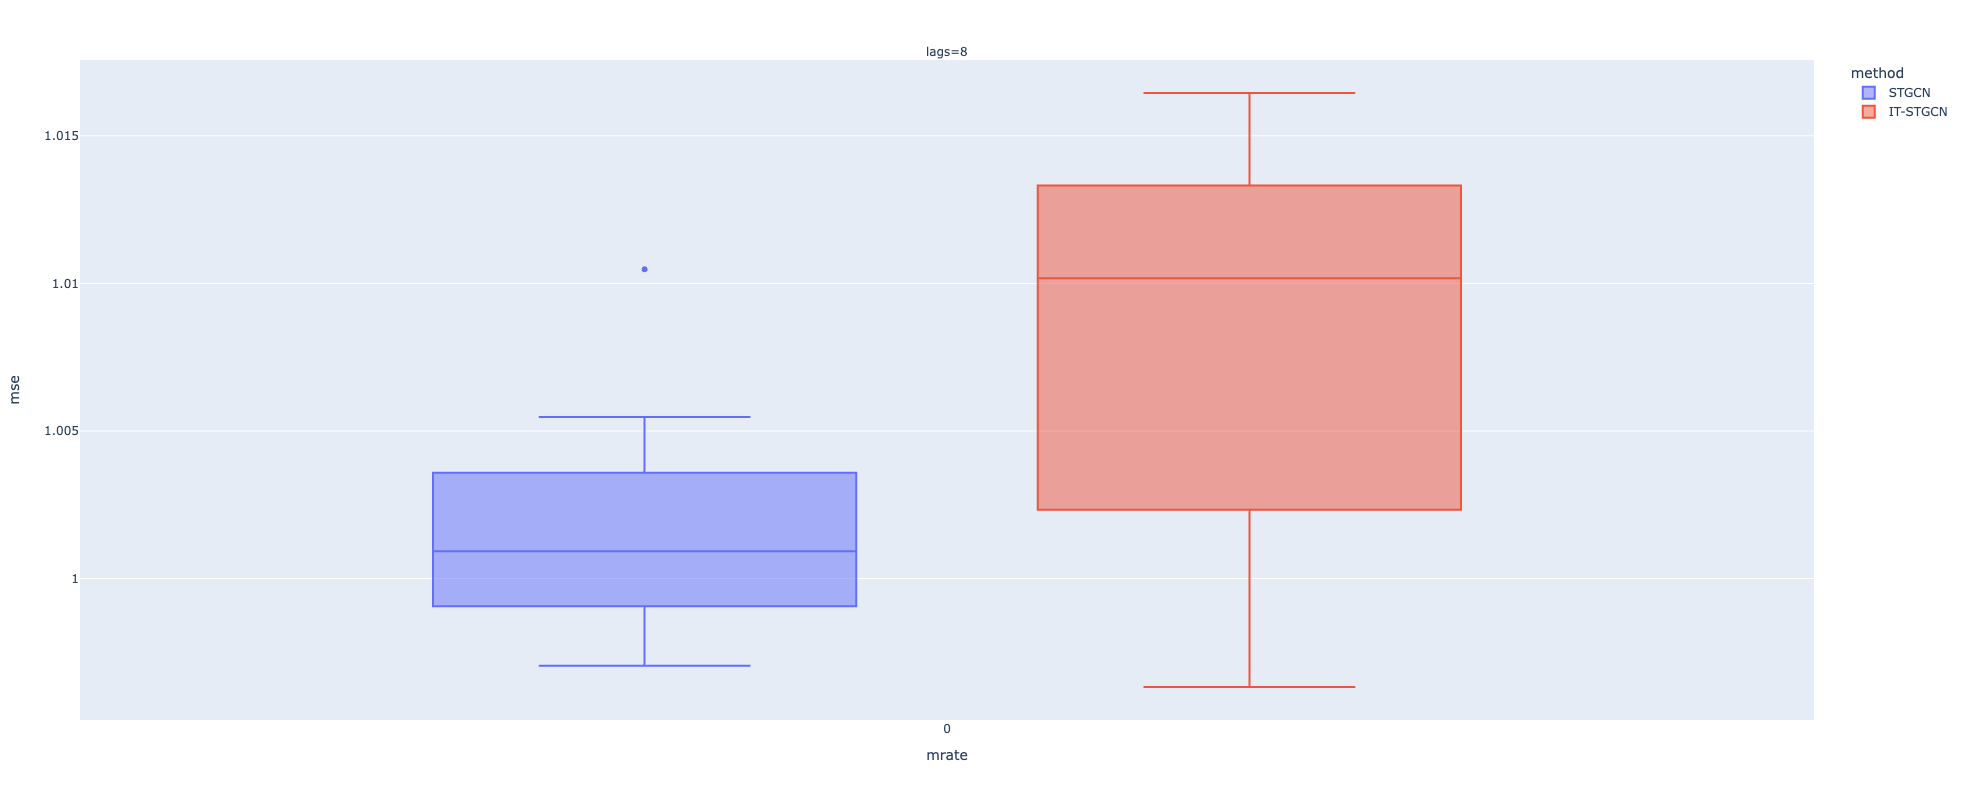

In [838]:
data.query("method!='GNAR' and mrate ==0 ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',height=800)


## random

In [839]:
data.query("method=='GNAR' and mrate !=0")['mse'].unique()

array([1.64923024])

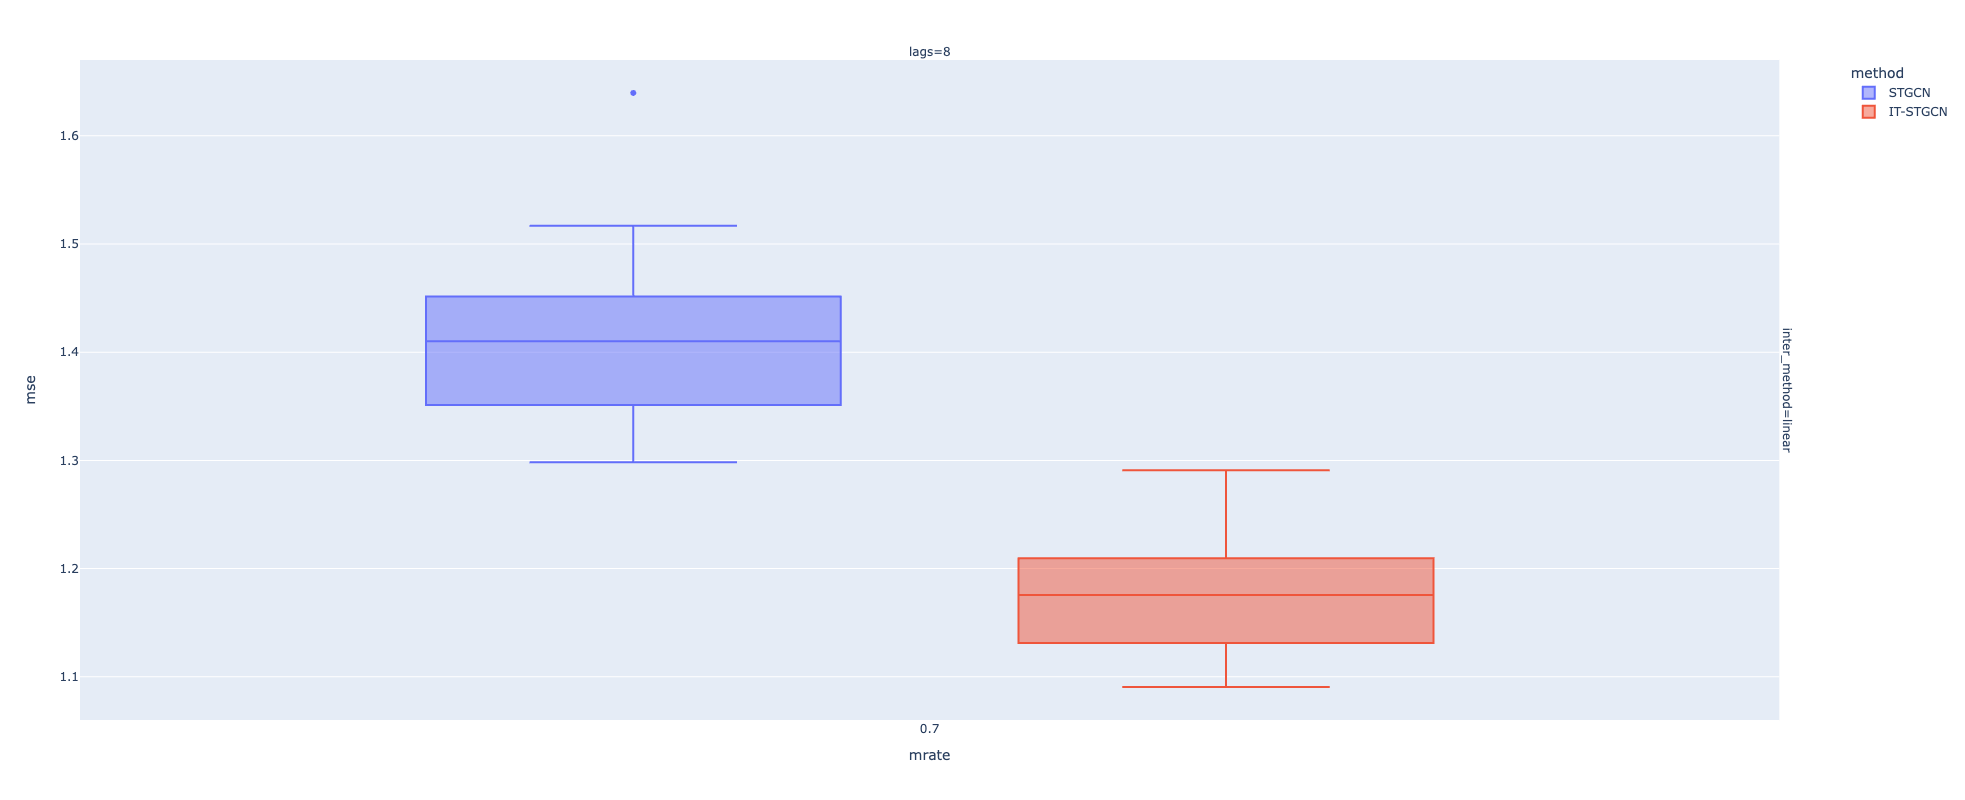

In [840]:
data.query("method!='GNAR' and mtype =='rand' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=800)


## block

In [791]:
df1 = pd.read_csv('./simulation_results/2023-04-24_02-48-08.csv') # STGCN IT-STGCN block
df2 = pd.read_csv('./simulation_results/2023-04-24_10-57-10.csv') # STGCN IT-STGCN
df3 = pd.read_csv('./simulation_results/2023-04-24_18-53-34.csv') # STGCN IT-STGCN
df4 = pd.read_csv('./simulation_results/2023-04-25_02-30-27.csv') # STGCN IT-STGCN
df5 = pd.read_csv('./simulation_results/2023-04-25_10-48-46.csv') # STGCN IT-STGCN
df6 = pd.read_csv('./simulation_results/2023-04-25_10-53-14.csv') # GNAR 
df7 = pd.read_csv('./simulation_results/2023-04-25_18-40-53.csv') # STGCN IT-STGCN
df8 = pd.read_csv('./simulation_results/2023-04-25_23-30-08.csv') # STGCN IT-STGCN
df9 = pd.read_csv('./simulation_results/2023-04-26_04-15-00.csv') # STGCN IT-STGCN
df10 = pd.read_csv('./simulation_results/2023-04-27_07-59-36.csv') # STGCN IT-STGCN
df11 = pd.read_csv('./simulation_results/2023-04-27_15-29-00.csv') # STGCN IT-STGCN
df12 = pd.read_csv('./simulation_results/2023-04-27_23-37-18.csv') # STGCN IT-STGCN
df13 = pd.read_csv('./simulation_results/2023-04-28_08-21-54.csv') # STGCN IT-STGCN
df14 = pd.read_csv('./simulation_results/2023-04-28_16-06-55.csv') # STGCN IT-STGCN
df15 = pd.read_csv('./simulation_results/2023-04-28_21-19-37.csv') # STGCN IT-STGCN
df16 = pd.read_csv('./simulation_results/2023-04-29_03-07-03.csv') # STGCN IT-STGCN
df17 = pd.read_csv('./simulation_results/2023-04-29_09-00-42.csv') # STGCN IT-STGCN
df18 = pd.read_csv('./simulation_results/2023-04-29_19-07-49.csv') # STGCN IT-STGCN
df19 = pd.read_csv('./simulation_results/2023-04-30_05-14-07.csv') # STGCN IT-STGCN
df20 = pd.read_csv('./simulation_results/2023-04-30_15-23-16.csv') # STGCN IT-STGCN
df21 = pd.read_csv('./simulation_results/2023-05-01_00-16-37.csv') # STGCN IT-STGCN
df22 = pd.read_csv('./simulation_results/2023-05-01_07-41-52.csv') # STGCN IT-STGCN
df23 = pd.read_csv('./simulation_results/2023-05-01_16-21-41.csv') # STGCN IT-STGCN
df24 = pd.read_csv('./simulation_results/2023-05-01_23-38-23.csv') # STGCN IT-STGCN
df25 = pd.read_csv('./simulation_results/2023-05-02_13-51-13.csv') # STGCN IT-STGCN
df26 = pd.read_csv('./simulation_results/2023-05-02_21-43-26.csv') # STGCN IT-STGCN
df27 = pd.read_csv('./simulation_results/2023-05-03_06-04-32.csv') # STGCN IT-STGCN
df28 = pd.read_csv('./simulation_results/2023-05-03_13-43-11.csv') # STGCN IT-STGCN
df29 = pd.read_csv('./simulation_results/2023-05-03_21-58-04.csv') # STGCN IT-STGCN
df30 = pd.read_csv('./simulation_results/2023-05-04_04-39-00.csv') # STGCN IT-STGCN

In [773]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,
                 df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30],axis=0)

In [759]:
data.to_csv('./simulation_results/Real_simulation/windmillsmall_block.csv',index=False)

In [760]:
data = pd.read_csv('./simulation_results/Real_simulation/windmillsmall_block.csv')

In [761]:
data.query("method=='GNAR'")['mse'].unique()

array([1.64923024])

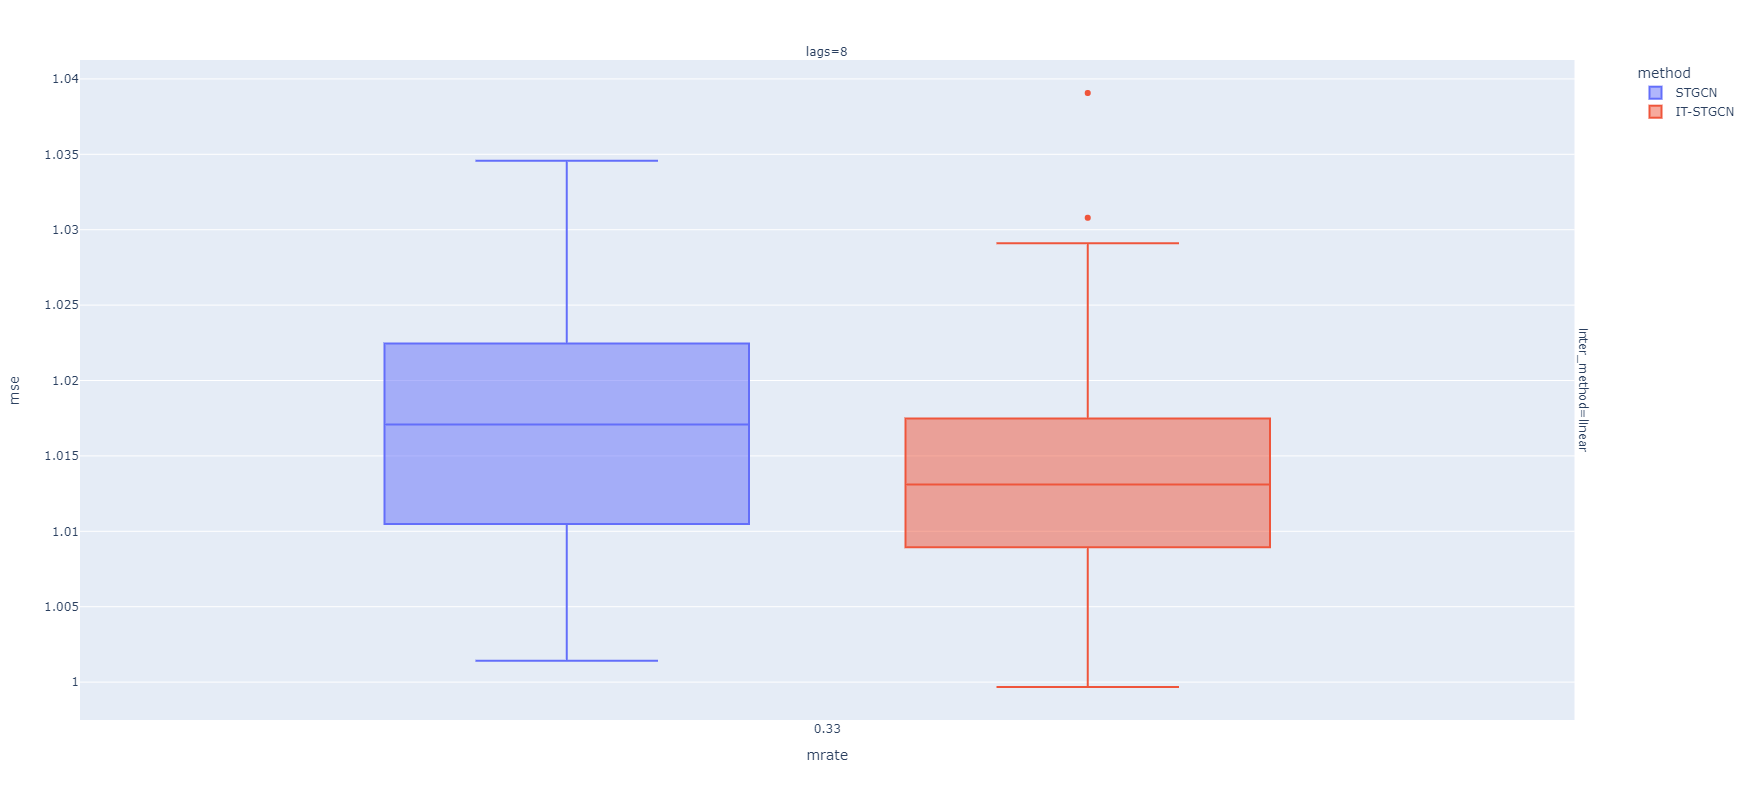

In [762]:
data.query("method!='GNAR' and mtype =='block' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=800)


# Montevideobus

In [763]:
df1 = pd.read_csv('./simulation_results/2023-04-30_23-28-01.csv') # lags 8
df2 = pd.read_csv('./simulation_results/2023-05-01_01-48-57.csv') # lags 8
df3 = pd.read_csv('./simulation_results/2023-05-01_04-10-06.csv') # lags 8
df4 = pd.read_csv('./simulation_results/2023-05-01_06-29-43.csv') # lags 8
df5 = pd.read_csv('./simulation_results/2023-05-01_08-56-25.csv') # lags 8
df6 = pd.read_csv('./simulation_results/2023-05-01_11-21-53.csv') # lags 8
df7 = pd.read_csv('./simulation_results/2023-05-01_14-35-28.csv') # lags 4
df8 = pd.read_csv('./simulation_results/2023-05-01_17-41-15.csv')
df9 = pd.read_csv('./simulation_results/2023-05-01_22-34-25.csv')
df10 = pd.read_csv('./simulation_results/2023-05-01_20-14-49.csv')
df11 = pd.read_csv('./simulation_results/2023-05-02_01-12-01.csv')
df12 = pd.read_csv('./simulation_results/2023-05-02_03-31-06.csv')
df13 = pd.read_csv('./simulation_results/2023-05-02_05-47-02.csv') # STGCN IT-STGCN
df14 = pd.read_csv('./simulation_results/2023-05-02_08-06-05.csv') # STGCN IT-STGCN
df15 = pd.read_csv('./simulation_results/2023-05-02_10-22-46.csv') # STGCN IT-STGCN
df16 = pd.read_csv('./simulation_results/2023-05-02_12-55-51.csv') # STGCN IT-STGCN
df17 = pd.read_csv('./simulation_results/2023-05-02_15-20-11.csv') # STGCN IT-STGCN
df18 = pd.read_csv('./simulation_results/2023-05-02_18-02-21.csv') # STGCN IT-STGCN
df19 = pd.read_csv('./simulation_results/2023-05-02_20-30-09.csv') # STGCN IT-STGCN
df20 = pd.read_csv('./simulation_results/2023-05-02_23-27-13.csv') # STGCN IT-STGCN
df21 = pd.read_csv('./simulation_results/2023-05-03_06-49-15.csv') # STGCN IT-STGCN
df22 = pd.read_csv('./simulation_results/2023-05-03_04-25-39.csv') # STGCN IT-STGCN
df23 = pd.read_csv('./simulation_results/2023-05-03_02-15-10.csv') # STGCN IT-STGCN
df24 = pd.read_csv('./simulation_results/2023-05-03_09-11-42.csv') # STGCN IT-STGCN
df25 = pd.read_csv('./simulation_results/2023-05-03_11-51-31.csv') # STGCN IT-STGCN
df26 = pd.read_csv('./simulation_results/2023-05-03_14-26-55.csv') # STGCN IT-STGCN
df27 = pd.read_csv('./simulation_results/2023-05-03_16-53-12.csv') # STGCN IT-STGCN
df28 = pd.read_csv('./simulation_results/2023-05-03_19-26-00.csv') # STGCN IT-STGCN
df29 = pd.read_csv('./simulation_results/2023-05-04_00-44-17.csv') # STGCN IT-STGCN
df30 = pd.read_csv('./simulation_results/2023-05-04_03-00-08.csv') # STGCN IT-STGCN

In [750]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,
                 df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30],axis=0)

In [751]:
data.to_csv('./simulation_results/Real_simulation/monte.csv',index=False)

In [752]:
data = pd.read_csv('./simulation_results/Real_simulation/monte.csv')

## Baseline

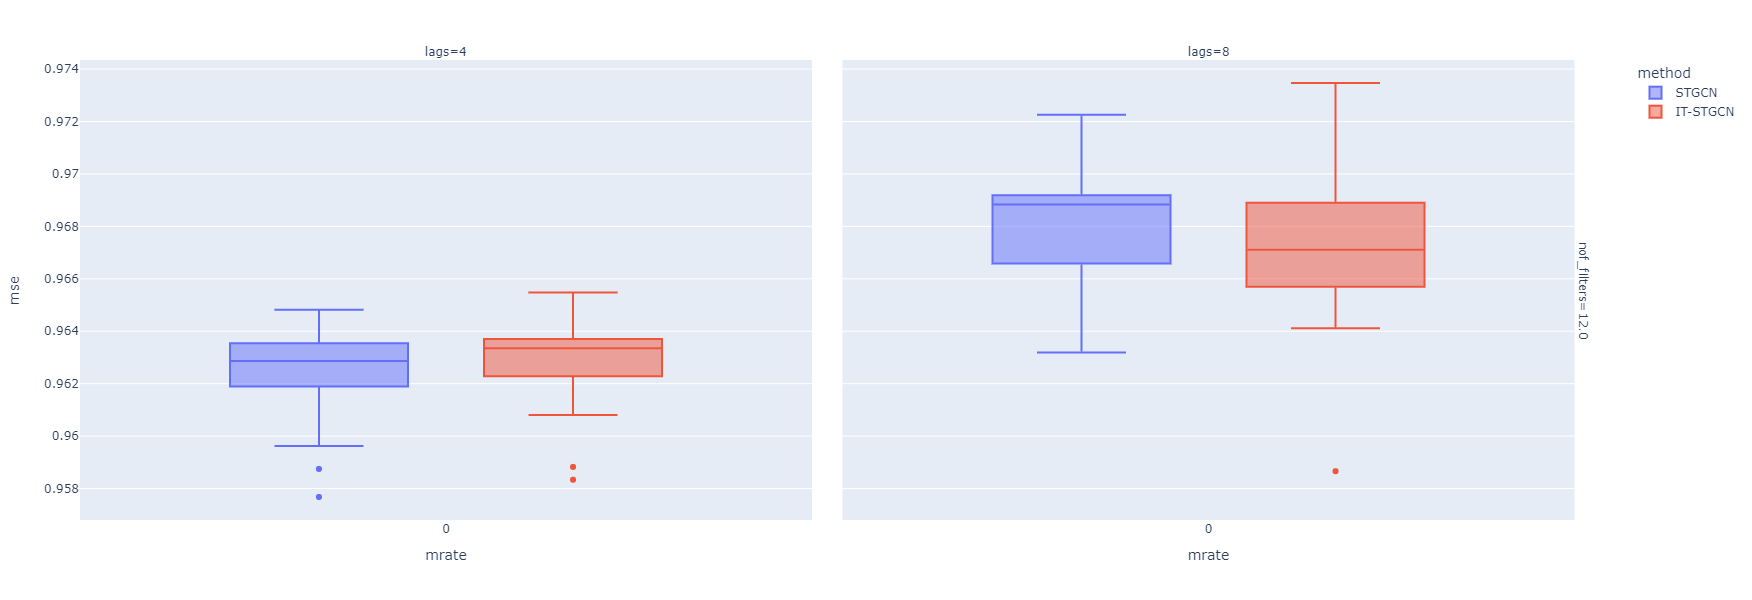

In [753]:
data.query("mrate==0 and method!='GNAR'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=600)

## random

In [754]:
data.query("method=='GNAR'").groupby('mrate')['mse'].unique()

mrate
0.0    [1.0619367361068726, 1.068463921546936]
0.3    [1.0619367361068726, 1.068463921546936]
0.4    [1.0619367361068726, 1.068463921546936]
0.8    [1.0619367361068726, 1.068463921546936]
0.9    [1.0619367361068726, 1.068463921546936]
Name: mse, dtype: object

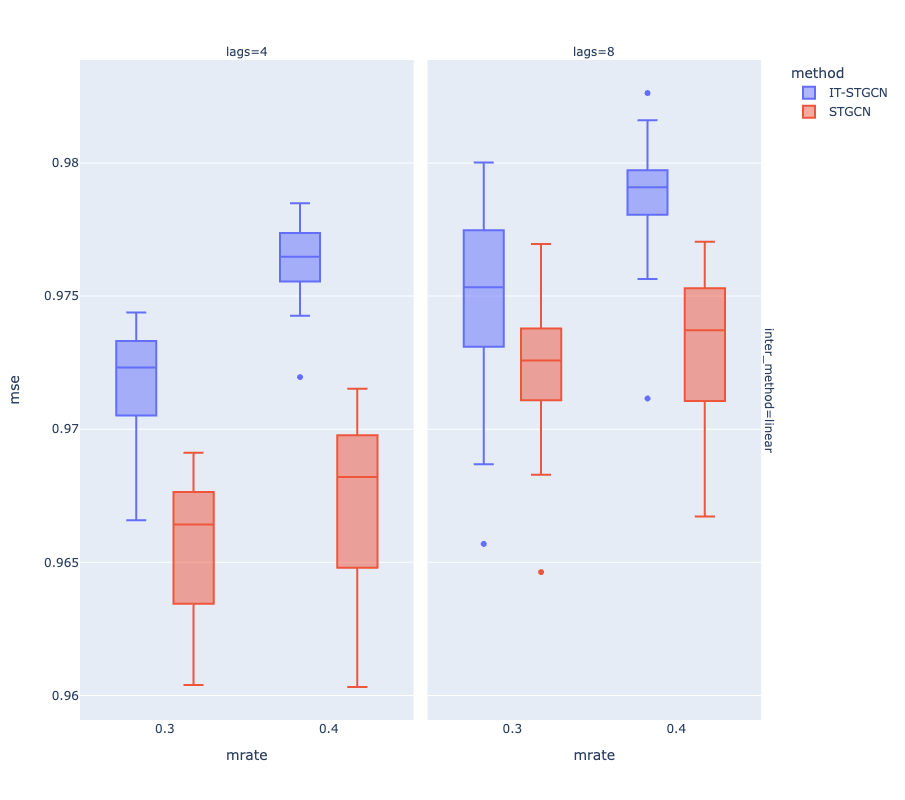

In [755]:
data.query("mtype=='rand' and mrate !=0 and method!='GNAR' and mrate!=0.8 and mrate!=0.9").sort_values('lags').plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=800)


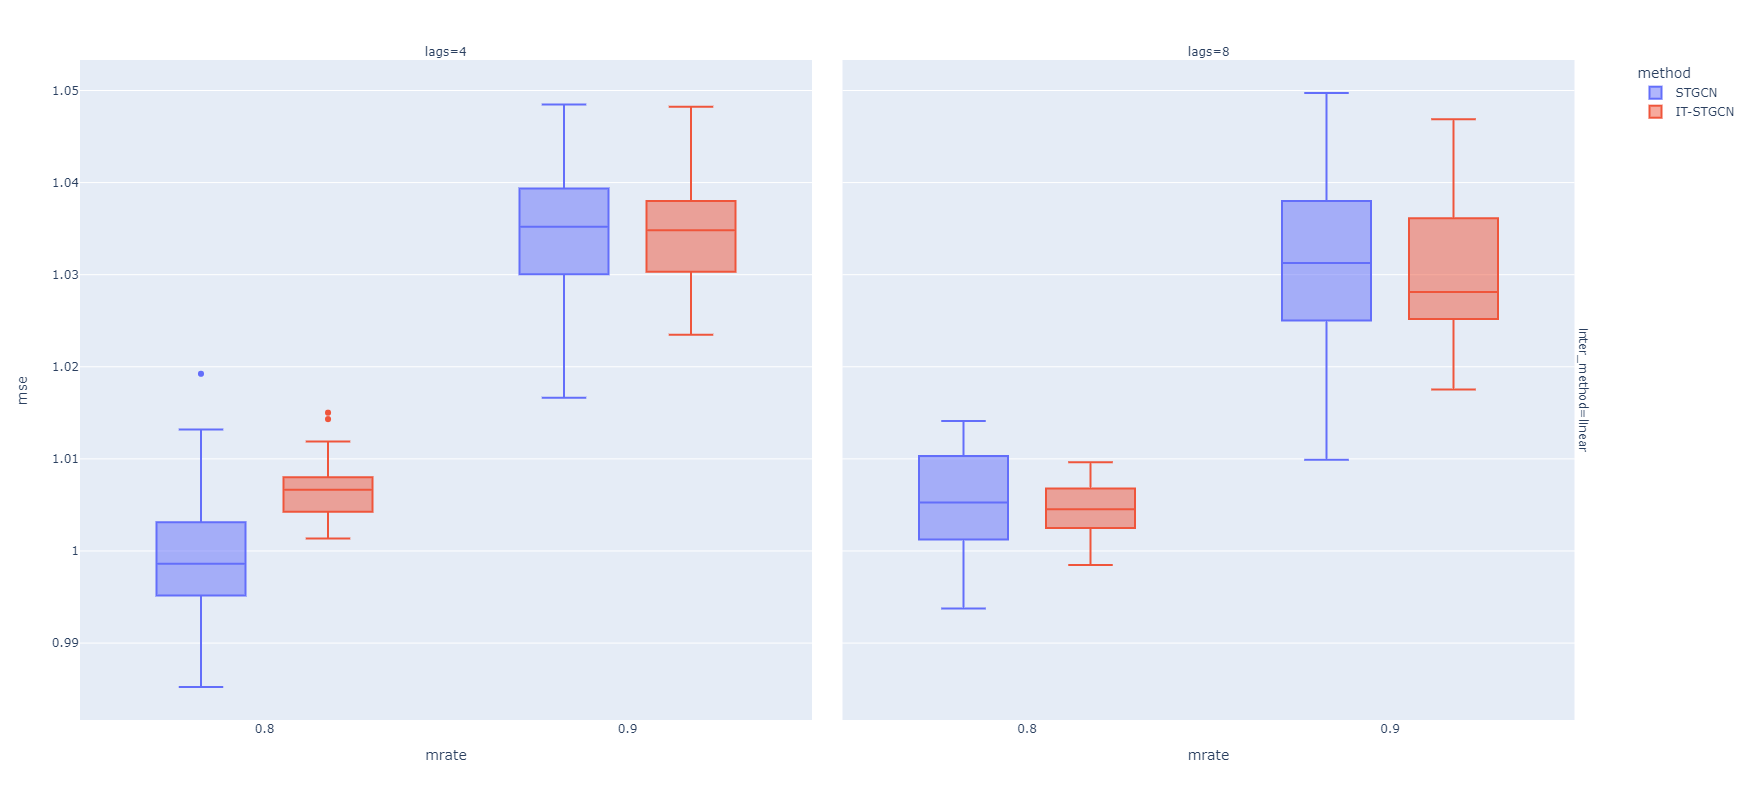

In [756]:
data.query("mtype=='rand' and mrate !=0 and method!='GNAR' and mrate!=0.3 and mrate!=0.4").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=800)


## block

## random

## block

In [828]:
df1 = pd.read_csv('./simulation_results/2023-05-04_21-03-21.csv')
df2 = pd.read_csv('./simulation_results/2023-05-05_12-10-44.csv')
# df3 = pd.read_csv('./simulation_results/2023-04-28_14-40-59.csv')

In [829]:
data = pd.concat([df1,df2],axis=0)

In [830]:
data.to_csv('./simulation_results/Real_simulation/monte_block.csv',index=False)

In [831]:
data = pd.read_csv('./simulation_results/Real_simulation/monte_block.csv')

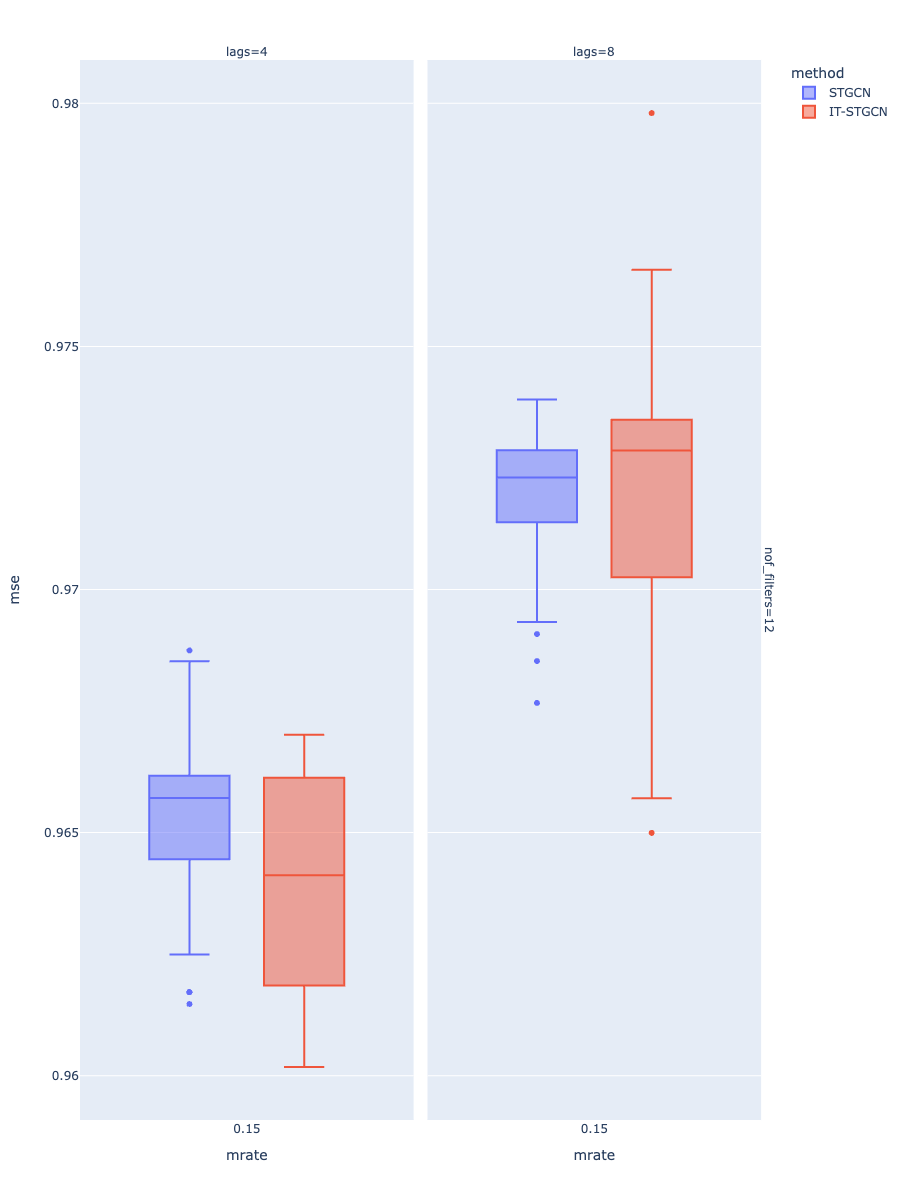

In [832]:
data.query("mtype=='block' and method!='GNAR'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)
